# GO term and KEGG analysis for featureCounts data
alpha = 0.05, lfcThreshold = 1, altHypothesis = 'greaterAbs'

In [2]:
# loading libraries
library(topGO)
library(KEGGREST)
library(dplyr)
library(clusterProfiler)
library(ggridges)
library(ggplot2)
library(httr)

In [ ]:
# load in data frame
p1h <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/featureCounts_analysis/p1h_shrink_lfcthreshold.txt')

# select only needed columns
p1h_df <- select(p1h, X, log2FoldChange, padj)

# renaming columns
colnames(p1h_df) <- c('gene', 'lfc', 'padj')

head(p1h_df)

In [ ]:
# load in entrez ID conversion
convert <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/featureCounts_analysis/p1h_convert.txt', sep = '\t')

# select only the columns I need
convert_df <- select(convert, From, To)

# rename columns
colnames(convert_df) <- c('gene', 'entrez')

head(convert_df)

In [ ]:
# merge df together to convert gene IDs to entrez
merge_df <- merge(convert_df, p1h_df, by='gene', all=TRUE)

# omit any row with NA
merge_df <- na.omit(merge_df)

# only select columns I need now
merge_df <- select(merge_df, entrez, lfc)

head(merge_df)

In [ ]:
# creating numeric vector for kegg object
kegg_gene_list <- merge_df$lfc
names(kegg_gene_list) <- merge_df$entrez

# sort list in descending order
kegg_gene_list = sort(kegg_gene_list, decreasing = TRUE)

# checking that things look okay
head(kegg_gene_list)
class(kegg_gene_list)

In [ ]:
kegg_organism = 'cvn'
kk2 <- gseKEGG(geneList = kegg_gene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH', #Benjamini-Hockberg FDR
               scoreType = 'std', # standard - only change for one-tailed tests
               keyType = 'kegg')

In [ ]:
kk2_df <- as.data.frame(kk2)
kk2_df$Description <- sub(" -.*", "", kk2_df$Description)
head(kk2_df,15)

In [ ]:
# removes extra info on description column
kk2@result$Description <- gsub(pattern = " - Crassostrea virginica (eastern oyster)", 
                                 replacement = "", kk2@result$Description, fixed = T)
head(kk2)

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)

In [ ]:
ridgeplot(kk2) + labs(x='enrichment distribution')

In [ ]:
dotplot(kk2, showCategory = 10, title = 'Enriched Pathways', split = '.sign') + facet_grid(.~.sign)

# ALL EXPERIENCED PHASE 1 HYPOXIA
# activated = more methylation in phase 2 hypoxic
# suppressed = more methylation in phase 2 control

## unfiltered DESeq KEGG analysis
still looking at significantly differentially methylated genes for phase 1 warm vs. control, but now genes get assigned NA for adjusted p-values *only* when the gene has low counts (so this now includes outliers, instead of assigning outliers NA), therefore, different genes will be kept in the analysis for enriched pathways

- lfcThreshold = 0.25
- lfc_shrink normal
- cooksCutoff = FALSE
- independentFiltering = FALSE

#### **phase 1 warm vs. control**

In [3]:
# load in data frame
#unfiltered_p1wc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/unfiltered_lfc_p1wc.csv')

# using a diff df - this one is unfiltered, lfcThreshold=0.25, lfc_shrink = normal
unfiltered_p1wc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/p1wc_lfc25_genes.csv')

# select only needed columns
unfilter_df <- select(unfiltered_p1wc, X, log2FoldChange, padj)

# KEGG uses entrez IDs, which are my ensembl IDs without the 'LOC' in front of them, so need to convert those
unfilter_df$X <- substr(unfilter_df$X, start = 4, stop = nchar(unfilter_df$X))

# renaming columns
colnames(unfilter_df) <- c('gene', 'lfc', 'padj')

head(unfilter_df)

gene      lfc        padj     
1 111120752  0.5117345        NA
2 111109452  1.0072548        NA
3 111124802  0.4591660 1.0000000
4 111101273  0.4055670 1.0000000
5 111101250 -0.6027753 0.6036878
6 111101262  0.1674635 1.0000000

In [4]:
# creating numeric vector for kegg object
kegg_gene_list <- unfilter_df$lfc
names(kegg_gene_list) <- unfilter_df$gene

# omitting anything with NA in a cell
kegg_gene_list <- na.omit(kegg_gene_list)

# sort list in descending order
kegg_gene_list = sort(kegg_gene_list, decreasing = TRUE)

# checking that things look okay
head(kegg_gene_list)
class(kegg_gene_list)

111116233 111128351 111111687 111136151 111127409 111133219 
 4.846533  4.571313  4.519728  4.399718  4.252964  4.031328

[1] "numeric"

In [5]:
kegg_organism = 'cvn'
kk2 <- gseKEGG(geneList = kegg_gene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH', #Benjamini-Hockberg FDR
               scoreType = 'std', # standard - only change for one-tailed tests
               keyType = 'kegg')

Reading KEGG annotation online: "https://rest.kegg.jp/link/cvn/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/cvn"...

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.05% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



In [124]:
kk2_df <- as.data.frame(kk2)
kk2_df$Description <- sub(" -.*", "", kk2_df$Description)
head(kk2_df,15)

ID       Description                                setSize
cvn00053 cvn00053 Ascorbate and aldarate metabolism           12    
cvn00910 cvn00910 Nitrogen metabolism                         10    
cvn00511 cvn00511 Other glycan degradation                    37    
cvn00592 cvn00592 alpha-Linolenic acid metabolism             11    
cvn03250 cvn03250 Viral life cycle                            28    
cvn00380 cvn00380 Tryptophan metabolism                       31    
cvn03015 cvn03015 mRNA surveillance pathway                   61    
cvn00071 cvn00071 Fatty acid degradation                      38    
cvn04814 cvn04814 Motor proteins                             111    
cvn00052 cvn00052 Galactose metabolism                        21    
cvn00280 cvn00280 Valine, leucine and isoleucine degradation  50    
cvn03013 cvn03013 Nucleocytoplasmic transport                 92    
cvn04144 cvn04144 Endocytosis                                132    
cvn03060 cvn03060 Protein export                              17    
cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids     18    
         enrichmentScore NES       pvalue      p.adjust  qvalue    rank
cvn00053  0.7513381       1.627009 0.006186540 0.2537983 0.2296218 2374
cvn00910  0.7751841       1.611862 0.010959229 0.2537983 0.2296218 1398
cvn00511  0.5917499       1.578985 0.013200656 0.2537983 0.2296218 2221
cvn00592  0.7377666       1.564501 0.018877557 0.2537983 0.2296218 1602
cvn03250  0.6023539       1.533878 0.015097197 0.2537983 0.2296218 2628
cvn00380  0.5838480       1.517557 0.018075476 0.2537983 0.2296218 2374
cvn03015  0.5361300       1.512172 0.007537327 0.2537983 0.2296218 1968
cvn00071  0.5657277       1.510768 0.017560053 0.2537983 0.2296218 3018
cvn04814  0.4825362       1.425442 0.007216891 0.2537983 0.2296218 1179
cvn00052  0.6484812       1.577230 0.022050885 0.2546177 0.2303631 2261
cvn00280  0.5161748       1.427605 0.024306527 0.2546177 0.2303631 2374
cvn03013  0.4748788       1.373644 0.026748971 0.2546177 0.2303631 3059
cvn04144  0.4453777       1.329073 0.027355623 0.2546177 0.2303631 3185
cvn03060 -0.5120851      -1.592368 0.030275846 0.2616698 0.2367435 2375
cvn01040  0.6354291       1.489492 0.033088235 0.2669118 0.2414861 1602
         leading_edge                  
cvn00053 tags=58%, list=18%, signal=48%
cvn00910 tags=50%, list=10%, signal=45%
cvn00511 tags=30%, list=16%, signal=25%
cvn00592 tags=45%, list=12%, signal=40%
cvn03250 tags=46%, list=19%, signal=37%
cvn00380 tags=42%, list=18%, signal=35%
cvn03015 tags=36%, list=15%, signal=31%
cvn00071 tags=42%, list=22%, signal=33%
cvn04814 tags=18%, list=9%, signal=17% 
cvn00052 tags=38%, list=17%, signal=32%
cvn00280 tags=28%, list=18%, signal=23%
cvn03013 tags=34%, list=23%, signal=26%
cvn04144 tags=33%, list=24%, signal=25%
cvn03060 tags=41%, list=18%, signal=34%
cvn01040 tags=33%, list=12%, signal=29%
         core_enrichment                                                                                                                                                                                                                                                                                                                                                                                                                              
cvn00053 111124535/111103451/111124599/111127562/111112920/111115614/111103498                                                                                                                                                                                                                                                                                                                                                                        
cvn00910 111134700/111100398/111100399/111126492/111135592                                                                                                                                                                                 

In [125]:
# removes extra info on description column
kk2@result$Description <- gsub(pattern = " - Crassostrea virginica (eastern oyster)", 
                                 replacement = "", kk2@result$Description, fixed = T)
head(kk2)

ID       Description                       setSize enrichmentScore
cvn00053 cvn00053 Ascorbate and aldarate metabolism 12      0.7513381      
cvn00910 cvn00910 Nitrogen metabolism               10      0.7751841      
cvn00511 cvn00511 Other glycan degradation          37      0.5917499      
cvn00592 cvn00592 alpha-Linolenic acid metabolism   11      0.7377666      
cvn03250 cvn03250 Viral life cycle - HIV-1          28      0.6023539      
cvn00380 cvn00380 Tryptophan metabolism             31      0.5838480      
         NES      pvalue     p.adjust  qvalue    rank
cvn00053 1.627009 0.00618654 0.2537983 0.2296218 2374
cvn00910 1.611862 0.01095923 0.2537983 0.2296218 1398
cvn00511 1.578985 0.01320066 0.2537983 0.2296218 2221
cvn00592 1.564501 0.01887756 0.2537983 0.2296218 1602
cvn03250 1.533878 0.01509720 0.2537983 0.2296218 2628
cvn00380 1.517557 0.01807548 0.2537983 0.2296218 2374
         leading_edge                  
cvn00053 tags=58%, list=18%, signal=48%
cvn00910 tags=50%, list=10%, signal=45%
cvn00511 tags=30%, list=16%, signal=25%
cvn00592 tags=45%, list=12%, signal=40%
cvn03250 tags=46%, list=19%, signal=37%
cvn00380 tags=42%, list=18%, signal=35%
         core_enrichment                                                                                                                  
cvn00053 111124535/111103451/111124599/111127562/111112920/111115614/111103498                                                            
cvn00910 111134700/111100398/111100399/111126492/111135592                                                                                
cvn00511 111106921/111106925/111106928/111119851/111119435/111120040/111113388/111119434/111106926/111119431/111106930                    
cvn00592 111113990/111115744/111107112/111115745/111124908                                                                                
cvn03250 111124701/111124696/111129825/111111579/111108190/111135084/111128997/111124977/111106750/111123417/111130886/111104027/111135329
cvn00380 111127901/111100724/111103451/111134248/111133558/111112920/111115614/111121380/111125148/111109254/111130627/111108303/111103498

In [127]:
# saving enriched pathways info into csv file to further investigate 
write.csv(kk2, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/enriched_pathways/pathways_p1wc.csv')

In [8]:
options(repr.plot.width=10, repr.plot.height=10)

## Connecting KEGG ID to Pathway Info
From gseKEGG and in the kk2 dataframe, we can these KEGG IDs cvn##### - these correspond to the specific KEGG pathway. KEGG has hierarchel pathways, and it's useful to know what broader pathway our pathway might belong too (metabolism? organismal systems? etc...) so from help with ChatGPT, you can have R go to the URL link with info from the KEGG ID, read the line with 'CLASS' and interpret that to form new columns including our general pathway and more detailed pathway.

I've turned the code below into markdown text - runs for a long time, so after first run you should save the data frame as a csv to be able to call it when you run this again.

**function to get pathway meta data from URL link:**


```
# generated with help of ChatGPT
# Function to get pathway names
get_pathway_names <- function(kegg_id) {
  url <- paste0("http://rest.kegg.jp/get/", kegg_id)
  response <- GET(url)
  
  if (status_code(response) == 200) {
    pathway_info <- content(response, "text", encoding = "UTF-8")
    general_pathway <- NA
    detailed_pathway <- NA
    
    # Extracting general and detailed pathways from the pathway info
    lines <- strsplit(pathway_info, "\n")[[1]]
    for (line in lines) {
      if (grepl("^CLASS", line)) {
        paths <- unlist(strsplit(line, ";"))
        general_pathway <- trimws(paths[1])
        detailed_pathway <- ifelse(length(paths) > 1, trimws(paths[2]), NA)
        break
      }
    }
    
    return(list(General_Pathway = general_pathway, Detailed_Pathway = detailed_pathway))
  } else {
    cat("Failed to retrieve information for pathway:", kegg_id, "\n")
    return(NULL)
  }
}
```

**adding pathway meta data to data frame**

```
# generated with help of ChatGPT
# Sample dataframe with KEGG IDs
gseKEGG_df <- select(kk2_df, ID, Description, enrichmentScore)

# Function to apply to each KEGG ID in the dataframe
pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)

# Combine pathway info into a dataframe
pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')

# Combine pathway info with original dataframe
gseKEGG_df <- cbind(gseKEGG_df, pathway_df)

# Rename columns for clarity
#colnames(gseKEGG_df) <- c("KEGG_ID", "General_Pathway", "Detailed_Pathway")

# Print the dataframe
head(as.data.frame(gseKEGG_df))
```

now need to **clean up data frame**

```
df <- as.data.frame(gseKEGG_df)
# cleaning up GeneralPathway column to only include the pathway name and not CLASS
column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column

# also changing DetailedPathway into character instead of list to be able to write csv
df$DetailedPathway <- as.character(df$DetailedPathway)

head(df)
```

```
# write csv file
write.csv(df, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/lfc_kegg_pathways/p1wc_lfc25_kegg_pathway.csv')
```

In [6]:
# after running above code once, can just call df from csv file
df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/enriched_pathways/p1wc_lfc25_kegg_pathway.csv')

### ggplot of pathways
With this information/meta data on the pathways, I want to do some analysis and try to generate some barplots/histograms

In [7]:
# taking out NAs
df2 <- filter(df, df$GeneralPathway!='NA')

In [8]:
options(repr.plot.width=20, repr.plot.height=10)

just plotting the data to check it out first

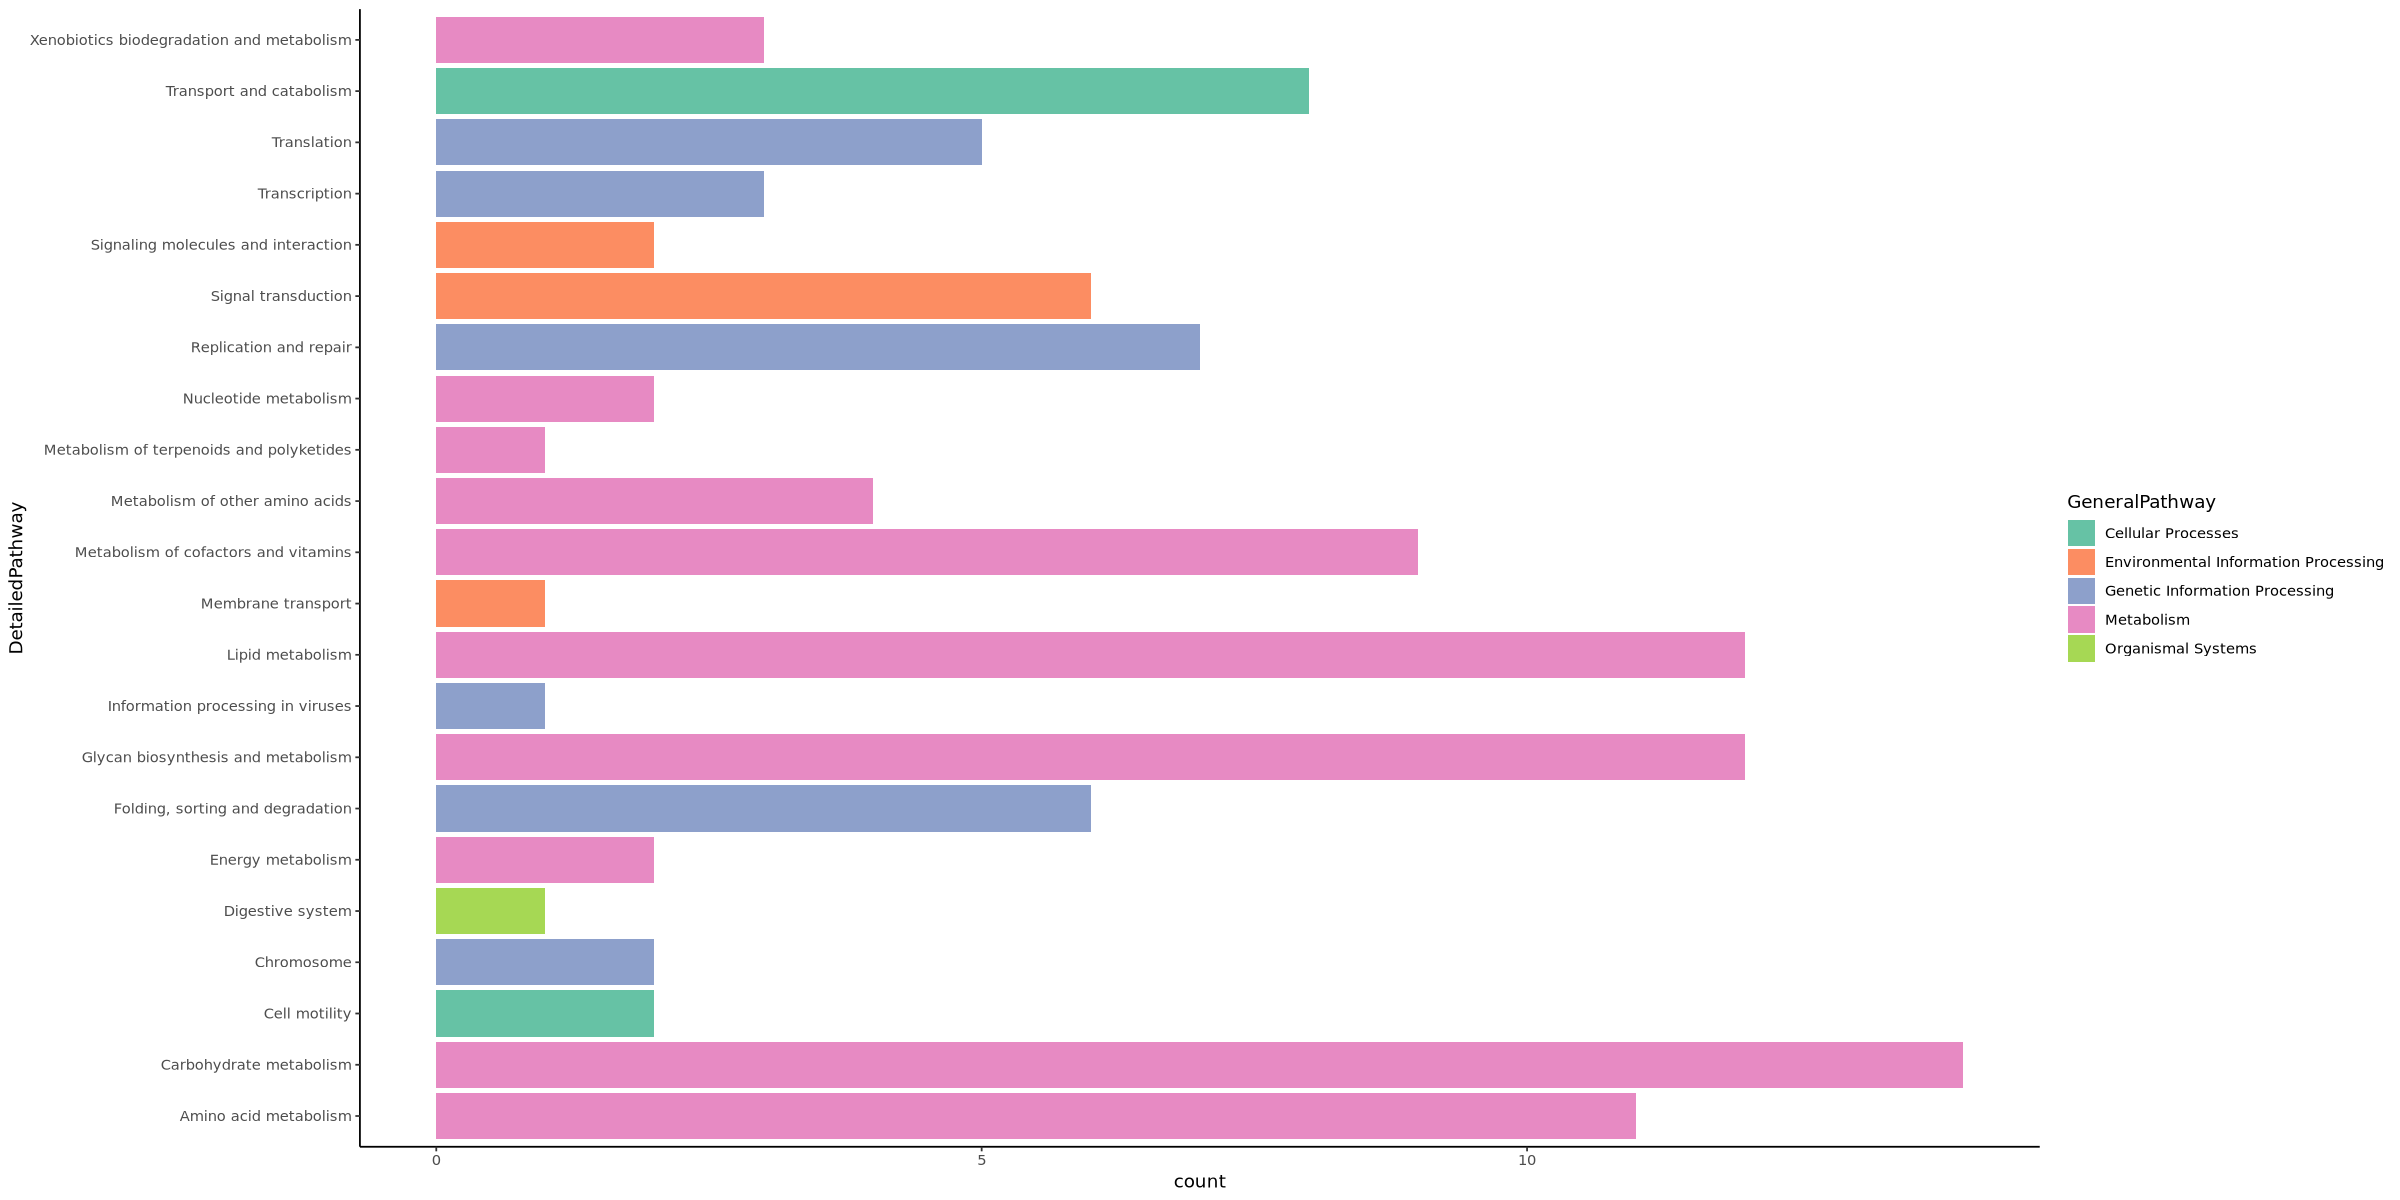

In [9]:
ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar() + 
coord_flip() +
theme_classic() + 
scale_fill_brewer(palette = 'Set2')

want to get the same general pathway bars next to each other 

now want to add directionality... the above plot has both warm and control pathways put together, so want to separate those out

In [11]:
# making sure R see enrichment score as a number
df2$enrichmentScore <- as.numeric(df2$enrichmentScore)

# assigning the enriched pathway to a phase based on the enrichment score
df2$direction <- ifelse(df2$enrichmentScore<0, "control", #neg ES = pathway for control
        ifelse(df2$enrichmentScore>0, "warm", # pos ES = pathway for warm
        "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(df2)

X        ID       Description                       enrichmentScore
1 cvn00053 cvn00053 Ascorbate and aldarate metabolism 0.7513381      
2 cvn00910 cvn00910 Nitrogen metabolism               0.7751841      
3 cvn00511 cvn00511 Other glycan degradation          0.5917499      
4 cvn00052 cvn00052 Galactose metabolism              0.6484812      
5 cvn00592 cvn00592 alpha-Linolenic acid metabolism   0.7377666      
6 cvn03250 cvn03250 Viral life cycle                  0.6023539      
  GeneralPathway                 DetailedPathway                    direction
1 Metabolism                     Carbohydrate metabolism            warm     
2 Metabolism                     Energy metabolism                  warm     
3 Metabolism                     Glycan biosynthesis and metabolism warm     
4 Metabolism                     Carbohydrate metabolism            warm     
5 Metabolism                     Lipid metabolism                   warm     
6 Genetic Information Processing Information processing in viruses  warm

creating another ggplot, but this time adding phase variable to the facet grid so we can see what pathways were methylated for each phase

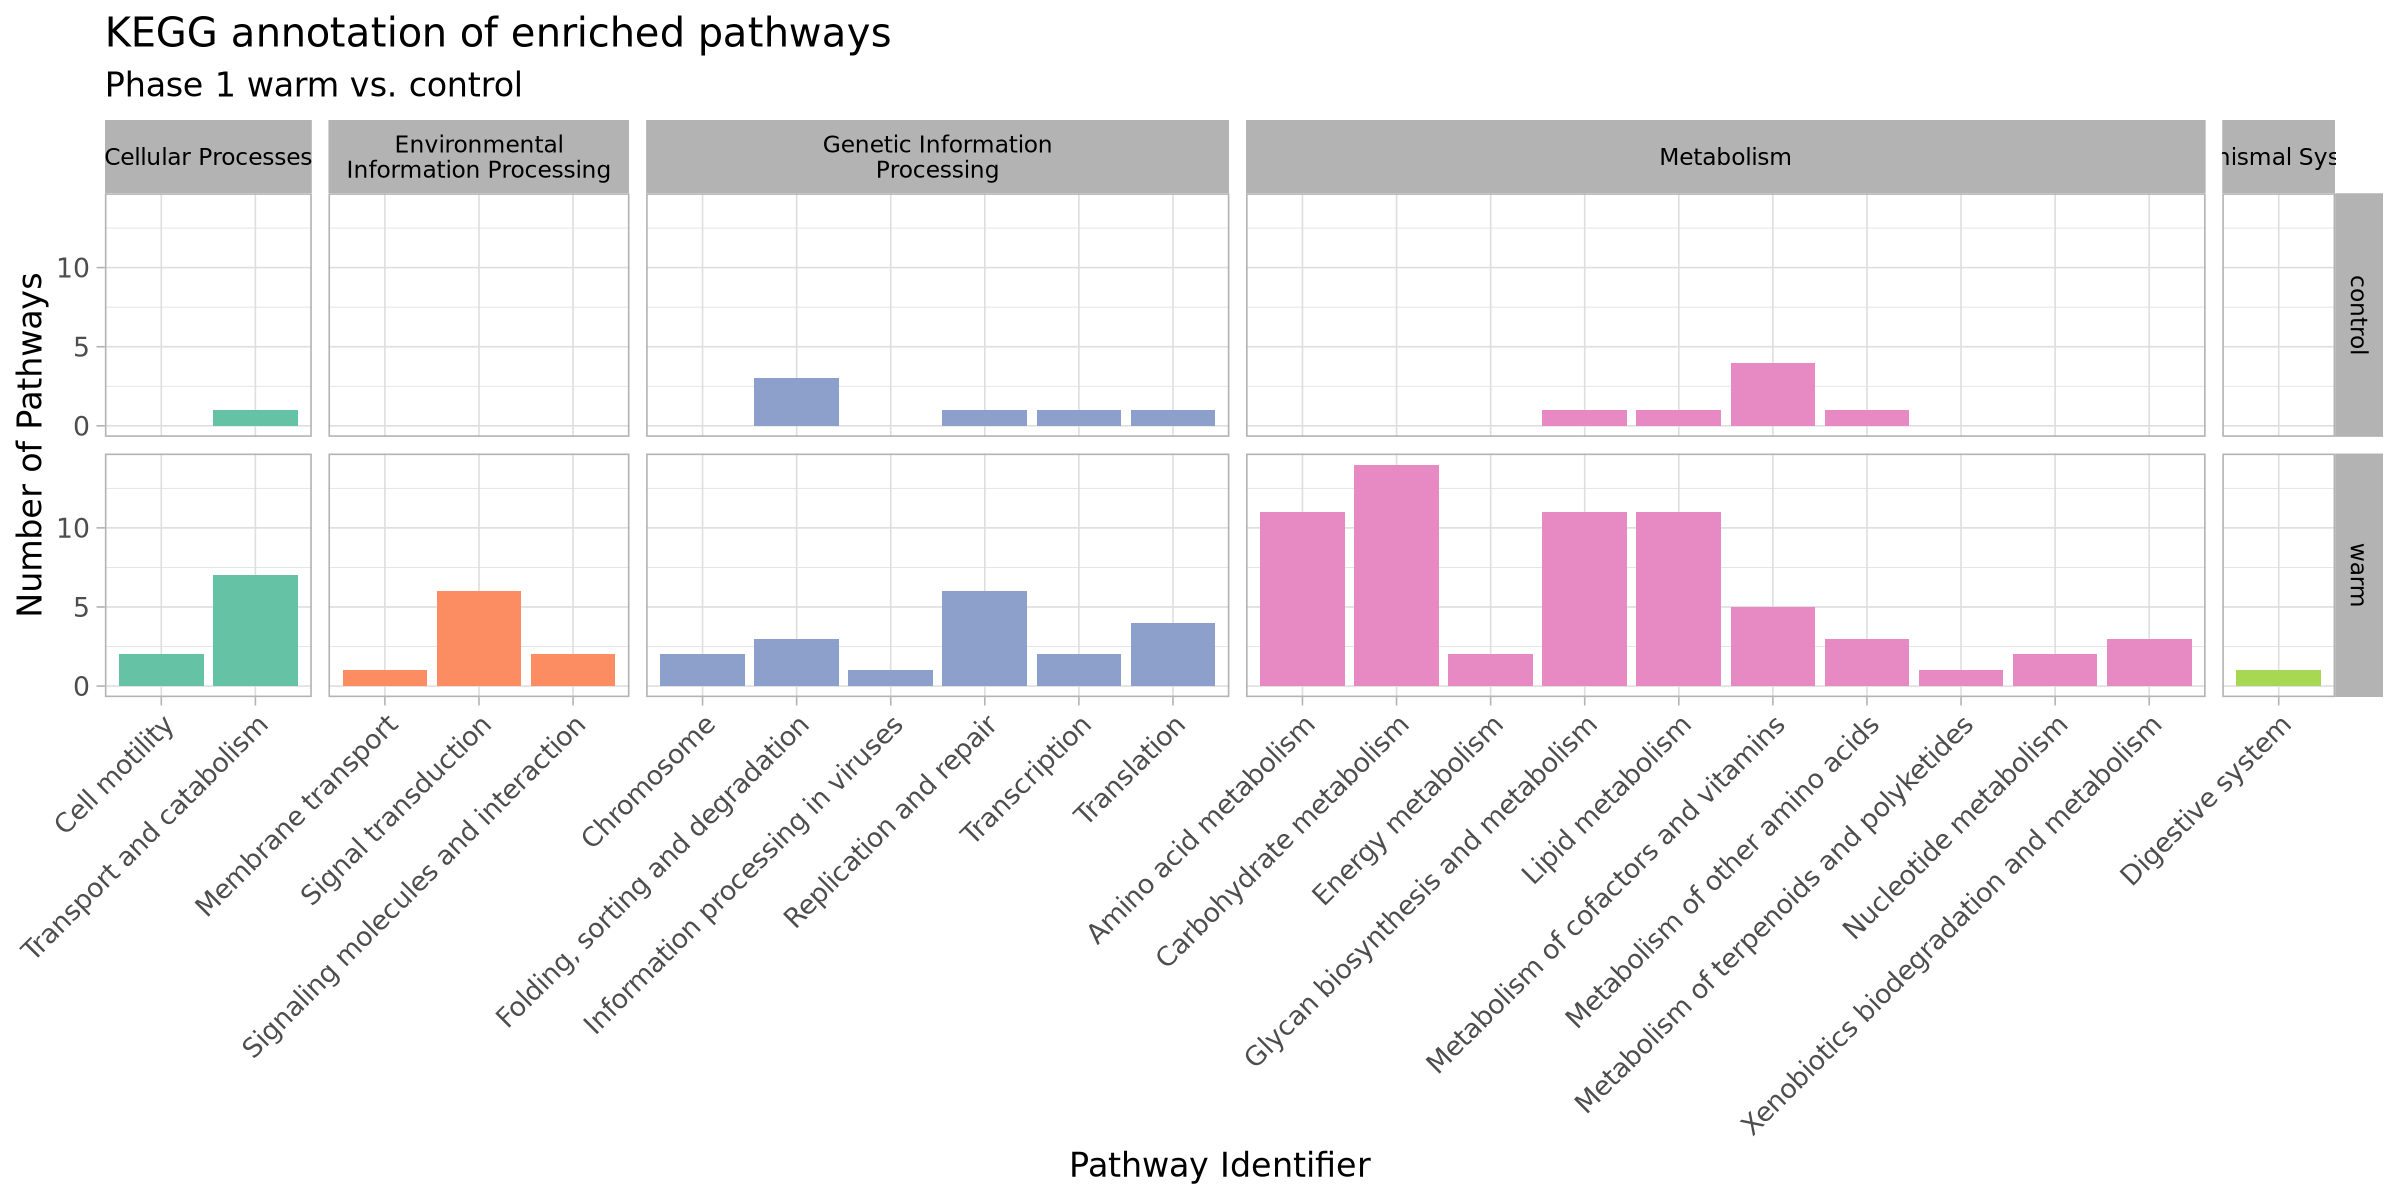

In [12]:
options(repr.plot.width=20, repr.plot.height=10)

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=20) + 
theme(strip.text = element_text(size = 14, color = "black")) +
scale_fill_brewer(palette = 'Set2') +
facet_grid(direction~GeneralPathway, scales='free_x', space = 'free', labeller = label_wrap_gen(multi_line = TRUE)) +
theme(axis.text.x = element_text(angle = 45, hjust=1)) +
labs(title = 'KEGG annotation of enriched pathways', subtitle = 'Phase 1 warm vs. control', y = 'Number of Pathways', 
    x = 'Pathway Identifier',)

p1_wc_kegg_plot

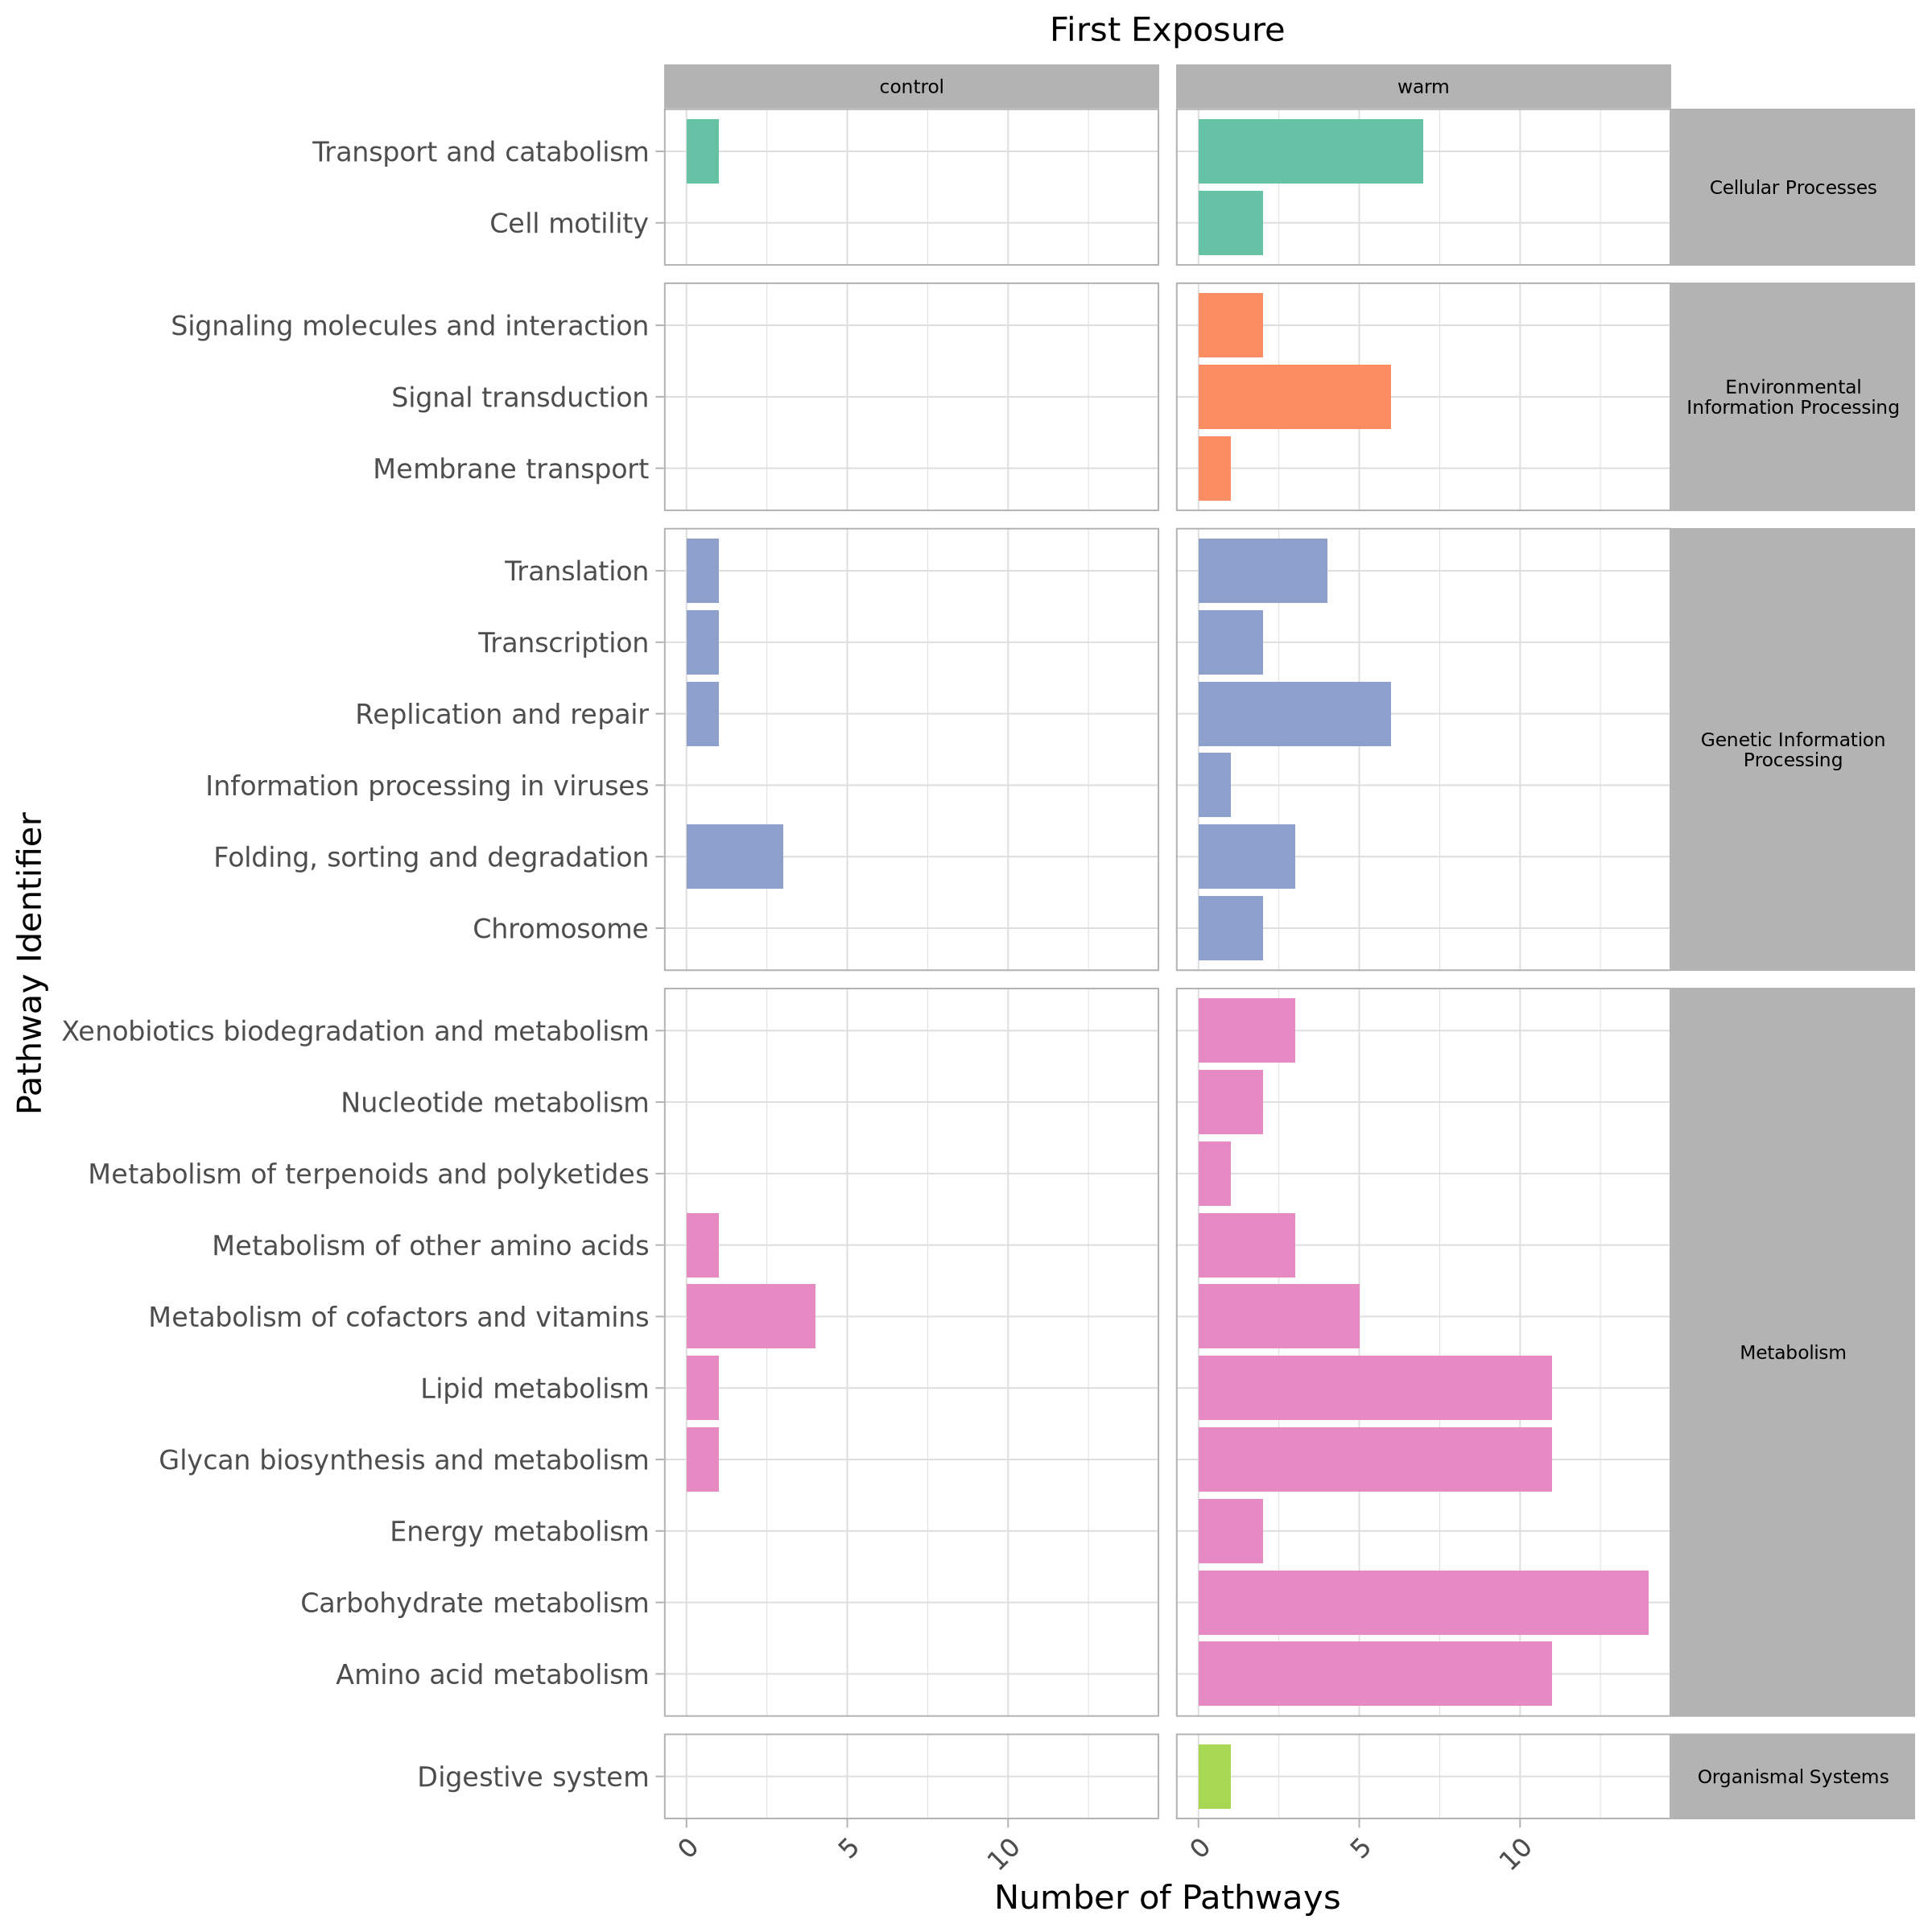

In [14]:
# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=20, repr.plot.height=20)

p1_wc_kegg_plot <- ggplot(data= df2, aes(y = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
theme(strip.text = element_text(size = 14, color = "black")) +
scale_fill_brewer(palette = 'Set2') +
facet_grid(GeneralPathway~direction, scales='free_y', space = 'free', labeller = label_wrap_gen(multi_line = TRUE)) +
theme(axis.text.x = element_text(angle = 45, hjust=1), 
      strip.text.y.right = element_text(angle = 0),
     plot.subtitle = element_text(hjust = 0.5)) +
labs(subtitle = 'First Exposure', x = 'Number of Pathways', 
    y = 'Pathway Identifier',)

p1_wc_kegg_plot

[theme options for ggplot](https://ggplot2.tidyverse.org/reference/theme.html)

I think this is really interesting to see only warming treatment had methylated environmental information processing, maybe triggerring that cascade of genes in response to stress?

this plot below is the same but colored differently

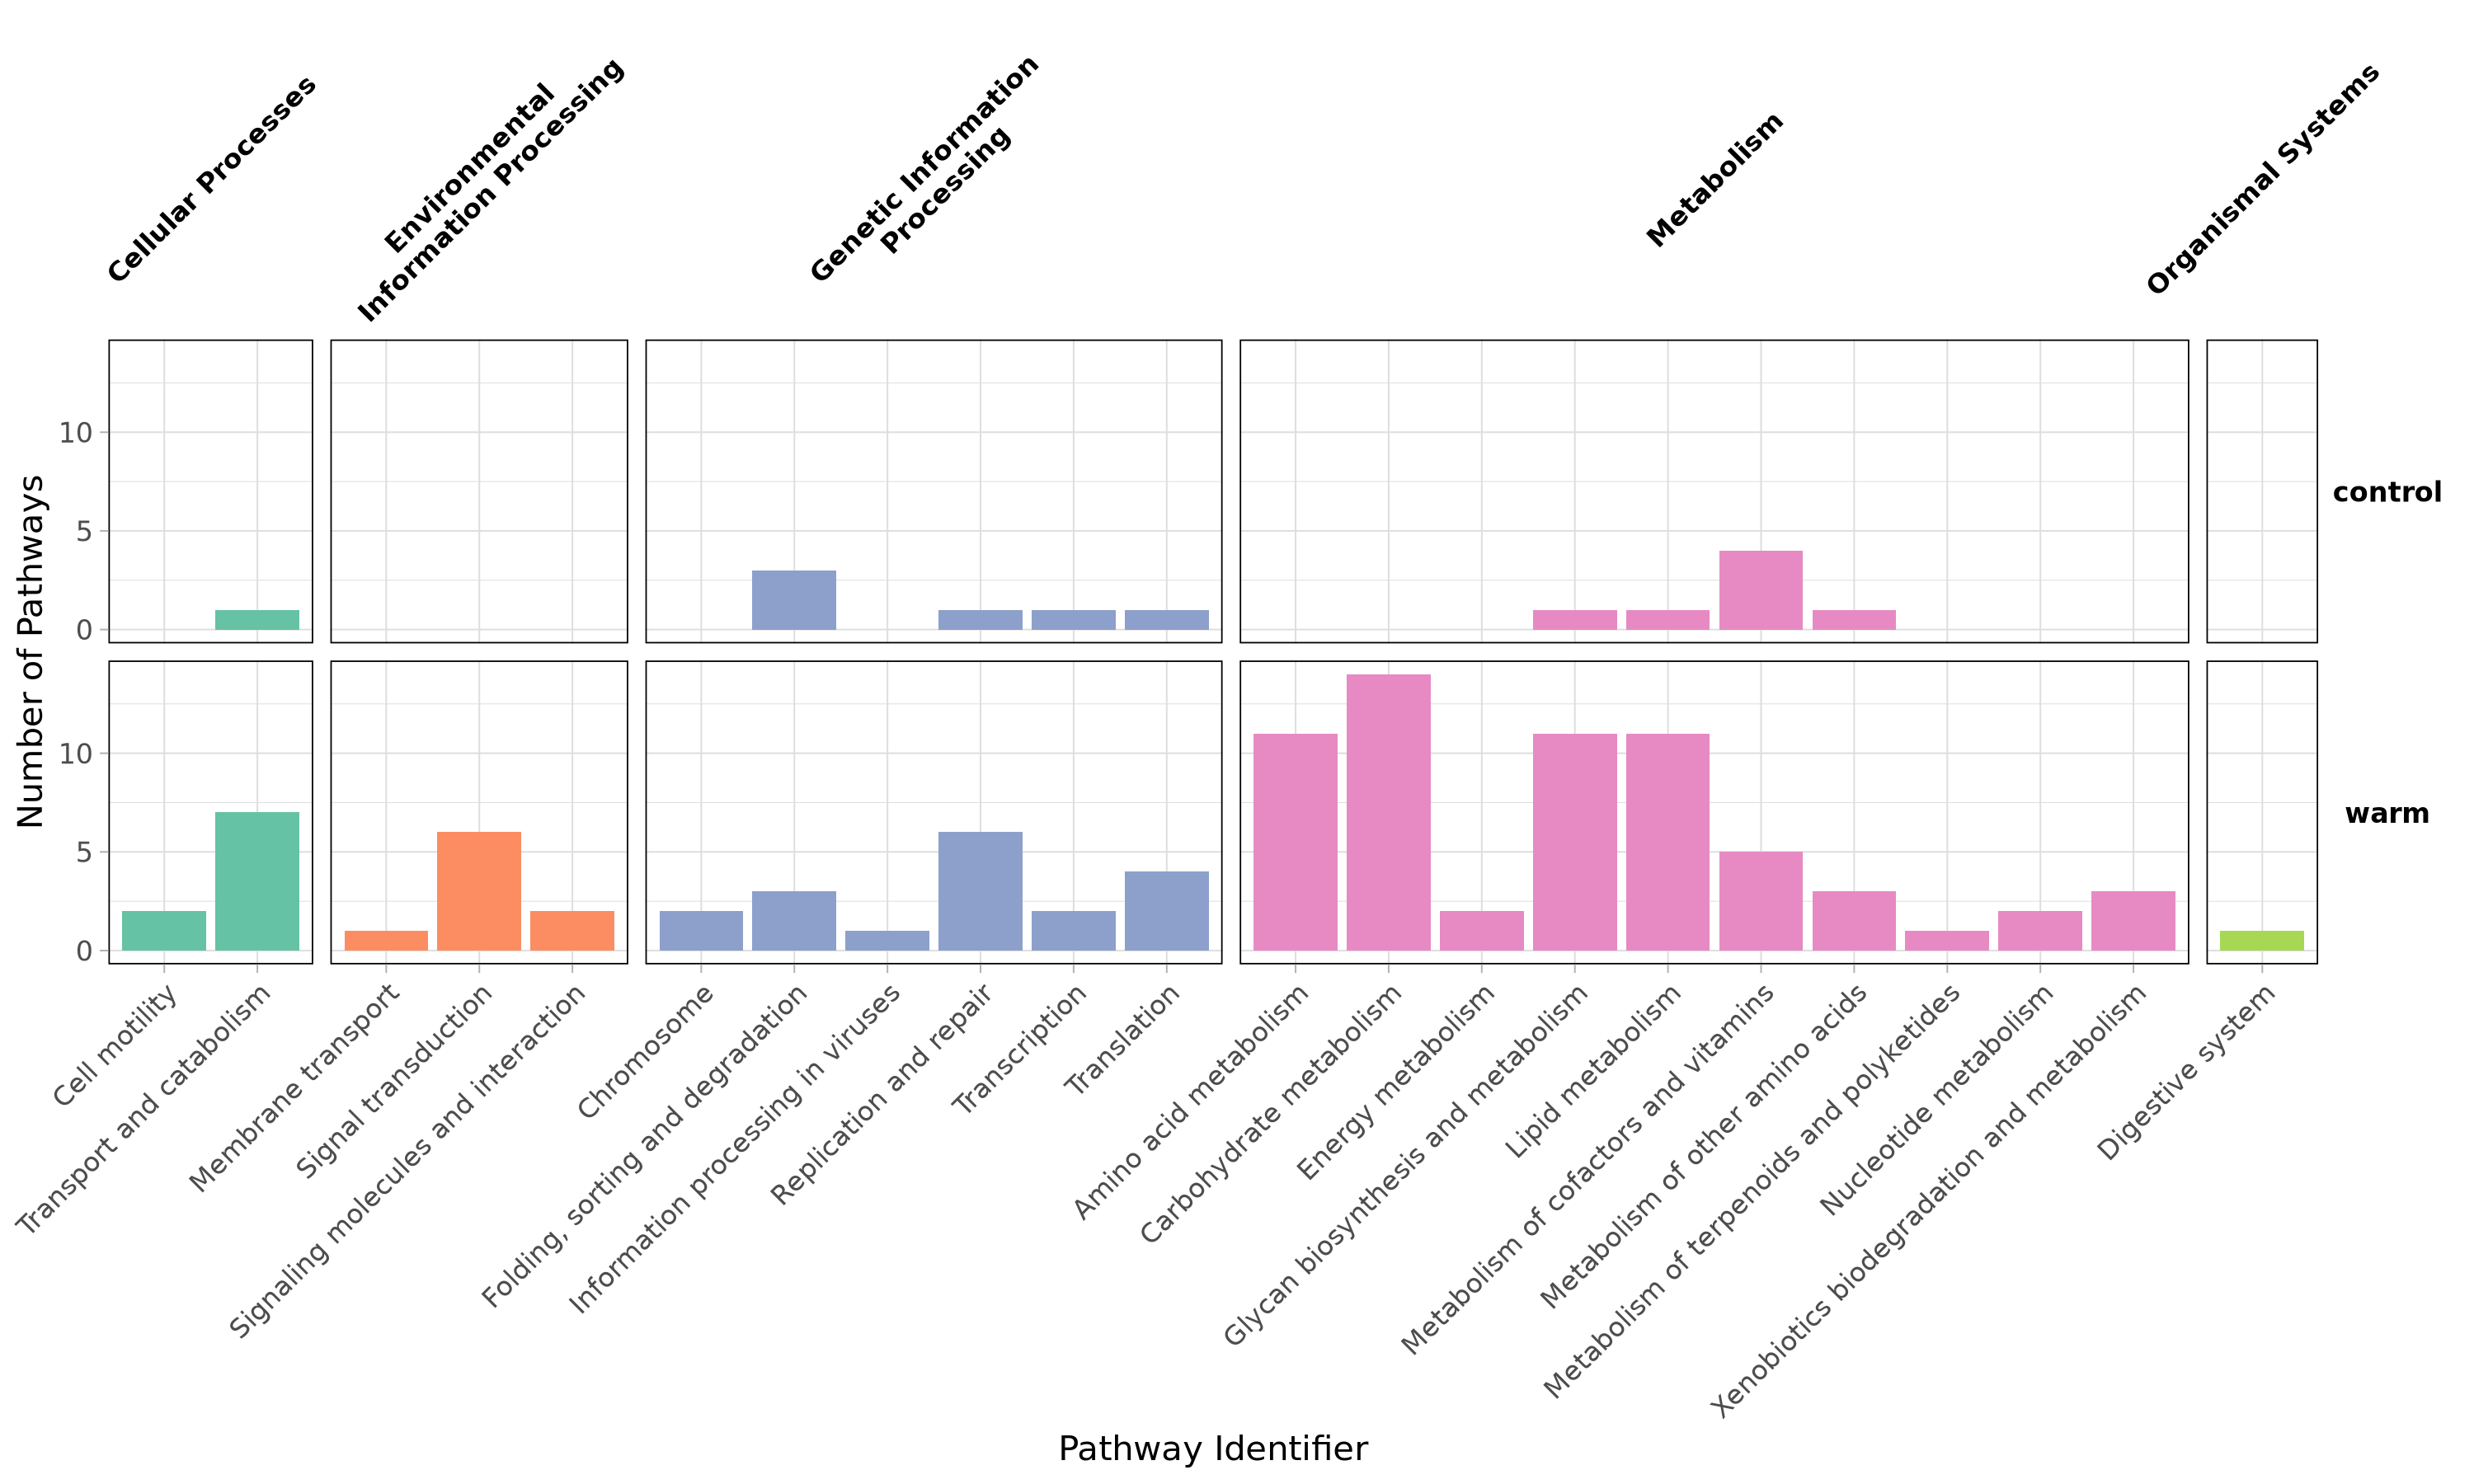

In [15]:
# horizontal, but color by general pathway

# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=25, repr.plot.height=15)

# changing color scheme

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_fill_brewer(palette = 'Set2') +
theme(strip.text = element_text(size = 14, color = "black")) +
facet_grid(direction~GeneralPathway, 
           scales='free_x', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           labeller = label_wrap_gen(multi_line = TRUE)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      axis.text.x = element_text(angle = 45, hjust = 1),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(angle=45, size=20),
      plot.subtitle = element_text(hjust = 0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      strip.clip = 'off',
     strip.background = element_rect('transparent')) +
labs(y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1_wc_kegg_plot

feel like the vertical plot is harder to understand for whatever reason... want to try out a couple of different things:
- horizontal, but keeping color scheme
- veritcal, but each general pathway is it's own color
- coloring exposure labels to match volcano plots

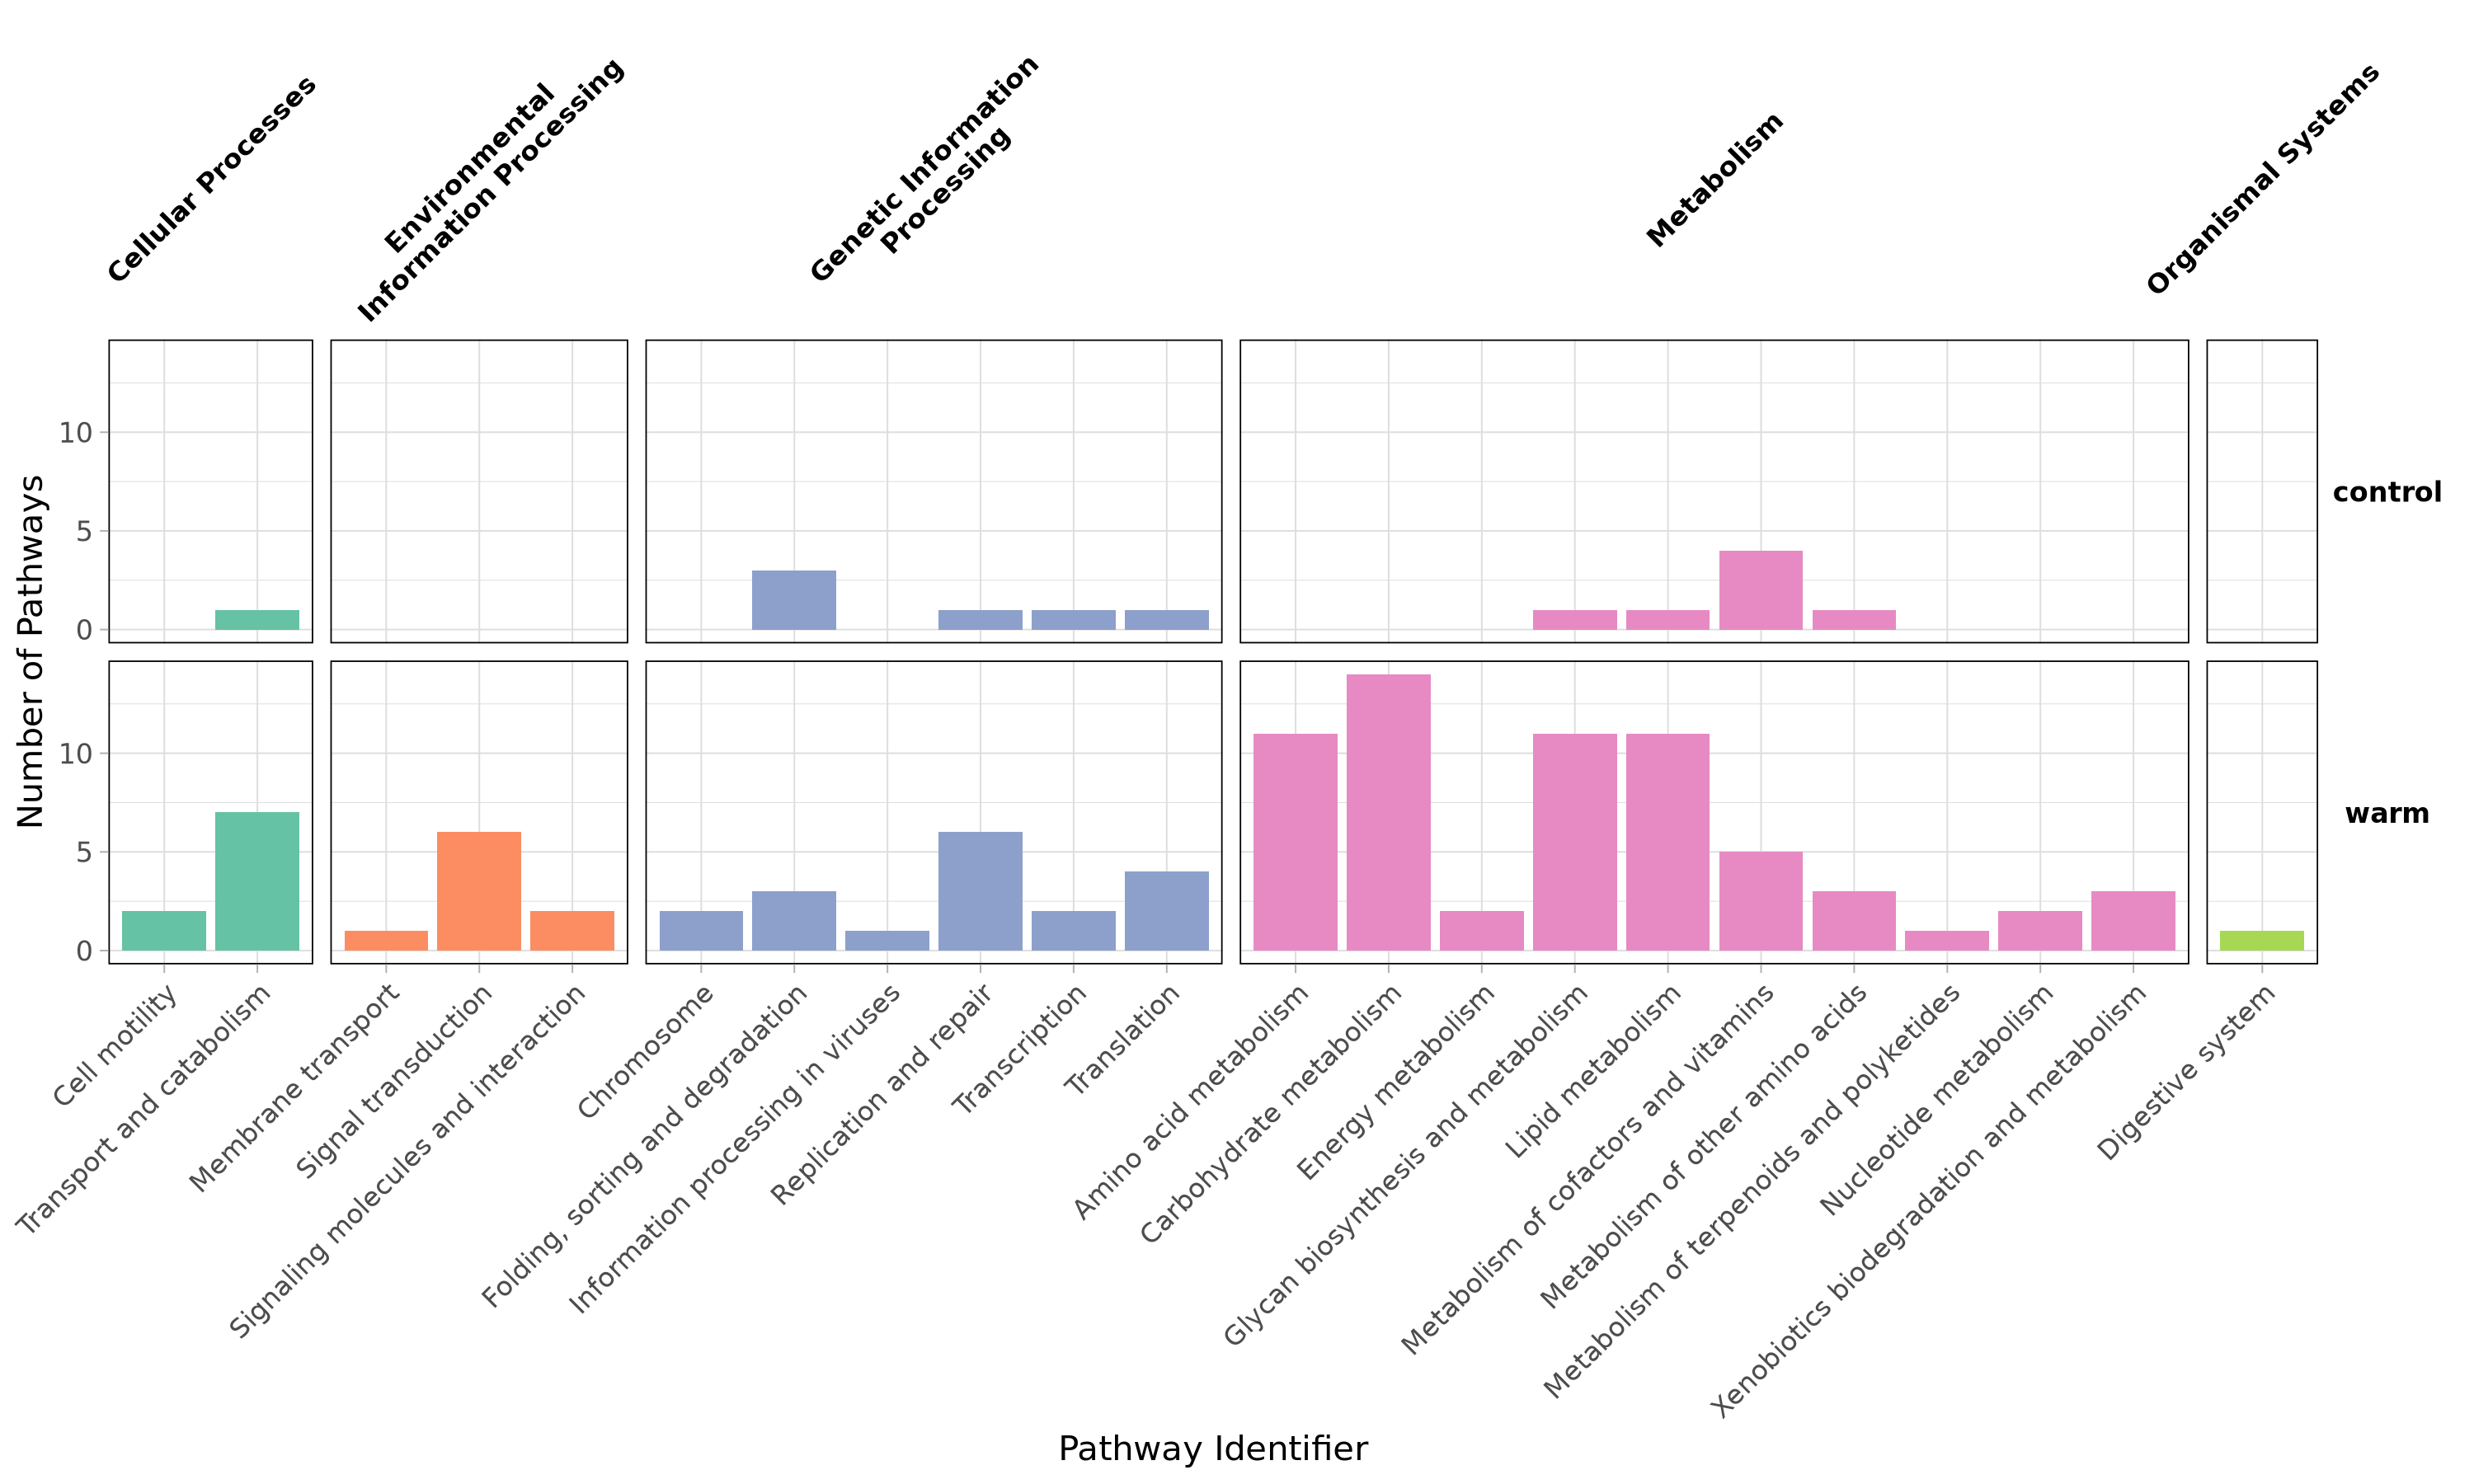

In [16]:
# horizontal, but color by general pathway

# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=25, repr.plot.height=15)

# changing color scheme

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_fill_brewer(palette = 'Set2') +
theme(strip.text = element_text(size = 14, color = "black")) +
facet_grid(direction~GeneralPathway, 
           scales='free_x', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           labeller = label_wrap_gen(multi_line = TRUE)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      axis.text.x = element_text(angle = 45, hjust = 1),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(angle=45, size=20),
      plot.subtitle = element_text(hjust = 0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      strip.clip = 'off',
     strip.background = element_rect('transparent')) +
labs(y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1_wc_kegg_plot

In [18]:
library(ggh4x)

In [19]:
strip1 <- strip_themed(background_y = elem_list_rect(fill = c("lightgreen",'hotpink1')), clip='off')

strip2 <- strip_themed(by_layer_x=TRUE, clip='off')

In [20]:
df2$exposure <- 'First Exposure'
head(df2)

X        ID       Description                       enrichmentScore
1 cvn00053 cvn00053 Ascorbate and aldarate metabolism 0.7513381      
2 cvn00910 cvn00910 Nitrogen metabolism               0.7751841      
3 cvn00511 cvn00511 Other glycan degradation          0.5917499      
4 cvn00052 cvn00052 Galactose metabolism              0.6484812      
5 cvn00592 cvn00592 alpha-Linolenic acid metabolism   0.7377666      
6 cvn03250 cvn03250 Viral life cycle                  0.6023539      
  GeneralPathway                 DetailedPathway                    direction
1 Metabolism                     Carbohydrate metabolism            warm     
2 Metabolism                     Energy metabolism                  warm     
3 Metabolism                     Glycan biosynthesis and metabolism warm     
4 Metabolism                     Carbohydrate metabolism            warm     
5 Metabolism                     Lipid metabolism                   warm     
6 Genetic Information Processing Information processing in viruses  warm     
  exposure      
1 First Exposure
2 First Exposure
3 First Exposure
4 First Exposure
5 First Exposure
6 First Exposure

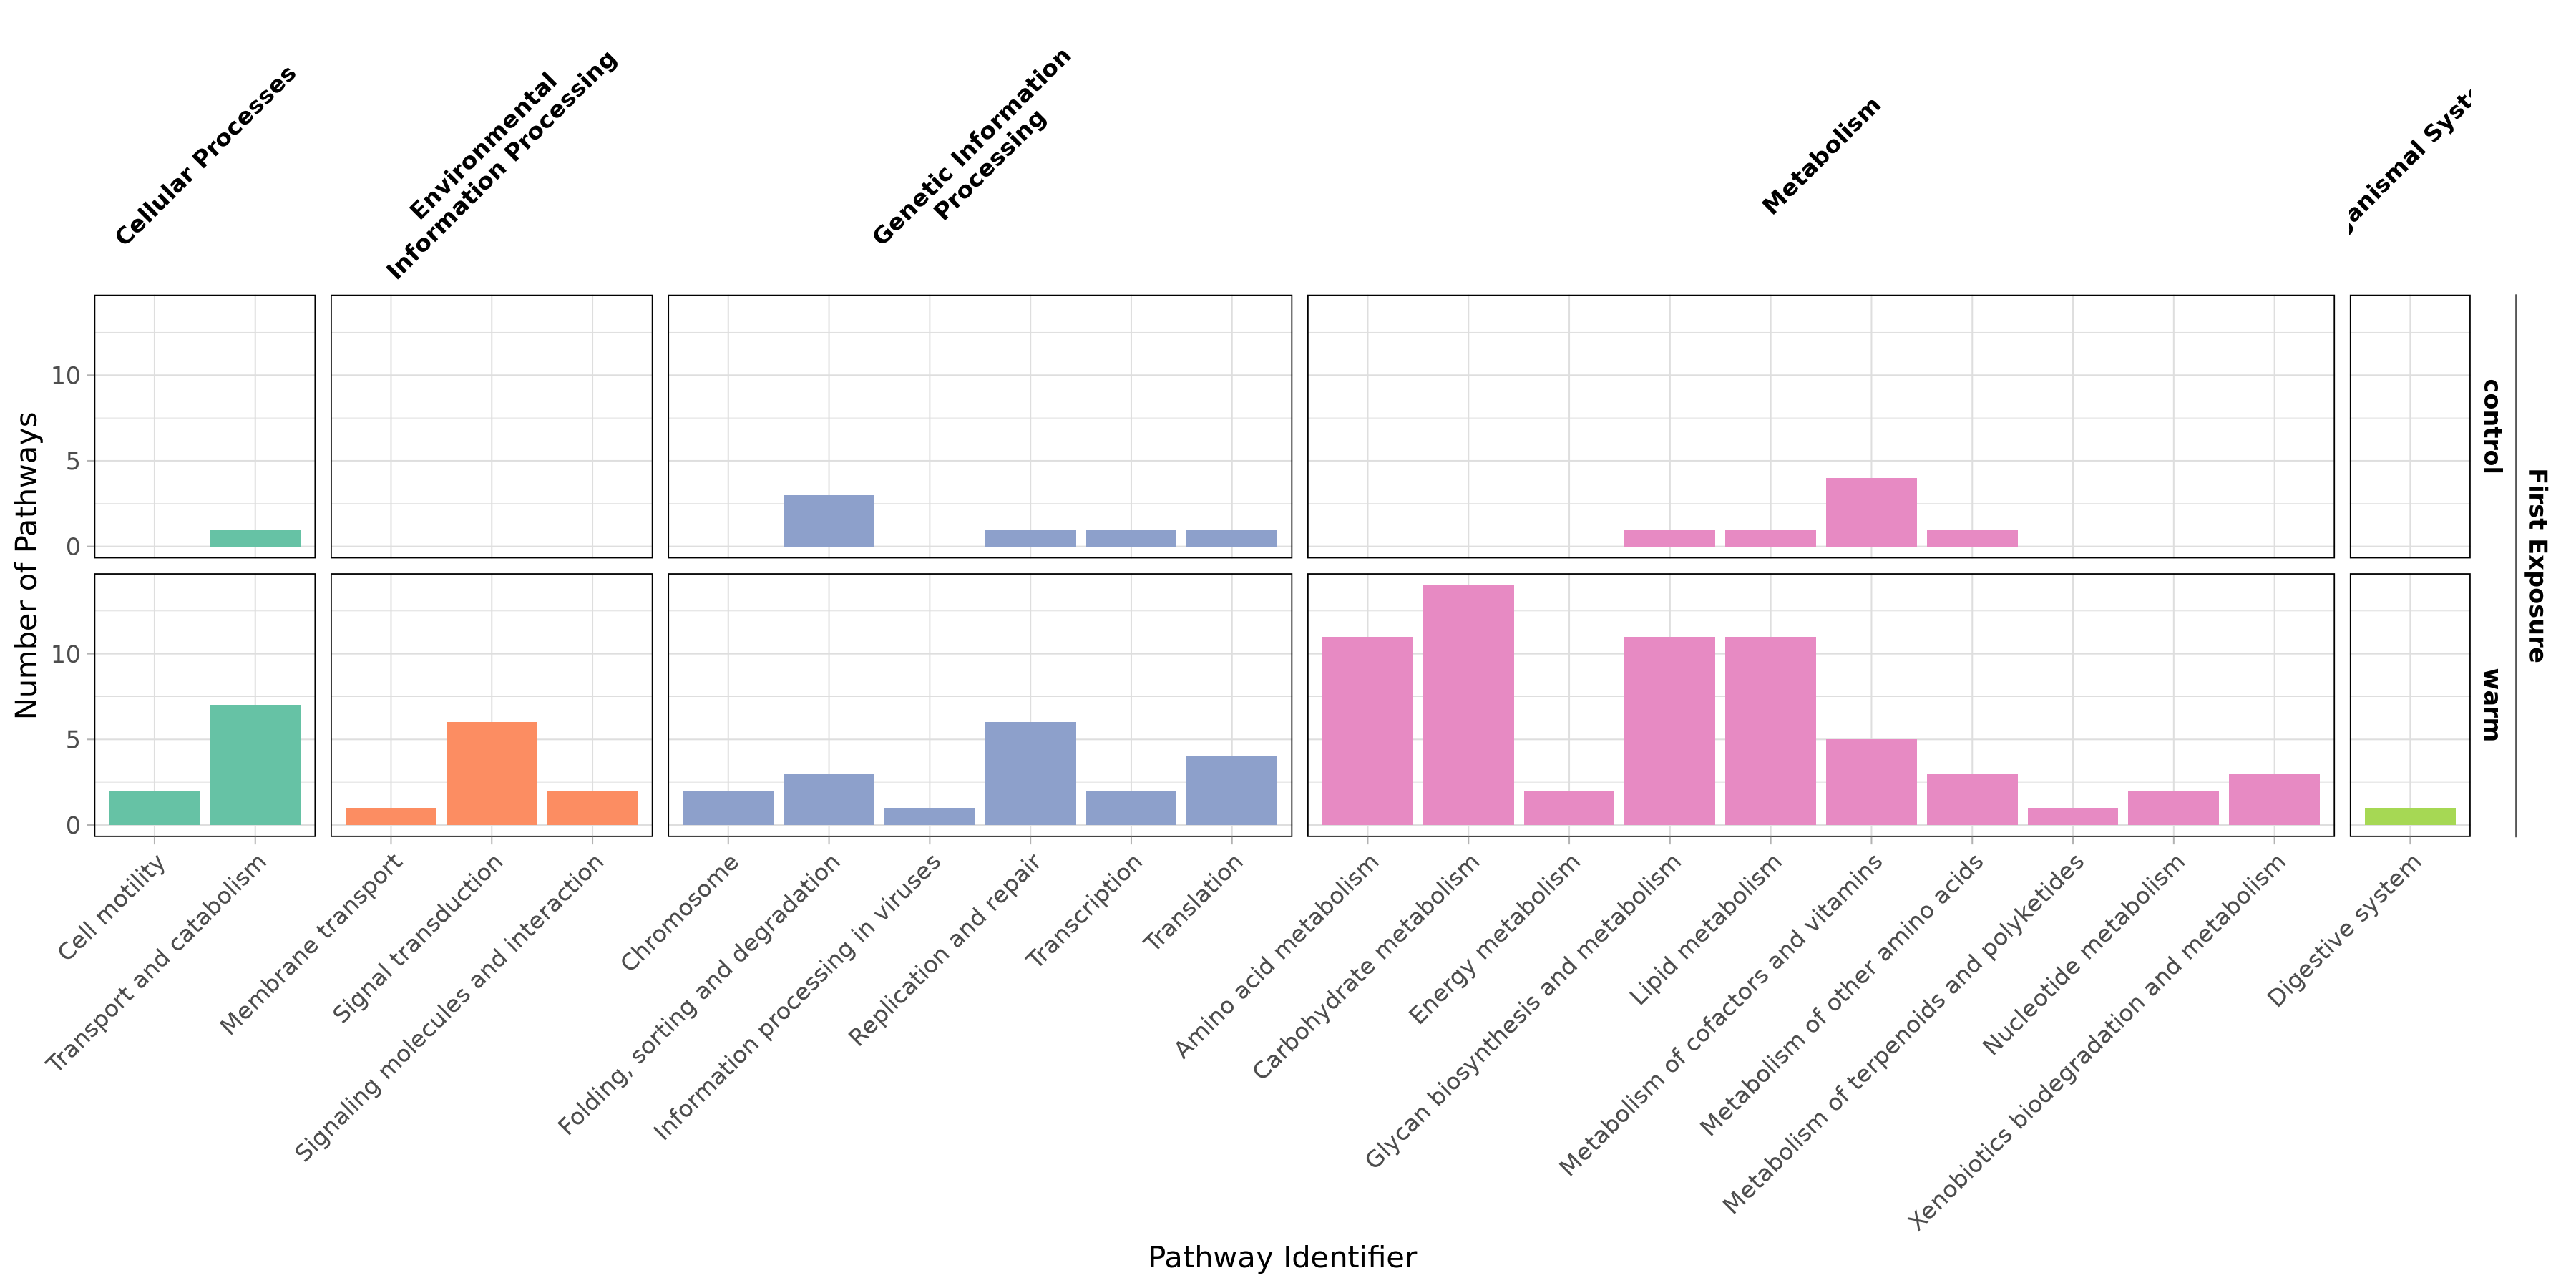

In [119]:
# horizontal, but color by general pathway

# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=30, repr.plot.height=15)

# changing color scheme

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
theme(strip.text = element_text(size = 14, color = "black")) +
facet_nested(exposure + direction ~GeneralPathway, 
           scales='free_x', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           nest_line = TRUE,
            # strip = strip2,
           labeller = label_wrap_gen(multi_line = TRUE)) +
scale_fill_brewer(palette = 'Set2') +
theme(strip.text.y.right = element_text(angle = 270, size=20),
      axis.text.x = element_text(angle = 45, hjust = 1),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(angle=45, size=20),
      plot.subtitle = element_text(hjust = 0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
     strip.background = element_rect('transparent')) +
labs(y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1_wc_kegg_plot

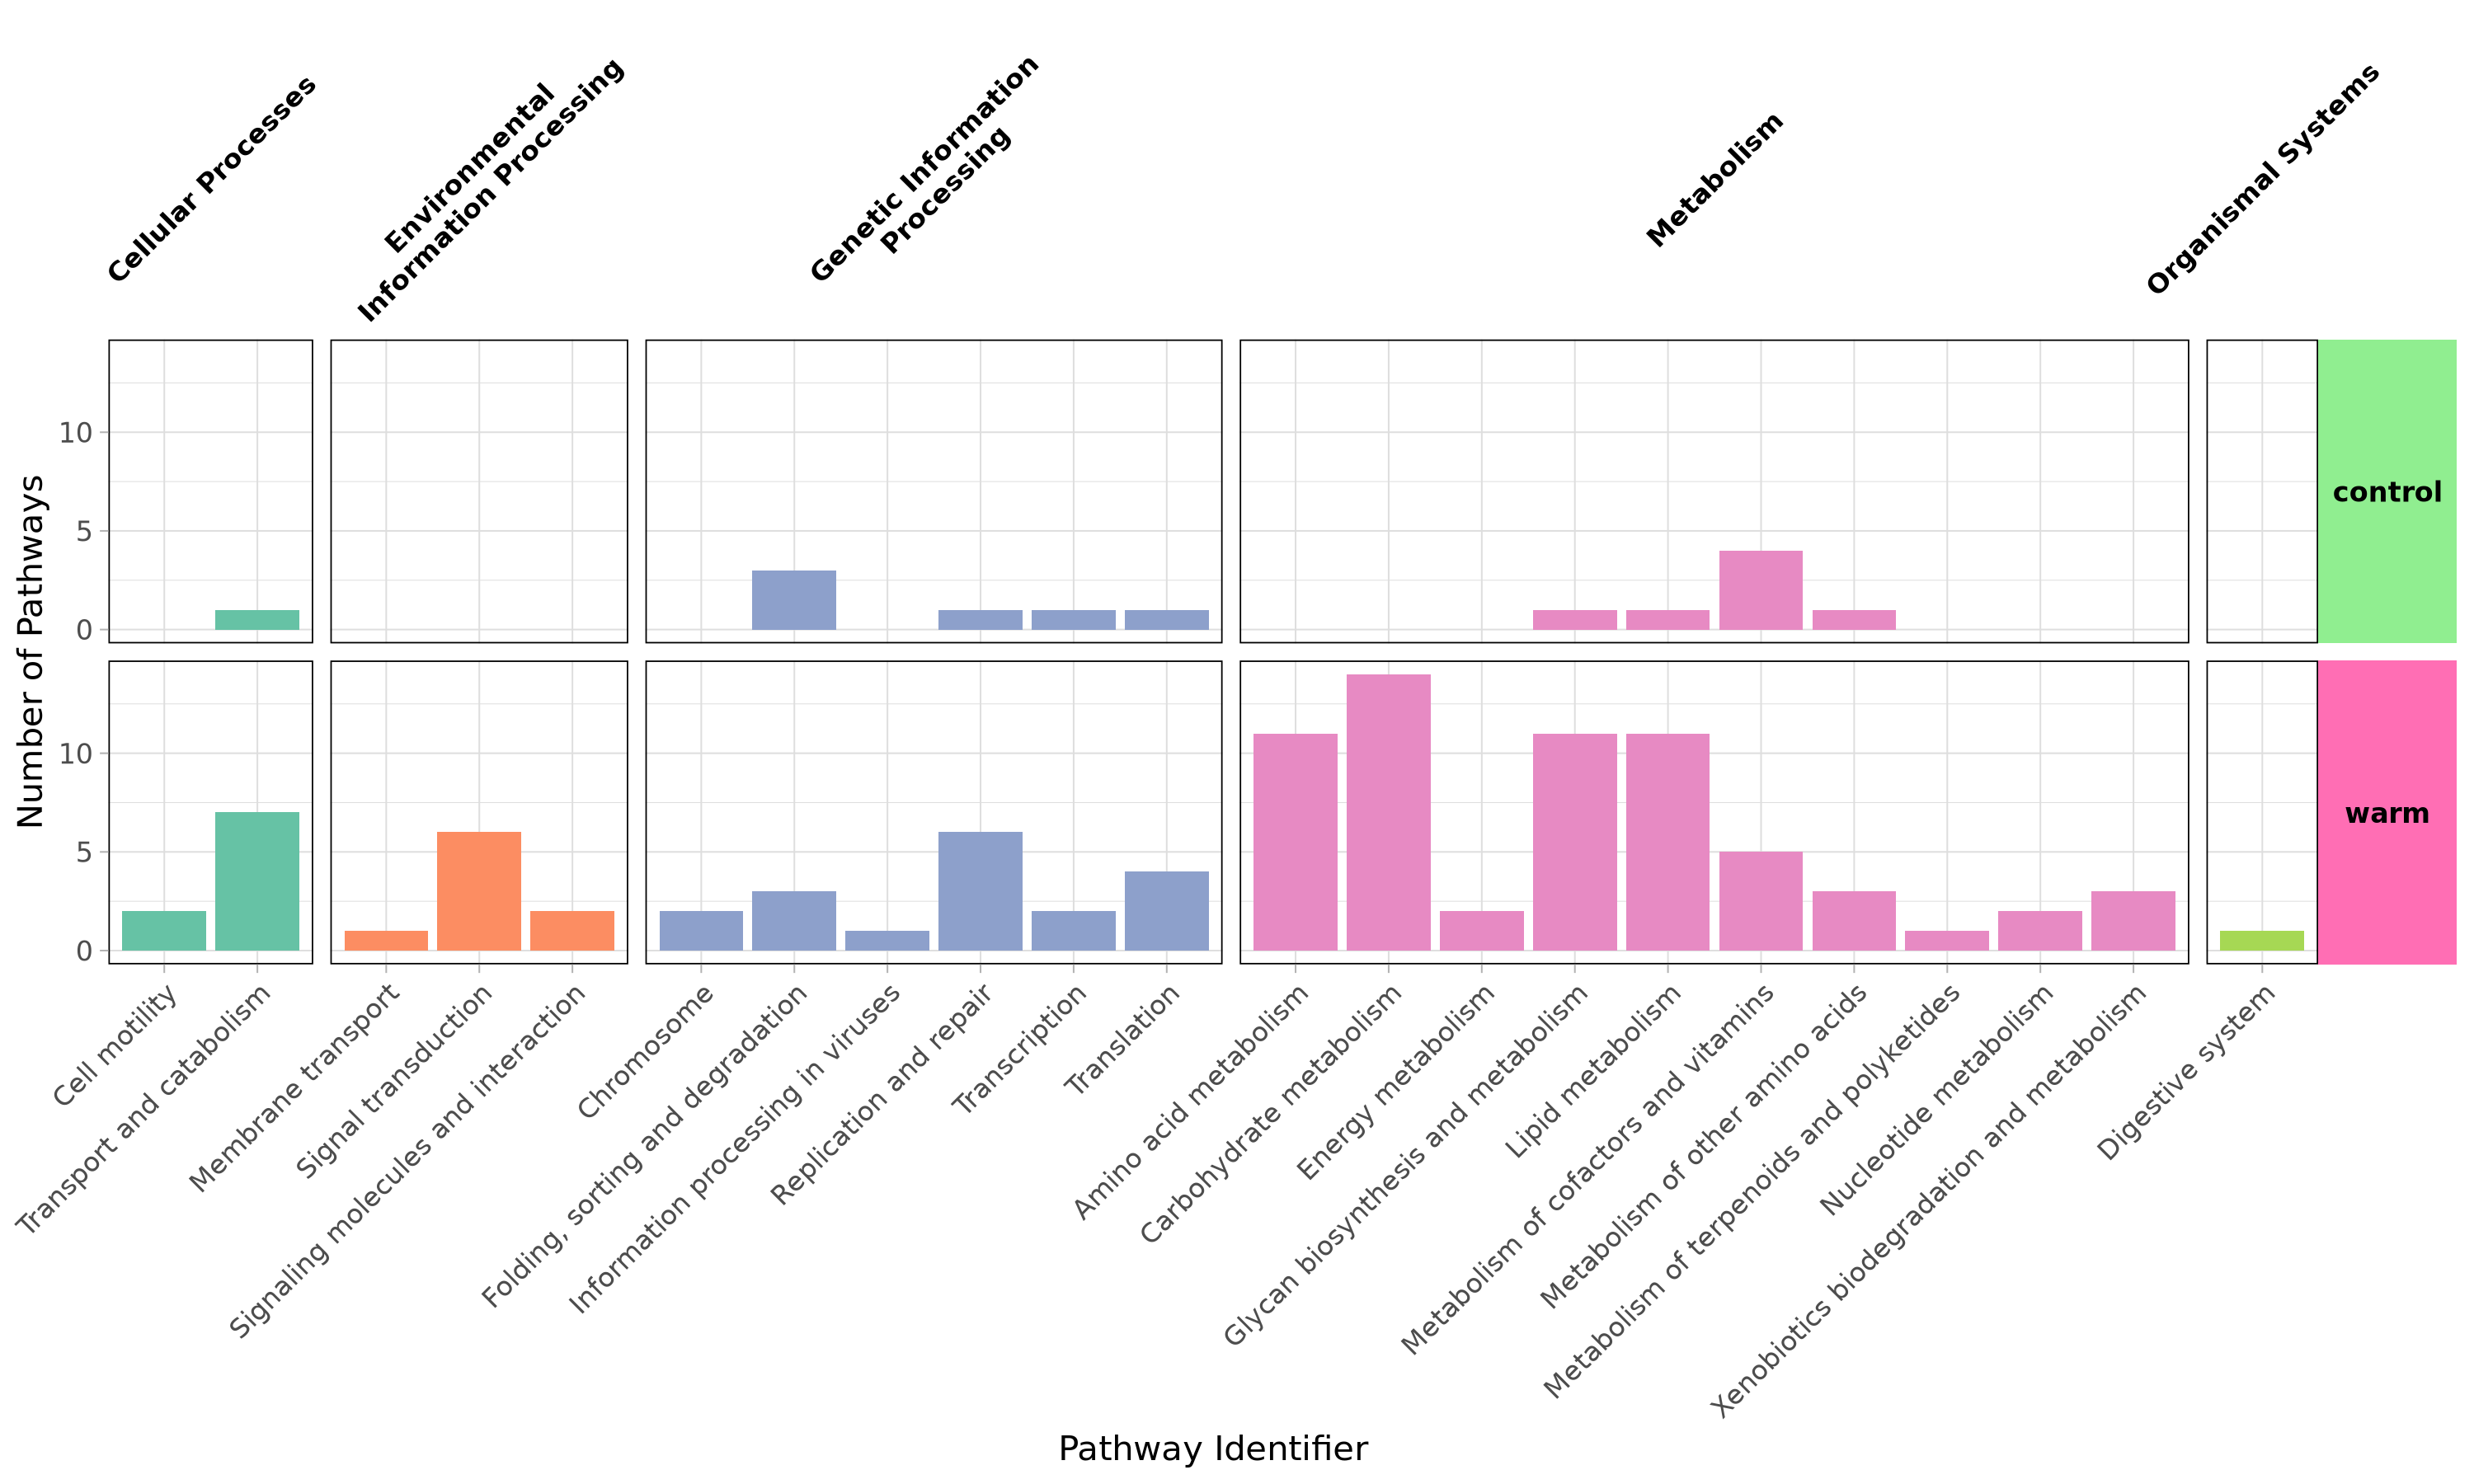

In [115]:
# horizontal, but color by general pathway

# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=25, repr.plot.height=15)

# changing color scheme

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_fill_brewer(palette = 'Set2') +
theme(strip.text = element_text(size = 14, color = "black")) +
facet_grid2(direction~GeneralPathway, 
           scales='free_x', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           strip=strip1,
           labeller = label_wrap_gen(multi_line = TRUE)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      axis.text.x = element_text(angle = 45, hjust = 1),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(angle=45, size=20),
      plot.subtitle = element_text(hjust = 0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      strip.clip = 'off',
     strip.background = element_rect('transparent')) +
labs(y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1_wc_kegg_plot

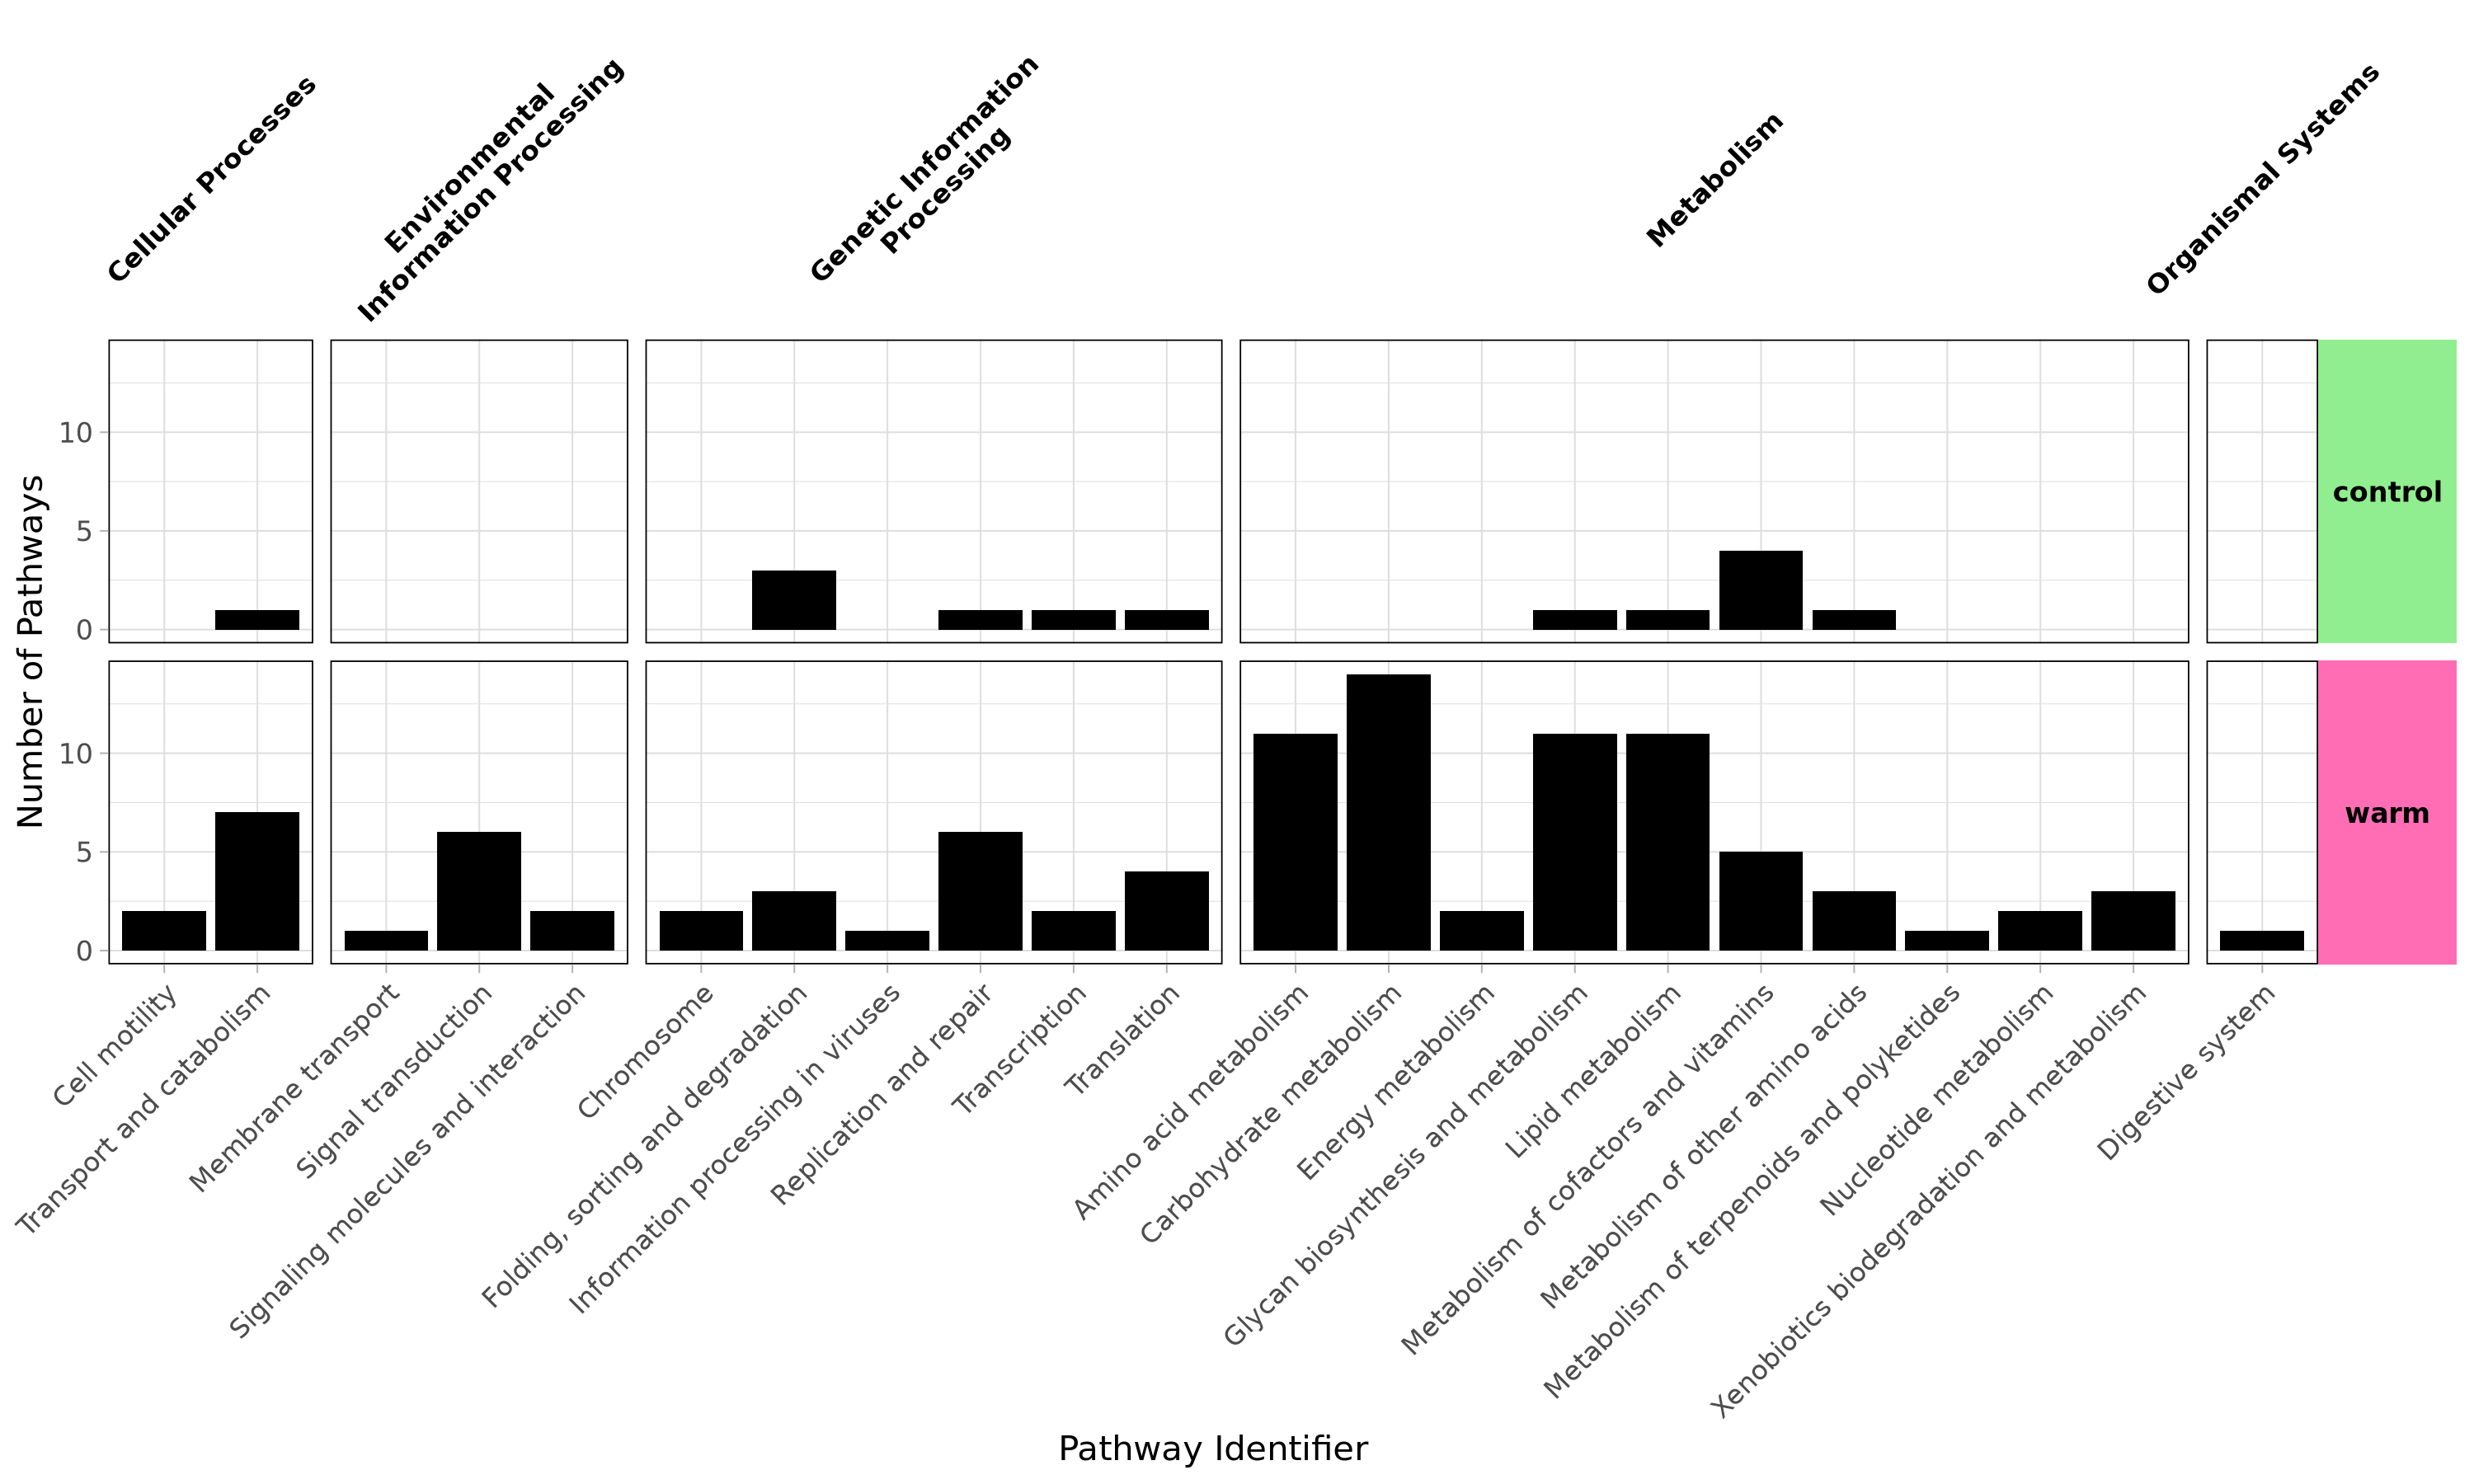

In [118]:
# horizontal, but color by general pathway

# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=25, repr.plot.height=15)

# changing color scheme

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_fill_manual(values=c('black','black','black','black','black')) +
theme(strip.text = element_text(size = 14, color = "black")) +
facet_grid2(direction~GeneralPathway, 
           scales='free_x', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           strip=strip1,
           labeller = label_wrap_gen(multi_line = TRUE)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      axis.text.x = element_text(angle = 45, hjust = 1),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(angle=45, size=20),
      plot.subtitle = element_text(hjust = 0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      strip.clip = 'off',
     strip.background = element_rect('transparent')) +
labs(y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1_wc_kegg_plot

In [19]:
strip1 <- strip_themed(background_y = elem_list_rect(fill = c("lightgreen",'hotpink1')), clip='off')

strip2 <- strip_themed(by_layer_x=TRUE, clip='off')

In [20]:
df2$exposure <- 'First Exposure'
head(df2)

X        ID       Description                       enrichmentScore
1 cvn00053 cvn00053 Ascorbate and aldarate metabolism 0.7513381      
2 cvn00910 cvn00910 Nitrogen metabolism               0.7751841      
3 cvn00511 cvn00511 Other glycan degradation          0.5917499      
4 cvn00052 cvn00052 Galactose metabolism              0.6484812      
5 cvn00592 cvn00592 alpha-Linolenic acid metabolism   0.7377666      
6 cvn03250 cvn03250 Viral life cycle                  0.6023539      
  GeneralPathway                 DetailedPathway                    direction
1 Metabolism                     Carbohydrate metabolism            warm     
2 Metabolism                     Energy metabolism                  warm     
3 Metabolism                     Glycan biosynthesis and metabolism warm     
4 Metabolism                     Carbohydrate metabolism            warm     
5 Metabolism                     Lipid metabolism                   warm     
6 Genetic Information Processing Information processing in viruses  warm     
  exposure      
1 First Exposure
2 First Exposure
3 First Exposure
4 First Exposure
5 First Exposure
6 First Exposure

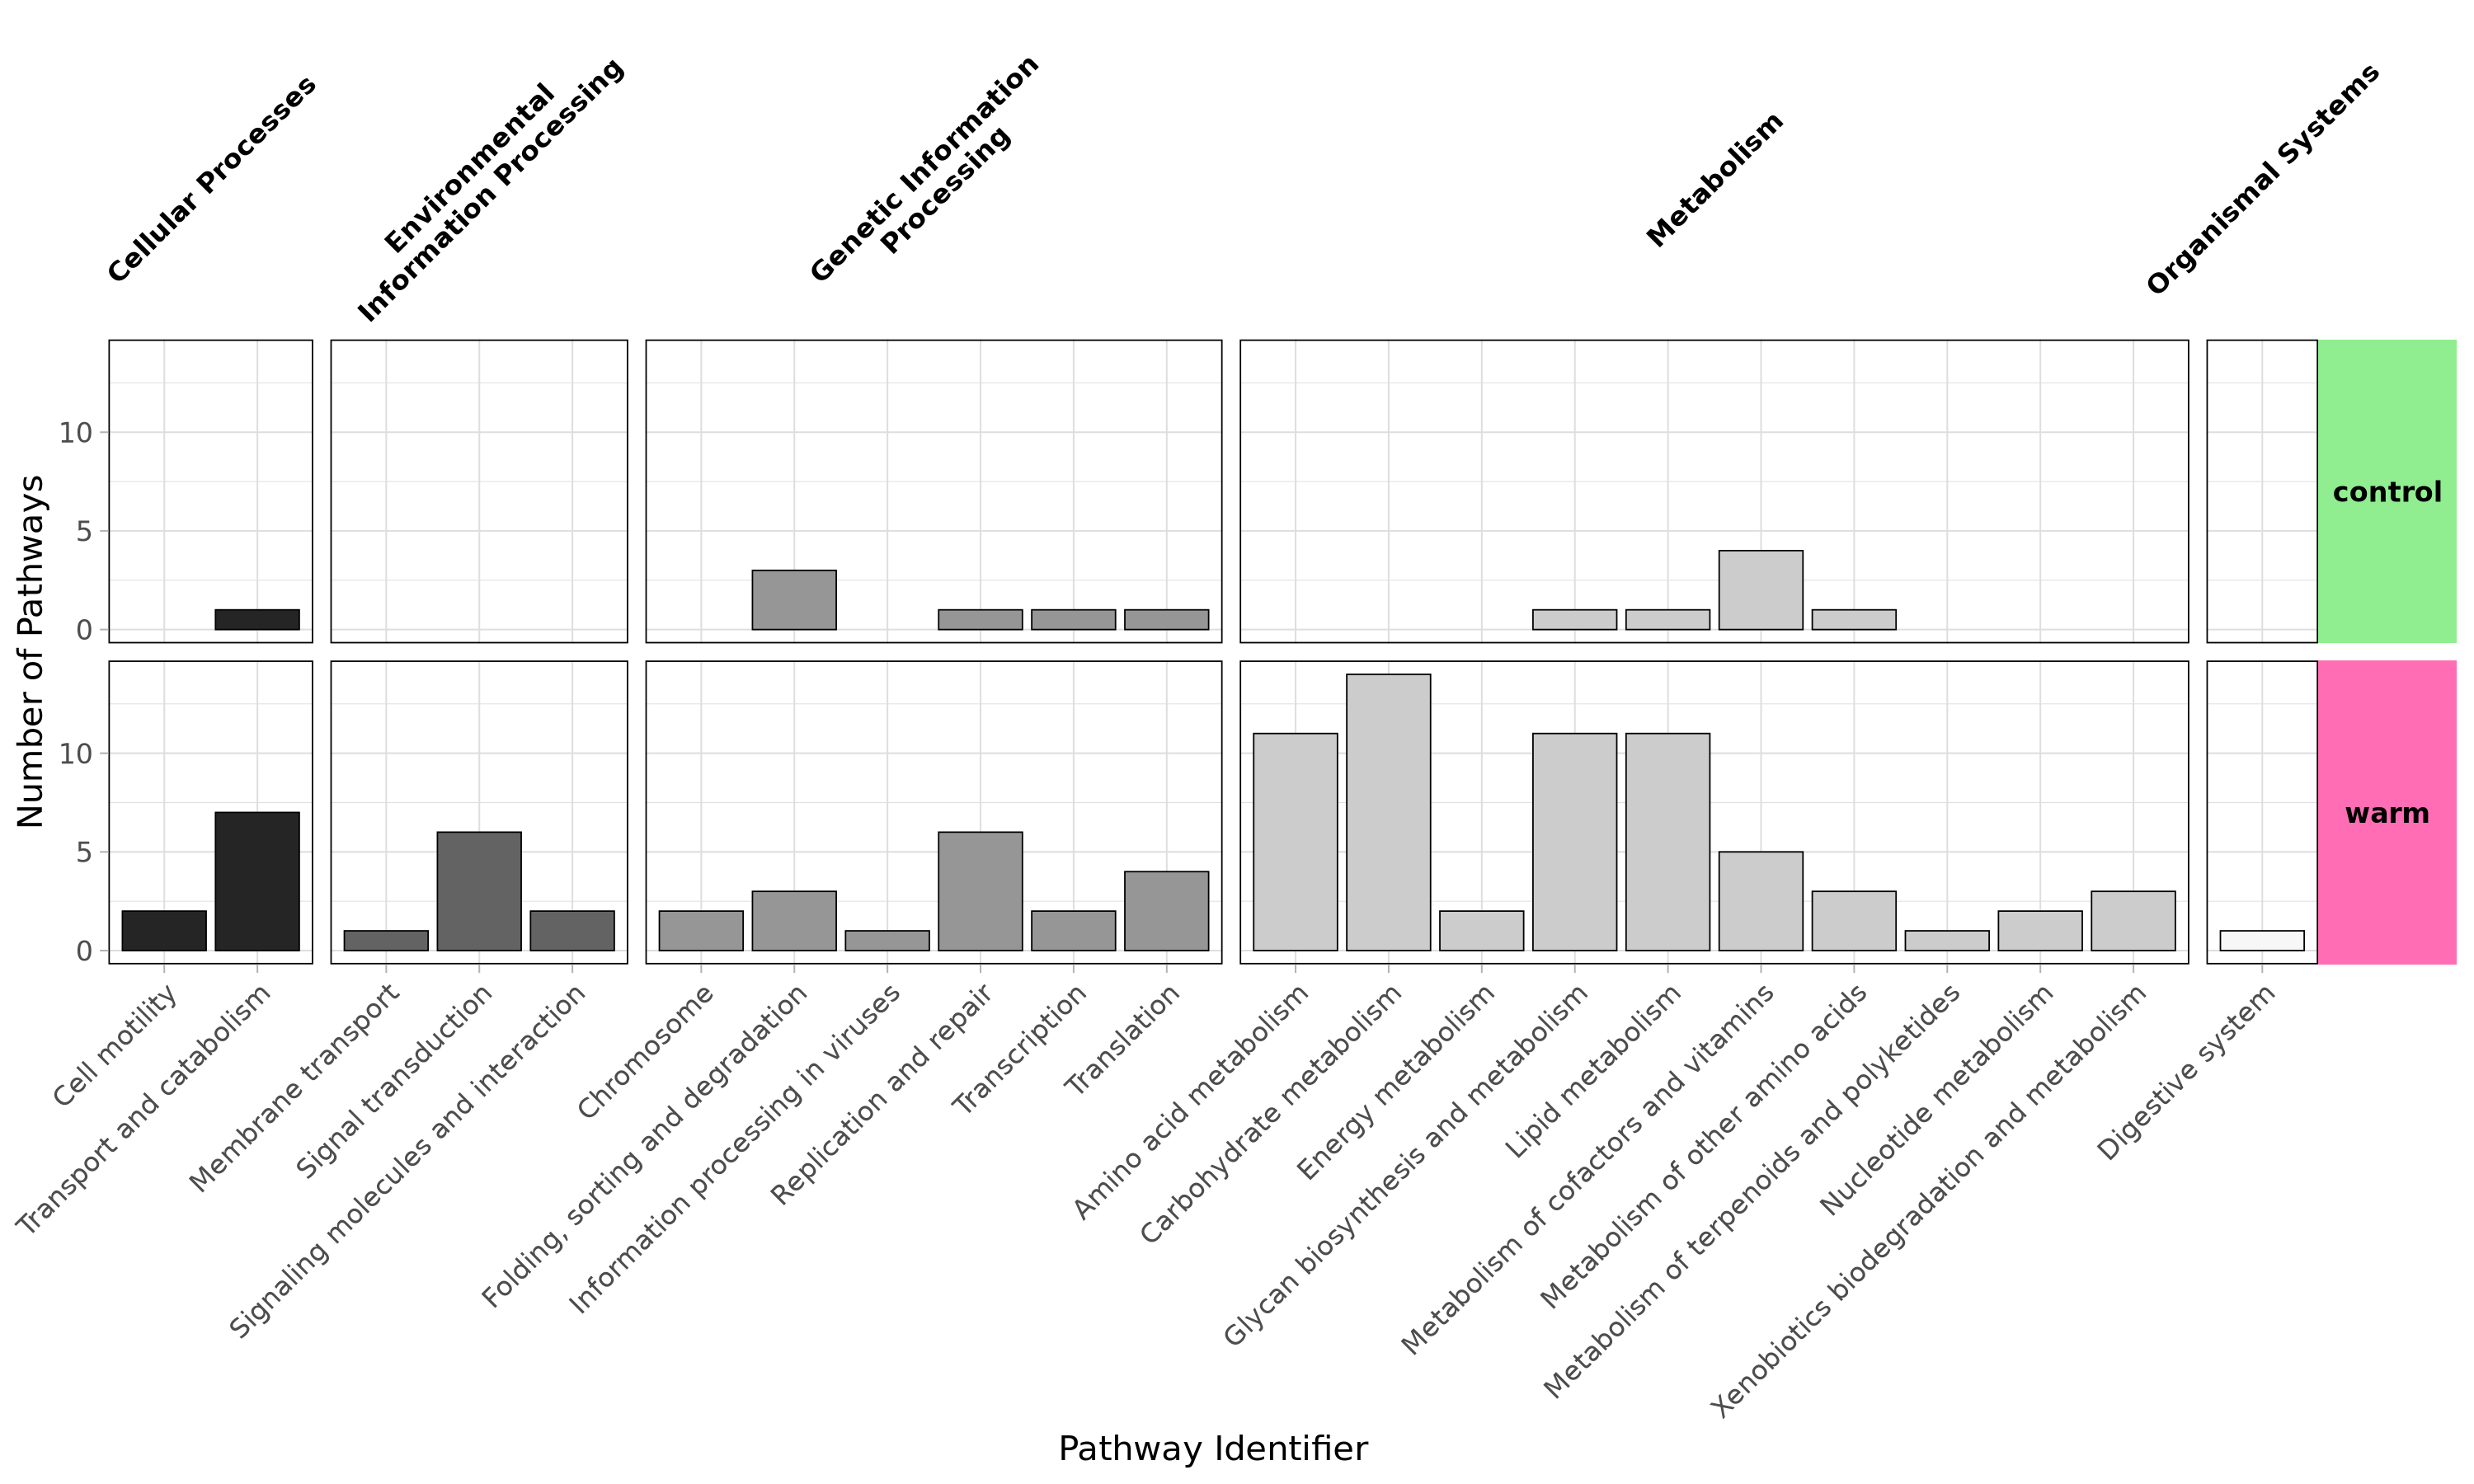

In [27]:
# horizontal, but color with gray scale

# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=25, repr.plot.height=15)

# changing color scheme

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway, col = 'black')) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_color_manual(values = c('black','black','black','black','black')) +
scale_fill_brewer(palette = 'Greys', direction=-1) +
theme(strip.text = element_text(size = 14, color = "black")) +
facet_grid2(direction~GeneralPathway, 
           scales='free_x', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           strip=strip1,
           labeller = label_wrap_gen(multi_line = TRUE)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      axis.text.x = element_text(angle = 45, hjust = 1),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(angle=45, size=20),
      plot.subtitle = element_text(hjust = 0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      strip.clip = 'off',
     strip.background = element_rect('transparent')) +
labs(y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1_wc_kegg_plot

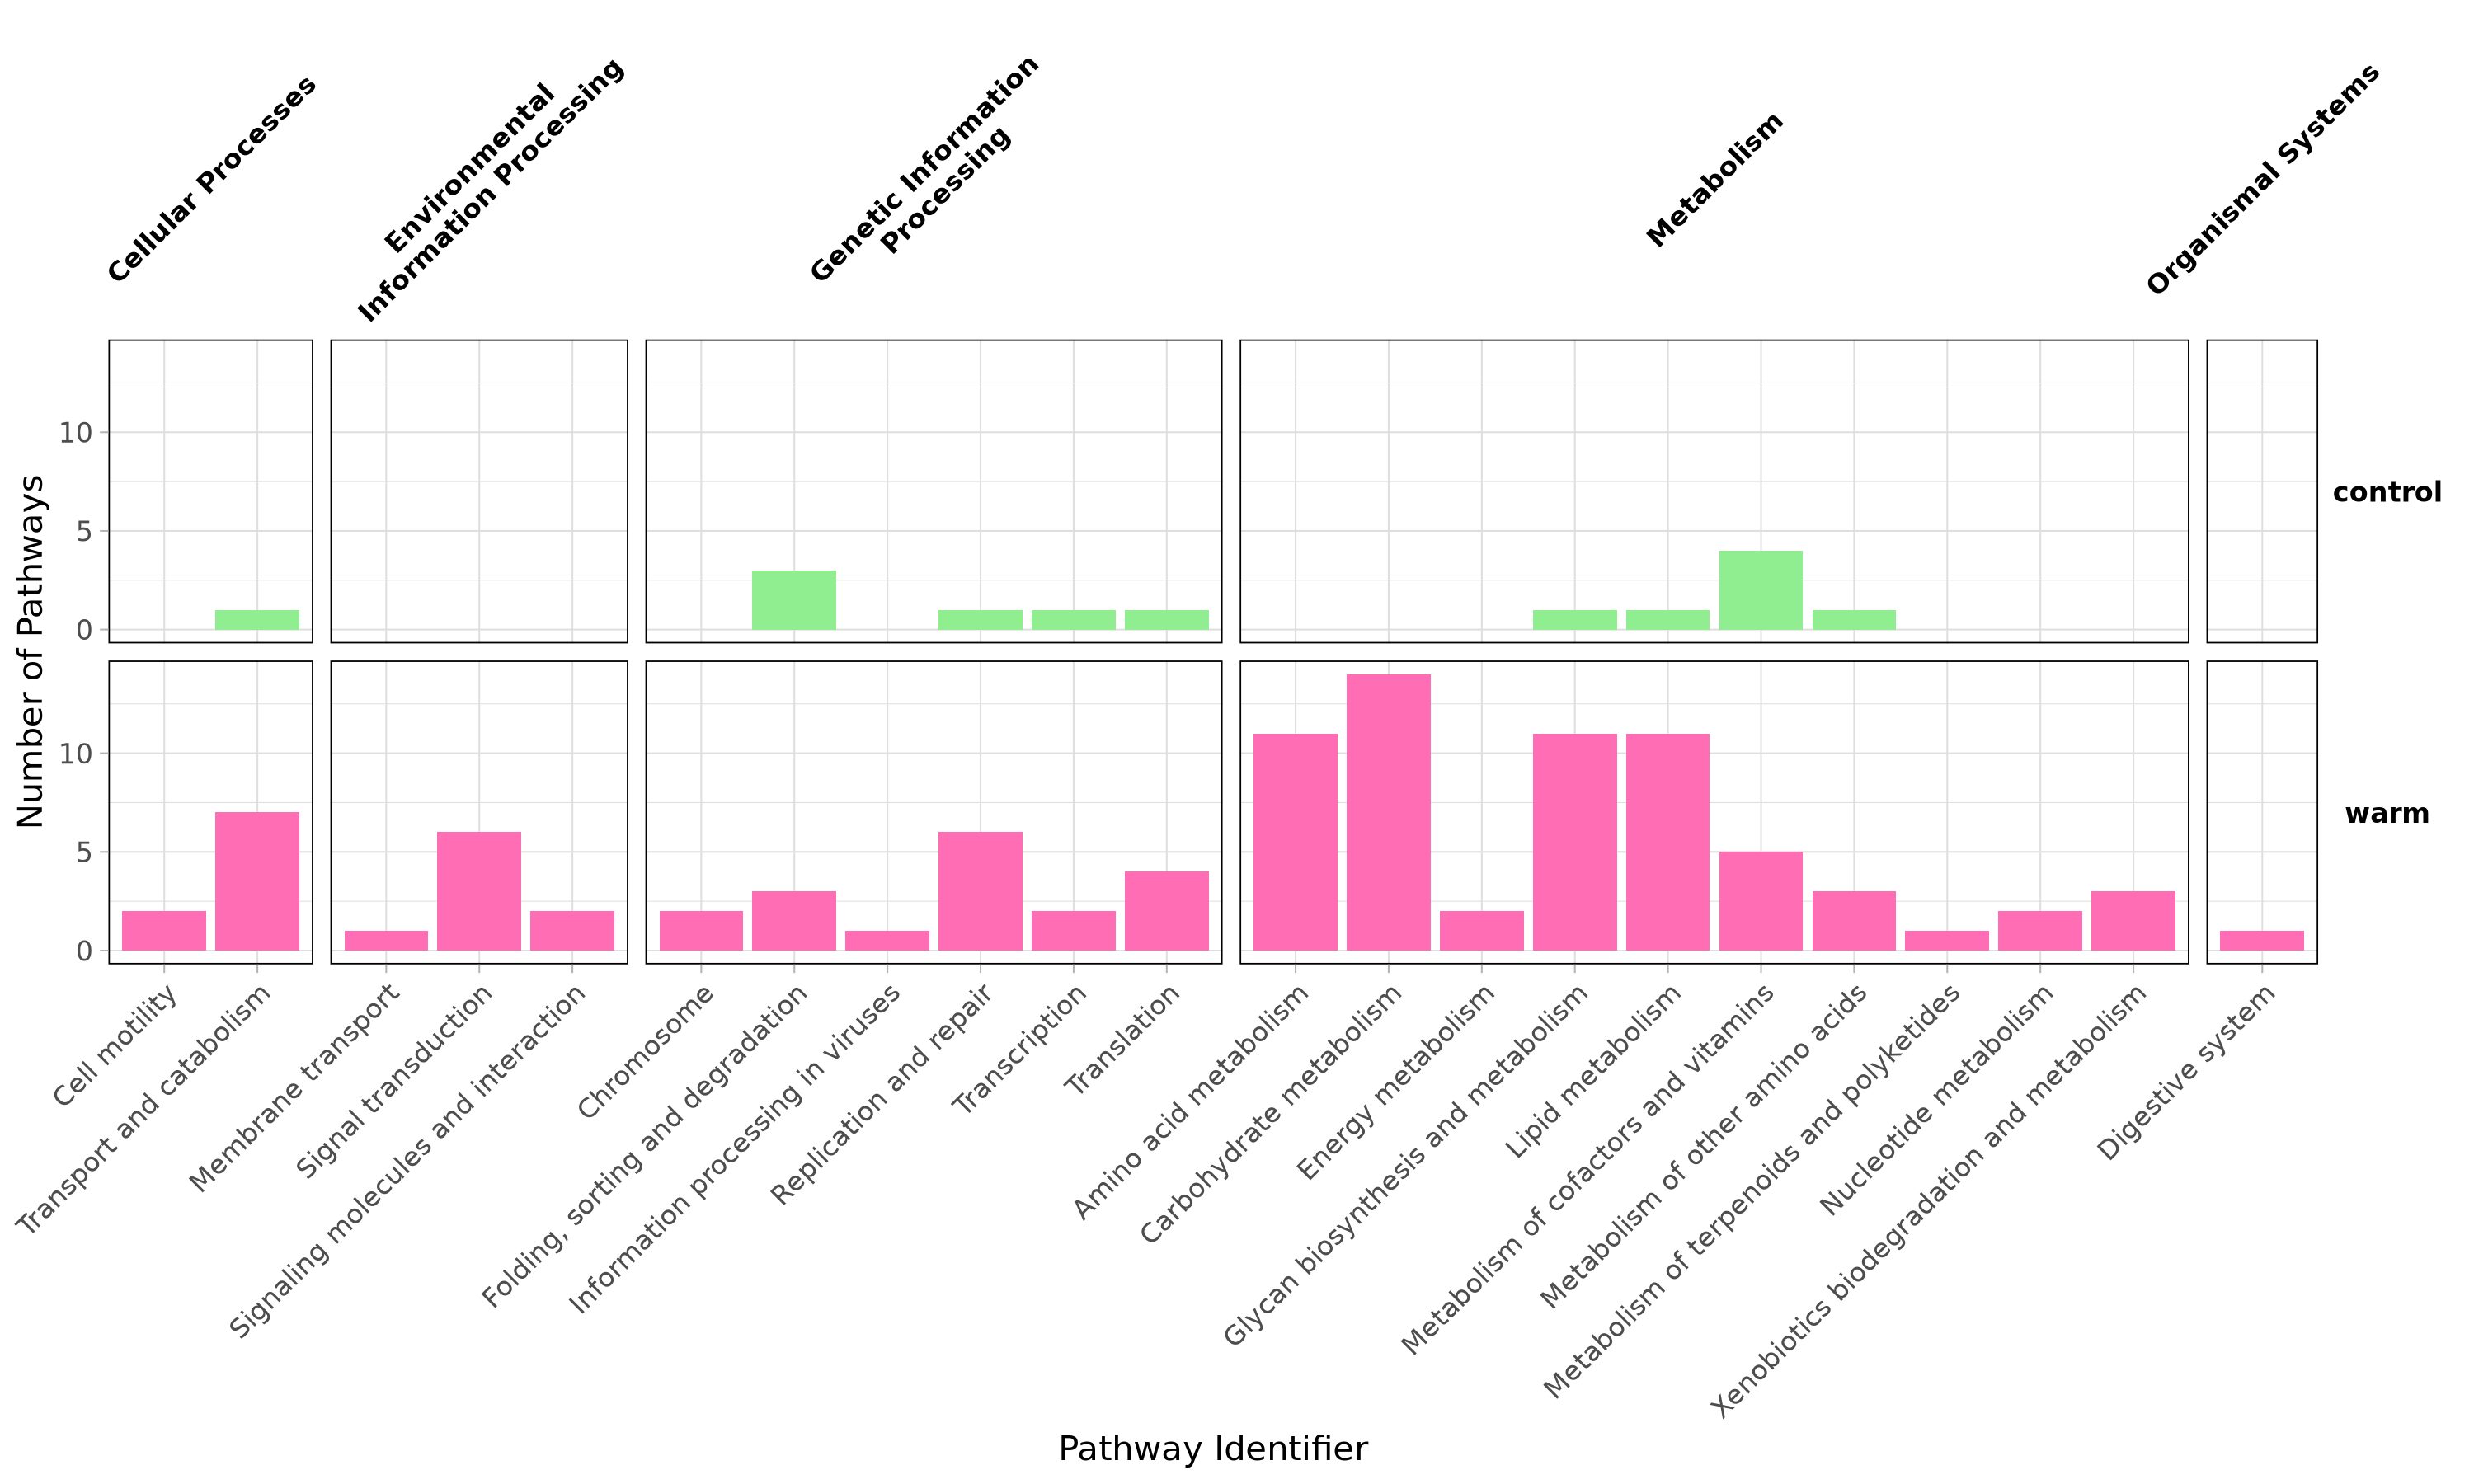

In [55]:
# horizontal, but keeping color scheme

# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=25, repr.plot.height=15)

# changing color scheme

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = direction)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_fill_manual(values = c('lightgreen', 'hotpink1')) + 
theme(strip.text = element_text(size = 14, color = "black")) +
facet_grid(direction~GeneralPathway, 
           scales='free_x', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           labeller = label_wrap_gen(multi_line = TRUE)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      axis.text.x = element_text(angle = 45, hjust = 1),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(angle=45, size=20),
      plot.subtitle = element_text(hjust = 0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      strip.clip = 'off',
     strip.background = element_rect('transparent')) +
labs(y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1_wc_kegg_plot

In [31]:
# saving plot as pdf file

# open pdf file
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures')
pdf('p1_wc_kegg_pathways_vertical.pdf', width=20, height=20)

# open plot
p1_wc_kegg_plot

# close pdf file
dev.off()

png 
  2

### How many of my genes are in each pathway?
Extracting the genes in each pathway, and seeing how many of my significant genes are in that pathway

will add these numbers to the OG dataframe to replicate bar plot above, but with total number of sig genes for the x axis (instead of number of pathways)

In [83]:
# filtering df for only genes that were significant
sig_genes <- filter(unfilter_df, unfilter_df$padj < 0.05)
dim(sig_genes) #344 total genes
head(sig_genes)

[1] 344   3

gene      lfc      padj       
1 111117672 1.314266 0.005811498
2 111128103 1.644558 0.001509994
3 111137770 2.655903 0.002201055
4 111125333 1.461069 0.017320572
5 111111295 2.360240 0.001233208
6 111125391 2.205531 0.001875643

In [84]:
id <- kk2$ID
pathways <- kk2$ID
genes <- geneInCategory(kk2)[id]

# Your significant genes
significant_genes <- sig_genes$gene

# Create an empty data frame to store the results
result_df <- data.frame(Pathway = character(), Significant_Genes_Count = numeric(), stringsAsFactors = FALSE)

# Loop through each pathway
for (pathway in pathways) {
  # Count the significant genes in the pathway
  sig_genes_count <- sum(genes[[pathway]] %in% significant_genes)
  
  # Append the result to the data frame
  result_df <- rbind(result_df, data.frame(Pathway = pathway, Significant_Genes_Count = sig_genes_count))
}

# Print the result data frame
head(result_df)

Pathway  Significant_Genes_Count
1 cvn00053 1                      
2 cvn00910 3                      
3 cvn00511 0                      
4 cvn00052 1                      
5 cvn00592 4                      
6 cvn03250 3

In [92]:
id <- kk2$ID
pathways <- kk2$ID
genes <- geneInCategory(kk2)[id]

# Your significant genes
significant_genes <- sig_genes$gene

# Create an empty data frame to store the results
result_df2 <- data.frame(Gene = character(), Pathway = character(), stringsAsFactors = FALSE)

# Loop through each gene in the significant_genes list
for (gene in significant_genes) {
  # Find the pathway(s) that contain the gene
  pathways_with_gene <- pathways[sapply(genes, function(x) gene %in% x)]
  
  # Add the gene and its corresponding pathway(s) to the result_df
  for (pathway in pathways_with_gene) {
    result_df2 <- rbind(result_df2, data.frame(Gene = gene, Pathway = pathway))
  }
}

# Print the result data frame
head(result_df2)

Gene      Pathway 
1 111117672 cvn04142
2 111137770 cvn03040
3 111111295 cvn04140
4 111111295 cvn04137
5 111116519 cvn04310
6 111137396 cvn04137

In [97]:
# Example pathway information datafram

# Merge result_df with pathway_info_df based on PathwayID
result_df_merged <- merge(result_df2, df2, by.x = "Pathway", by.y = "ID", all.x = TRUE)

# Print the merged result
result_df_merged <- na.omit(result_df_merged)
unique(result_df_merged$direction)
head(result_df_merged)


[1] "warm"

Pathway  Gene      Description                       enrichmentScore
1 cvn00010 111103451 Glycolysis / Gluconeogenesis      0.4227819      
2 cvn00020 111100625 Citrate cycle (TCA cycle)         0.4038871      
3 cvn00020 111105925 Citrate cycle (TCA cycle)         0.4038871      
4 cvn00051 111131656 Fructose and mannose metabolism   0.3367824      
5 cvn00052 111118471 Galactose metabolism              0.6484812      
6 cvn00053 111103451 Ascorbate and aldarate metabolism 0.7513381      
  GeneralPathway DetailedPathway         direction
1 Metabolism     Carbohydrate metabolism warm     
2 Metabolism     Carbohydrate metabolism warm     
3 Metabolism     Carbohydrate metabolism warm     
4 Metabolism     Carbohydrate metabolism warm     
5 Metabolism     Carbohydrate metabolism warm     
6 Metabolism     Carbohydrate metabolism warm

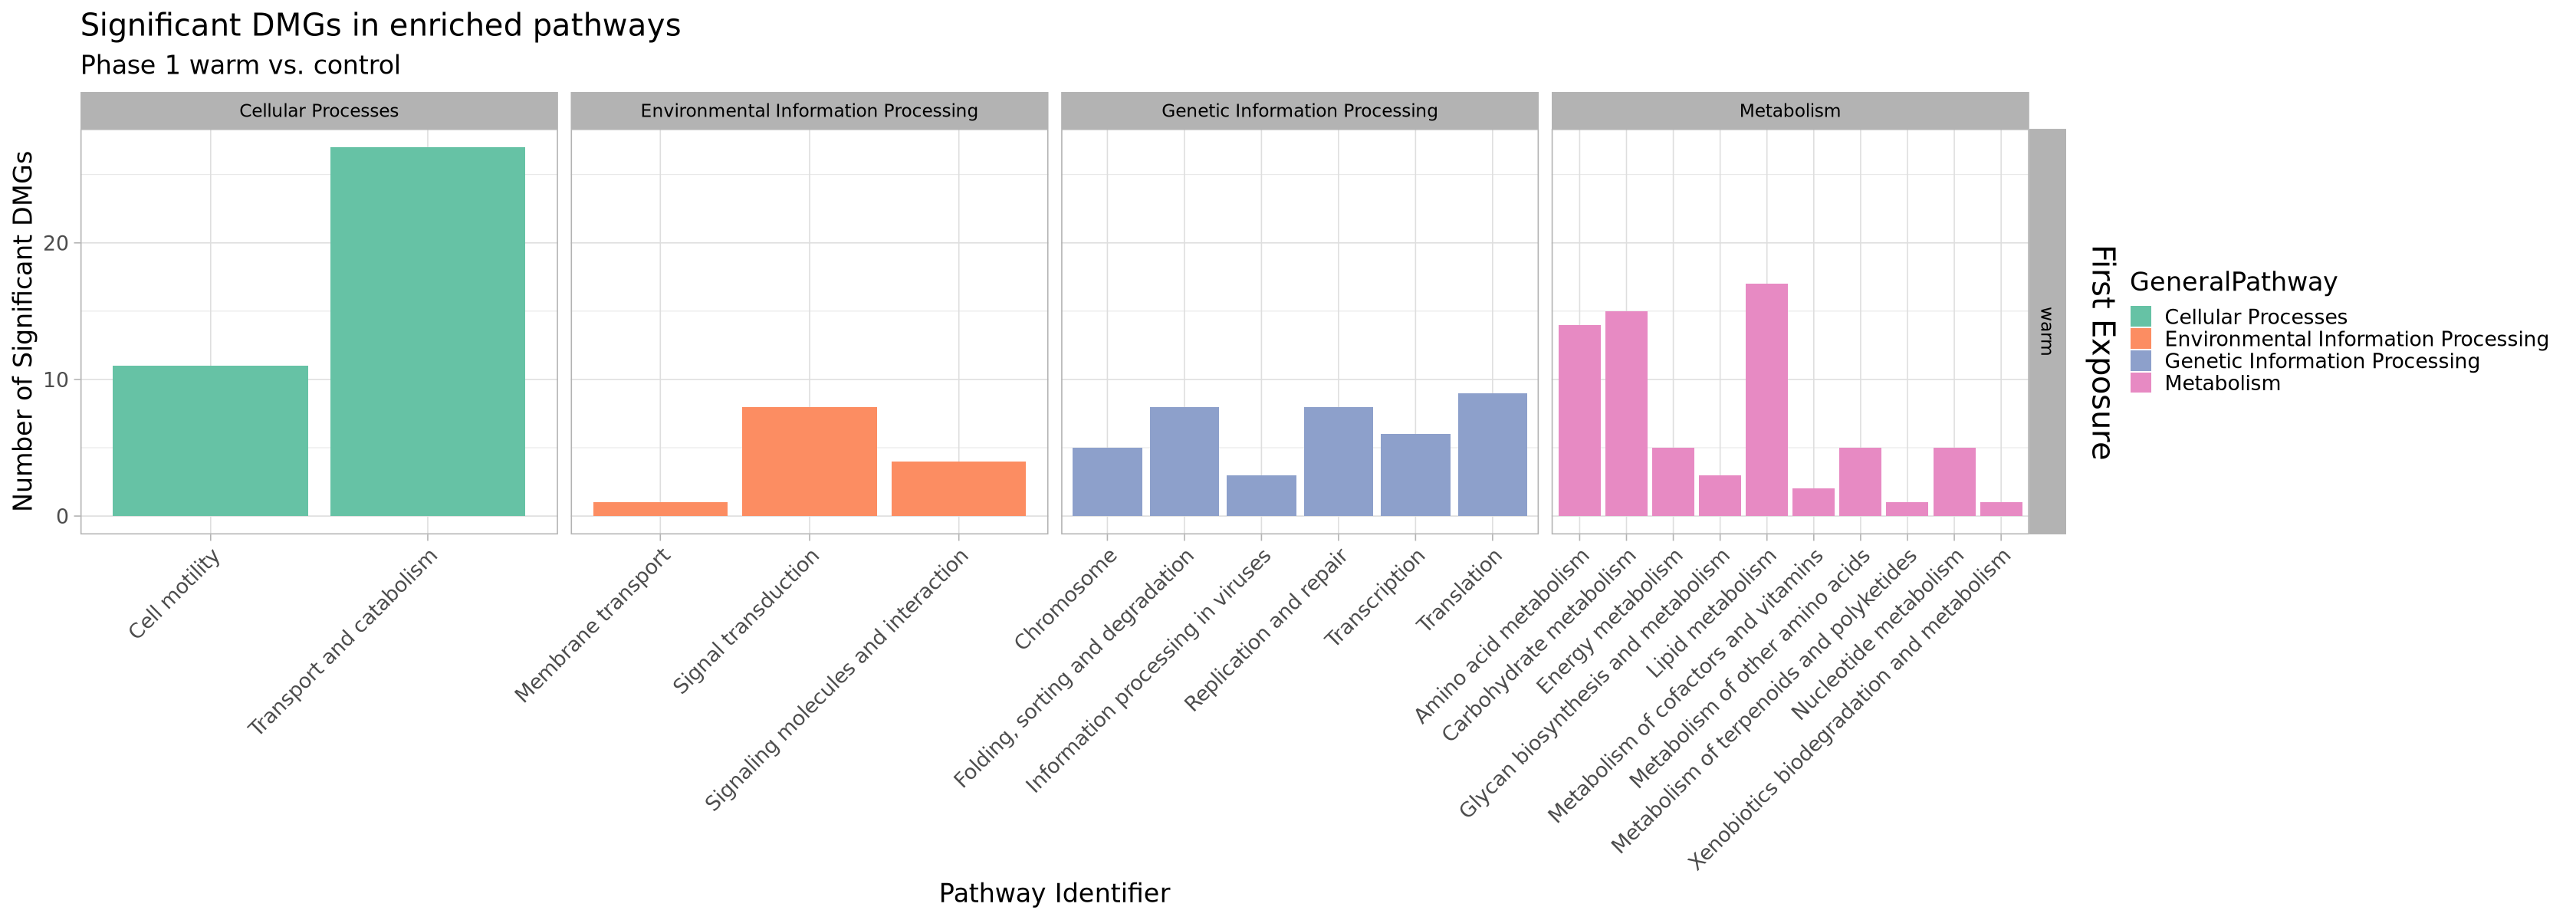

In [99]:
p1_wc_kegg_plot <- ggplot(data= result_df_merged, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar() + 
#coord_flip() +
theme_light(base_size=20) + 
theme(strip.text = element_text(size = 14, color = "black")) +
scale_fill_brewer(palette = 'Set2') +
facet_grid(direction~GeneralPathway, scales='free_x') +
theme(axis.text.x = element_text(angle = 45, hjust=1), 
      legend.box.margin=margin(l=20),
      plot.tag=element_text(angle=-90),
      plot.tag.position=c(0.82, 0.62)) +
labs(title = 'Significant DMGs in enriched pathways', subtitle = 'Phase 1 warm vs. control', y = 'Number of Significant DMGs', 
    x = 'Pathway Identifier', tag='First Exposure')

p1_wc_kegg_plot

now need to do the same thing for phase 1 hypoxic, phase 2 hypoxic or control

## unfiltered DESeq KEGG analysis - CE Phase 1 Hypoxic

looking at **phase 1 hypoxic, phase 2 hypoxic or control**

In [4]:
# load in data frame
unfiltered_p1h <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/p1h_lfc25_genes.csv')

# select only needed columns
unfilter_df <- select(unfiltered_p1h, X, log2FoldChange, padj)

# KEGG uses entrez IDs, which are my ensembl IDs without the 'LOC' in front of them, so need to convert those
unfilter_df$X <- substr(unfilter_df$X, start = 4, stop = nchar(unfilter_df$X))

# renaming columns
colnames(unfilter_df) <- c('gene', 'lfc', 'padj')

head(unfilter_df)

gene      lfc         padj
1 111120752 -0.23790209 NA  
2 111109452  0.31180570  1  
3 111124802 -0.07839417  1  
4 111101273 -0.05650996  1  
5 111101250 -0.04906065  1  
6 111101262 -0.07049632  1

In [5]:
# creating numeric vector for kegg object
kegg_gene_list <- unfilter_df$lfc
names(kegg_gene_list) <- unfilter_df$gene

# omitting anything with NA in a cell
kegg_gene_list <- na.omit(kegg_gene_list)

# sort list in descending order
kegg_gene_list = sort(kegg_gene_list, decreasing = TRUE)

# checking that things look okay
head(kegg_gene_list)
class(kegg_gene_list)

111108235 111109525 111124824 111133240 111119327 111130099 
 2.953389  2.397251  2.394202  2.304038  2.243978  2.236989

[1] "numeric"

In [6]:
kegg_organism = 'cvn'
kk2 <- gseKEGG(geneList = kegg_gene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH', #Benjamini-Hockberg FDR
               scoreType = 'std', # standard - only change for one-tailed tests
               keyType = 'kegg')

Reading KEGG annotation online: "https://rest.kegg.jp/link/cvn/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/cvn"...

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (3.66% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



In [7]:
kk2_df <- as.data.frame(kk2)
kk2_df$Description <- sub(" -.*", "", kk2_df$Description)
head(kk2_df,15)

ID       Description                              setSize
cvn00270 cvn00270 Cysteine and methionine metabolism        43    
cvn00592 cvn00592 alpha-Linolenic acid metabolism           11    
cvn03082 cvn03082 ATP-dependent chromatin remodeling        69    
cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids   18    
cvn00100 cvn00100 Steroid biosynthesis                      10    
cvn00510 cvn00510 N-Glycan biosynthesis                     33    
cvn00860 cvn00860 Porphyrin metabolism                      18    
cvn03460 cvn03460 Fanconi anemia pathway                    41    
cvn00514 cvn00514 Other types of O-glycan biosynthesis      29    
cvn04120 cvn04120 Ubiquitin mediated proteolysis           117    
cvn00260 cvn00260 Glycine, serine and threonine metabolism  35    
cvn03008 cvn03008 Ribosome biogenesis in eukaryotes         57    
cvn00190 cvn00190 Oxidative phosphorylation                 53    
cvn00591 cvn00591 Linoleic acid metabolism                  10    
cvn03060 cvn03060 Protein export                            17    
         enrichmentScore NES       pvalue      p.adjust  qvalue    rank
cvn00270  0.5220963       1.717776 0.003026136 0.3661625 0.3631363 1555
cvn00592 -0.6794618      -1.741109 0.009046136 0.4181536 0.4146978 2277
cvn03082 -0.3769411      -1.506744 0.010367445 0.4181536 0.4146978 2797
cvn01040 -0.5761533      -1.696737 0.016592268 0.5019161 0.4977680 2054
cvn00100  0.6506083       1.480972 0.053763441 0.5681397 0.5634443 1767
cvn00510 -0.4283362      -1.478479 0.061039803 0.5681397 0.5634443 3156
cvn00860  0.5385620       1.464175 0.057046980 0.5681397 0.5634443  324
cvn03460  0.4485237       1.453826 0.038226300 0.5681397 0.5634443 2809
cvn00514  0.4717735       1.436501 0.057416268 0.5681397 0.5634443 1855
cvn04120  0.3668674       1.432290 0.030278099 0.5681397 0.5634443 3046
cvn00260  0.4508406       1.413223 0.057142857 0.5681397 0.5634443 3334
cvn03008  0.4050036       1.401339 0.047619048 0.5681397 0.5634443 2295
cvn00190 -0.3612814      -1.366769 0.058417858 0.5681397 0.5634443 3012
cvn00591 -0.5755324      -1.419974 0.092342342 0.6207457 0.6156156  434
cvn03060  0.5273044       1.408205 0.084745763 0.6207457 0.6156156  248
         leading_edge                  
cvn00270 tags=30%, list=12%, signal=27%
cvn00592 tags=73%, list=17%, signal=60%
cvn03082 tags=41%, list=21%, signal=32%
cvn01040 tags=50%, list=15%, signal=42%
cvn00100 tags=30%, list=13%, signal=26%
cvn00510 tags=45%, list=24%, signal=35%
cvn00860 tags=22%, list=2%, signal=22% 
cvn03460 tags=34%, list=21%, signal=27%
cvn00514 tags=34%, list=14%, signal=30%
cvn04120 tags=34%, list=23%, signal=27%
cvn00260 tags=43%, list=25%, signal=32%
cvn03008 tags=32%, list=17%, signal=26%
cvn00190 tags=36%, list=22%, signal=28%
cvn00591 tags=40%, list=3%, signal=39% 
cvn03060 tags=24%, list=2%, signal=23% 
         core_enrichment                                                                                                                                                                                                                                                                                                                                                                                                
cvn00270 111137596/111122141/111135192/111129934/111136621/111122163/111110831/111130865/111100699/111133693/111106176/111111318/111116065                                                                                                                                                                                                                                                                              
cvn00592 111123661/111124908/111136066/111136438/111107112/111115744/111113990/111127642                                                                                                                                                                                                                                               

In [8]:
# removes extra info on description column
kk2@result$Description <- gsub(pattern = " - Crassostrea virginica (eastern oyster)", 
                                 replacement = "", kk2@result$Description, fixed = T)
head(kk2)

ID       Description                             setSize
cvn00270 cvn00270 Cysteine and methionine metabolism      43     
cvn00592 cvn00592 alpha-Linolenic acid metabolism         11     
cvn03082 cvn03082 ATP-dependent chromatin remodeling      69     
cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids 18     
cvn00100 cvn00100 Steroid biosynthesis                    10     
cvn00510 cvn00510 N-Glycan biosynthesis                   33     
         enrichmentScore NES       pvalue      p.adjust  qvalue    rank
cvn00270  0.5220963       1.717776 0.003026136 0.3661625 0.3631363 1555
cvn00592 -0.6794618      -1.741109 0.009046136 0.4181536 0.4146978 2277
cvn03082 -0.3769411      -1.506744 0.010367445 0.4181536 0.4146978 2797
cvn01040 -0.5761533      -1.696737 0.016592268 0.5019161 0.4977680 2054
cvn00100  0.6506083       1.480972 0.053763441 0.5681397 0.5634443 1767
cvn00510 -0.4283362      -1.478479 0.061039803 0.5681397 0.5634443 3156
         leading_edge                  
cvn00270 tags=30%, list=12%, signal=27%
cvn00592 tags=73%, list=17%, signal=60%
cvn03082 tags=41%, list=21%, signal=32%
cvn01040 tags=50%, list=15%, signal=42%
cvn00100 tags=30%, list=13%, signal=26%
cvn00510 tags=45%, list=24%, signal=35%
         core_enrichment                                                                                                                                                                                                                                                                        
cvn00270 111137596/111122141/111135192/111129934/111136621/111122163/111110831/111130865/111100699/111133693/111106176/111111318/111116065                                                                                                                                                      
cvn00592 111123661/111124908/111136066/111136438/111107112/111115744/111113990/111127642                                                                                                                                                                                                        
cvn03082 111120915/111120504/111136148/111135329/111132974/111118535/111130322/111119035/111099792/111114842/111105716/111134187/111123066/111128754/111130152/111125973/111118359/111108477/111129852/111128560/111120856/111120594/111127973/111127274/111114783/111128559/111105834/111133731
cvn01040 111124908/111136066/111136438/111131209/111107112/111115744/111113990/111119293/111129730                                                                                                                                                                                              
cvn00100 111134862/111134947/111112479                                                                                                                                                                                                                                                          
cvn00510 111113415/111118581/111119558/111101820/111125632/111124588/111136555/111101197/111122131/111124498/111134828/111121994/111137033/111136571/111126213

In [9]:
# saving enriched pathways info into csv file to further investigate 
write.csv(kk2, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/enriched_pathways/p1hyp_p2hc_pathways.csv')

## Connecting KEGG ID to Pathway Info
From gseKEGG and in the kk2 dataframe, we can these KEGG IDs cvn##### - these correspond to the specific KEGG pathway. KEGG has hierarchel pathways, and it's useful to know what broader pathway our pathway might belong too (metabolism? organismal systems? etc...) so from help with ChatGPT, you can have R go to the URL link with info from the KEGG ID, read the line with 'CLASS' and interpret that to form new columns including our general pathway and more detailed pathway.

I've turned the code below into markdown text - runs for a long time, so after first run you should save the data frame as a csv to be able to call it when you run this again.

**function to get pathway meta data from URL link:**


In [37]:

# generated with help of ChatGPT
# Function to get pathway names
get_pathway_names <- function(kegg_id) {
  url <- paste0("http://rest.kegg.jp/get/", kegg_id)
  response <- GET(url)
  
  if (status_code(response) == 200) {
    pathway_info <- content(response, "text", encoding = "UTF-8")
    general_pathway <- NA
    detailed_pathway <- NA
    
    # Extracting general and detailed pathways from the pathway info
    lines <- strsplit(pathway_info, "\n")[[1]]
    for (line in lines) {
      if (grepl("^CLASS", line)) {
        paths <- unlist(strsplit(line, ";"))
        general_pathway <- trimws(paths[1])
        detailed_pathway <- ifelse(length(paths) > 1, trimws(paths[2]), NA)
        break
      }
    }
    
    return(list(General_Pathway = general_pathway, Detailed_Pathway = detailed_pathway))
  } else {
    cat("Failed to retrieve information for pathway:", kegg_id, "\n")
    return(NULL)
  }
}


**adding pathway meta data to data frame**

In [38]:

# generated with help of ChatGPT
# Sample dataframe with KEGG IDs
gseKEGG_df <- select(kk2_df, ID, Description, enrichmentScore)

# Function to apply to each KEGG ID in the dataframe
pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)

# Combine pathway info into a dataframe
pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')

# Combine pathway info with original dataframe
gseKEGG_df <- cbind(gseKEGG_df, pathway_df)

# Rename columns for clarity
#colnames(gseKEGG_df) <- c("KEGG_ID", "General_Pathway", "Detailed_Pathway")

# Print the dataframe
head(as.data.frame(gseKEGG_df))


ID       Description                             enrichmentScore
cvn00270 cvn00270 Cysteine and methionine metabolism       0.5220963     
cvn00592 cvn00592 alpha-Linolenic acid metabolism         -0.6794618     
cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids -0.5761533     
cvn03082 cvn03082 ATP-dependent chromatin remodeling      -0.3769411     
cvn04120 cvn04120 Ubiquitin mediated proteolysis           0.3668674     
cvn00860 cvn00860 Porphyrin metabolism                     0.5385620     
         GeneralPathway DetailedPathway
cvn00270 CLASS   ....   Amino ac....   
cvn00592 CLASS   ....   Lipid me....   
cvn01040 CLASS   ....   Lipid me....   
cvn03082 CLASS   ....     Chromosome   
cvn04120 CLASS   ....   Folding,....   
cvn00860 CLASS   ....   Metaboli....

now need to **clean up data frame**

In [39]:

df <- as.data.frame(gseKEGG_df)
# cleaning up GeneralPathway column to only include the pathway name and not CLASS
column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column

# also changing DetailedPathway into character instead of list to be able to write csv
df$DetailedPathway <- as.character(df$DetailedPathway)

head(df)


ID       Description                             enrichmentScore
cvn00270 cvn00270 Cysteine and methionine metabolism       0.5220963     
cvn00592 cvn00592 alpha-Linolenic acid metabolism         -0.6794618     
cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids -0.5761533     
cvn03082 cvn03082 ATP-dependent chromatin remodeling      -0.3769411     
cvn04120 cvn04120 Ubiquitin mediated proteolysis           0.3668674     
cvn00860 cvn00860 Porphyrin metabolism                     0.5385620     
         GeneralPathway                 DetailedPathway                     
cvn00270 Metabolism                     Amino acid metabolism               
cvn00592 Metabolism                     Lipid metabolism                    
cvn01040 Metabolism                     Lipid metabolism                    
cvn03082 Genetic Information Processing Chromosome                          
cvn04120 Genetic Information Processing Folding, sorting and degradation    
cvn00860 Metabolism                     Metabolism of cofactors and vitamins

In [40]:

# write csv file
write.csv(df, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/lfc_kegg_pathways/p1h_ce_kegg_pathway.csv')


In [30]:
# after running above code once, can just call df from csv file
df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/enriched_pathways/p1h_ce_kegg_pathway.csv')

### ggplot of pathways
With this information/meta data on the pathways, I want to do some analysis and try to generate some barplots/histograms

In [31]:
# taking out NAs
df2 <- filter(df, df$GeneralPathway!='NA')

In [32]:
options(repr.plot.width=20, repr.plot.height=10)

just plotting the data to check it out first

want to get the same general pathway bars next to each other 

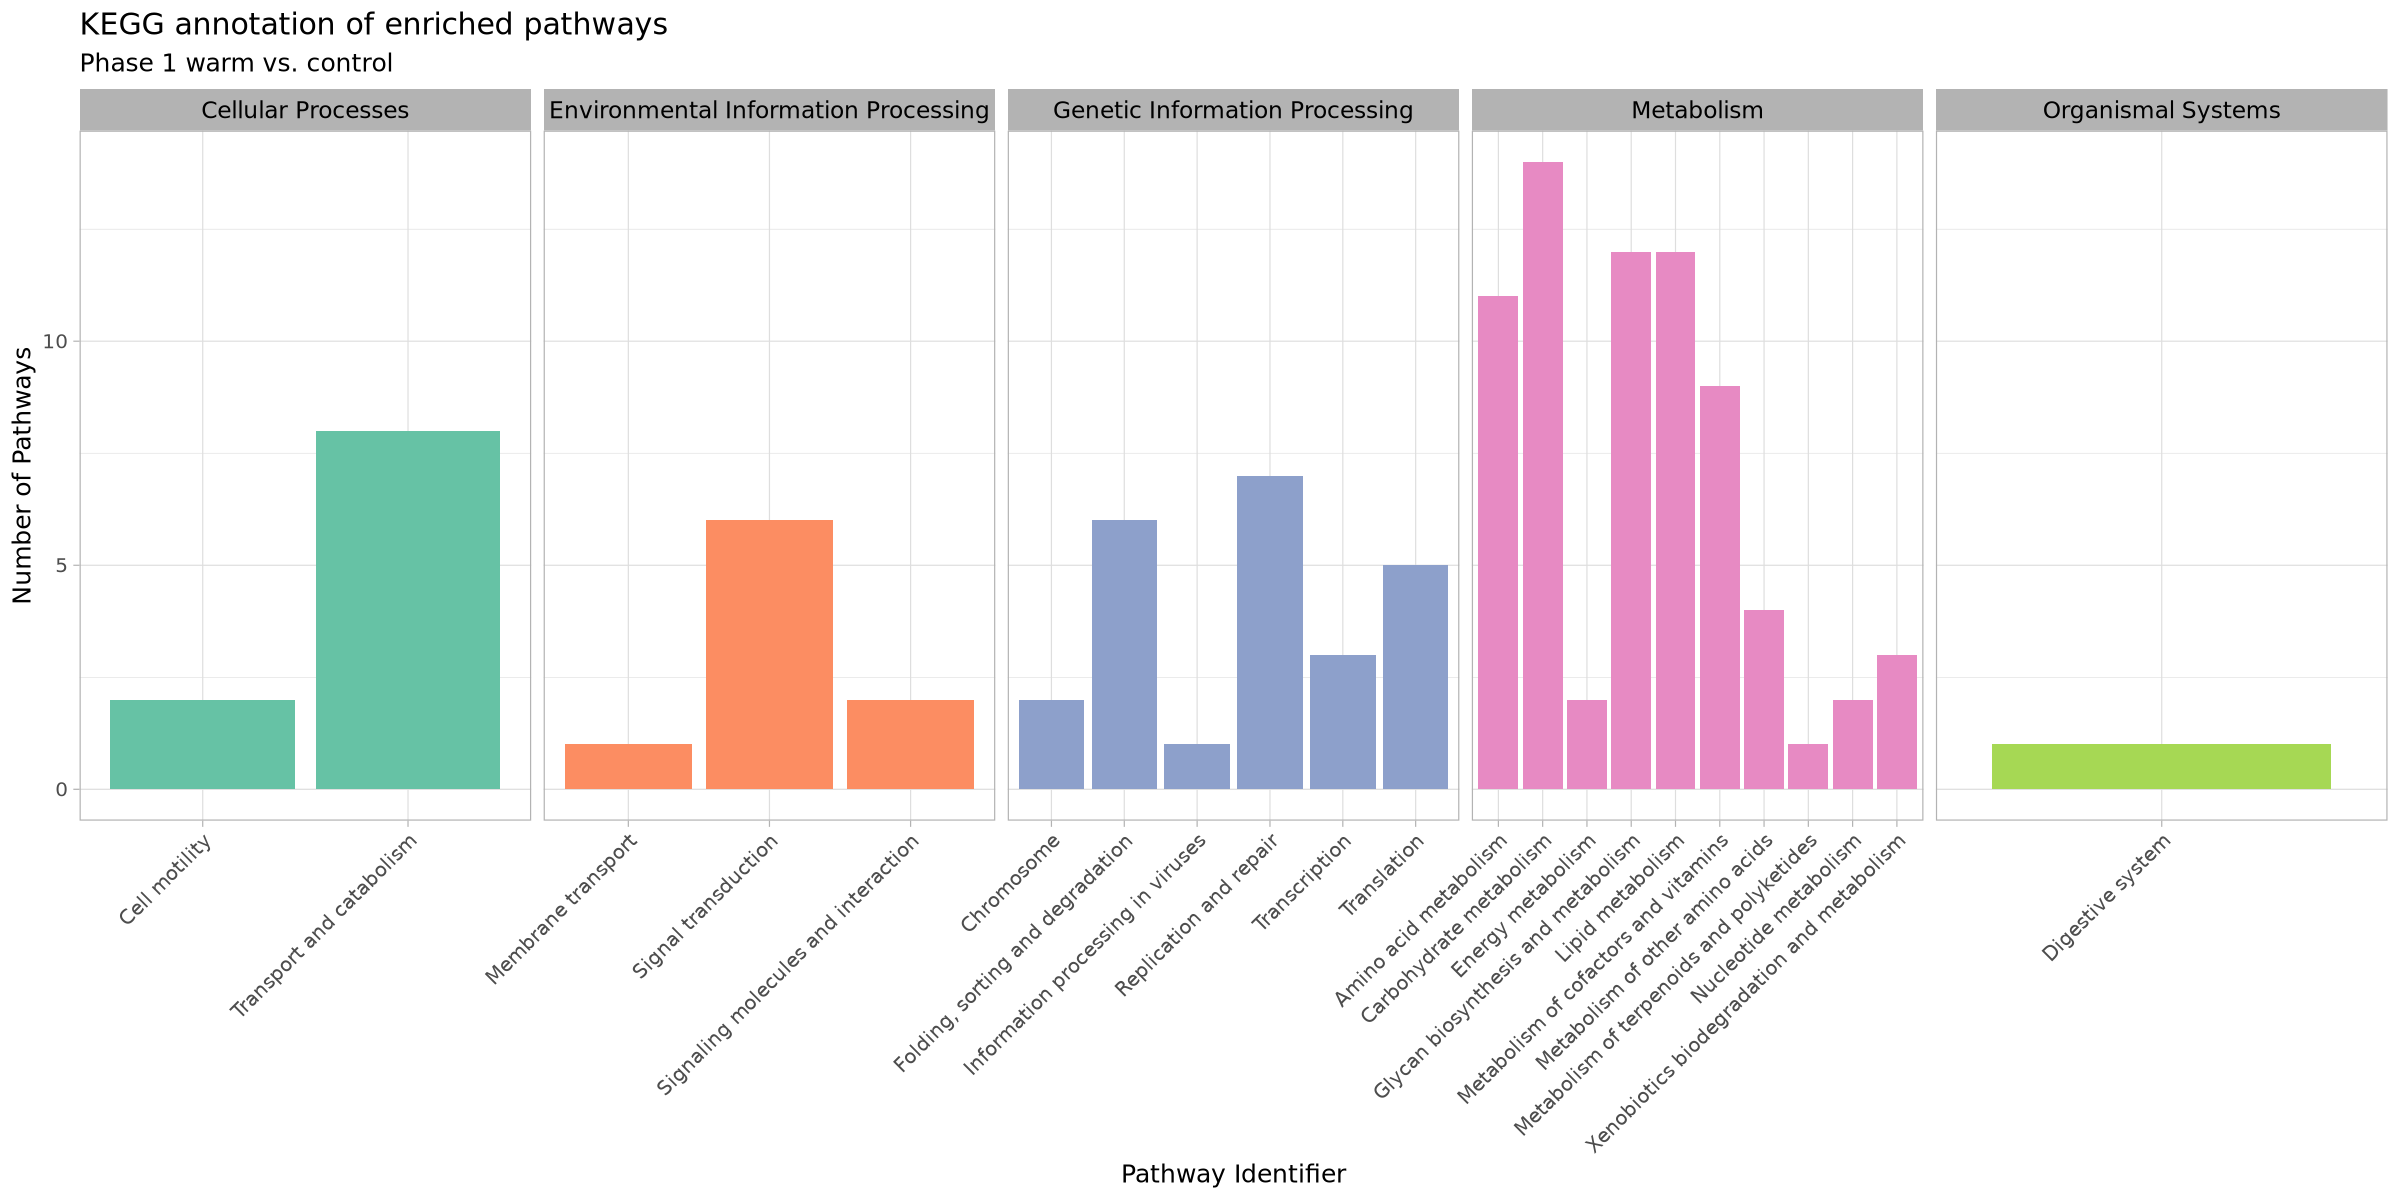

In [45]:
ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=15) + 
theme(strip.text = element_text(size = 14, color = "black")) +
scale_fill_brewer(palette = 'Set2') +
facet_grid(~GeneralPathway, scales='free') +
theme(axis.text.x = element_text(angle = 45, hjust=1)) +
labs(title = 'KEGG annotation of enriched pathways', subtitle = 'Phase 1 warm vs. control', y = 'Number of Pathways', 
    x = 'Pathway Identifier')

now want to add directionality... the above plot has both warm and control pathways put together, so want to separate those out

In [34]:
# making sure R see enrichment score as a number
df2$enrichmentScore <- as.numeric(df2$enrichmentScore)

# assigning the enriched pathway to a phase based on the enrichment score
df2$direction <- ifelse(df2$enrichmentScore<0, "control", #neg ES = pathway for control
        ifelse(df2$enrichmentScore>0, "hypoxic", # pos ES = pathway for warm
        "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(df2)

X        ID       Description                             enrichmentScore
1 cvn00270 cvn00270 Cysteine and methionine metabolism       0.5220963     
2 cvn00592 cvn00592 alpha-Linolenic acid metabolism         -0.6794618     
3 cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids -0.5761533     
4 cvn03082 cvn03082 ATP-dependent chromatin remodeling      -0.3769411     
5 cvn04120 cvn04120 Ubiquitin mediated proteolysis           0.3668674     
6 cvn00860 cvn00860 Porphyrin metabolism                     0.5385620     
  GeneralPathway                 DetailedPathway                      direction
1 Metabolism                     Amino acid metabolism                hypoxic  
2 Metabolism                     Lipid metabolism                     control  
3 Metabolism                     Lipid metabolism                     control  
4 Genetic Information Processing Chromosome                           control  
5 Genetic Information Processing Folding, sorting and degradation     hypoxic  
6 Metabolism                     Metabolism of cofactors and vitamins hypoxic

creating another ggplot, but this time adding phase variable to the facet grid so we can see what pathways were methylated for each phase

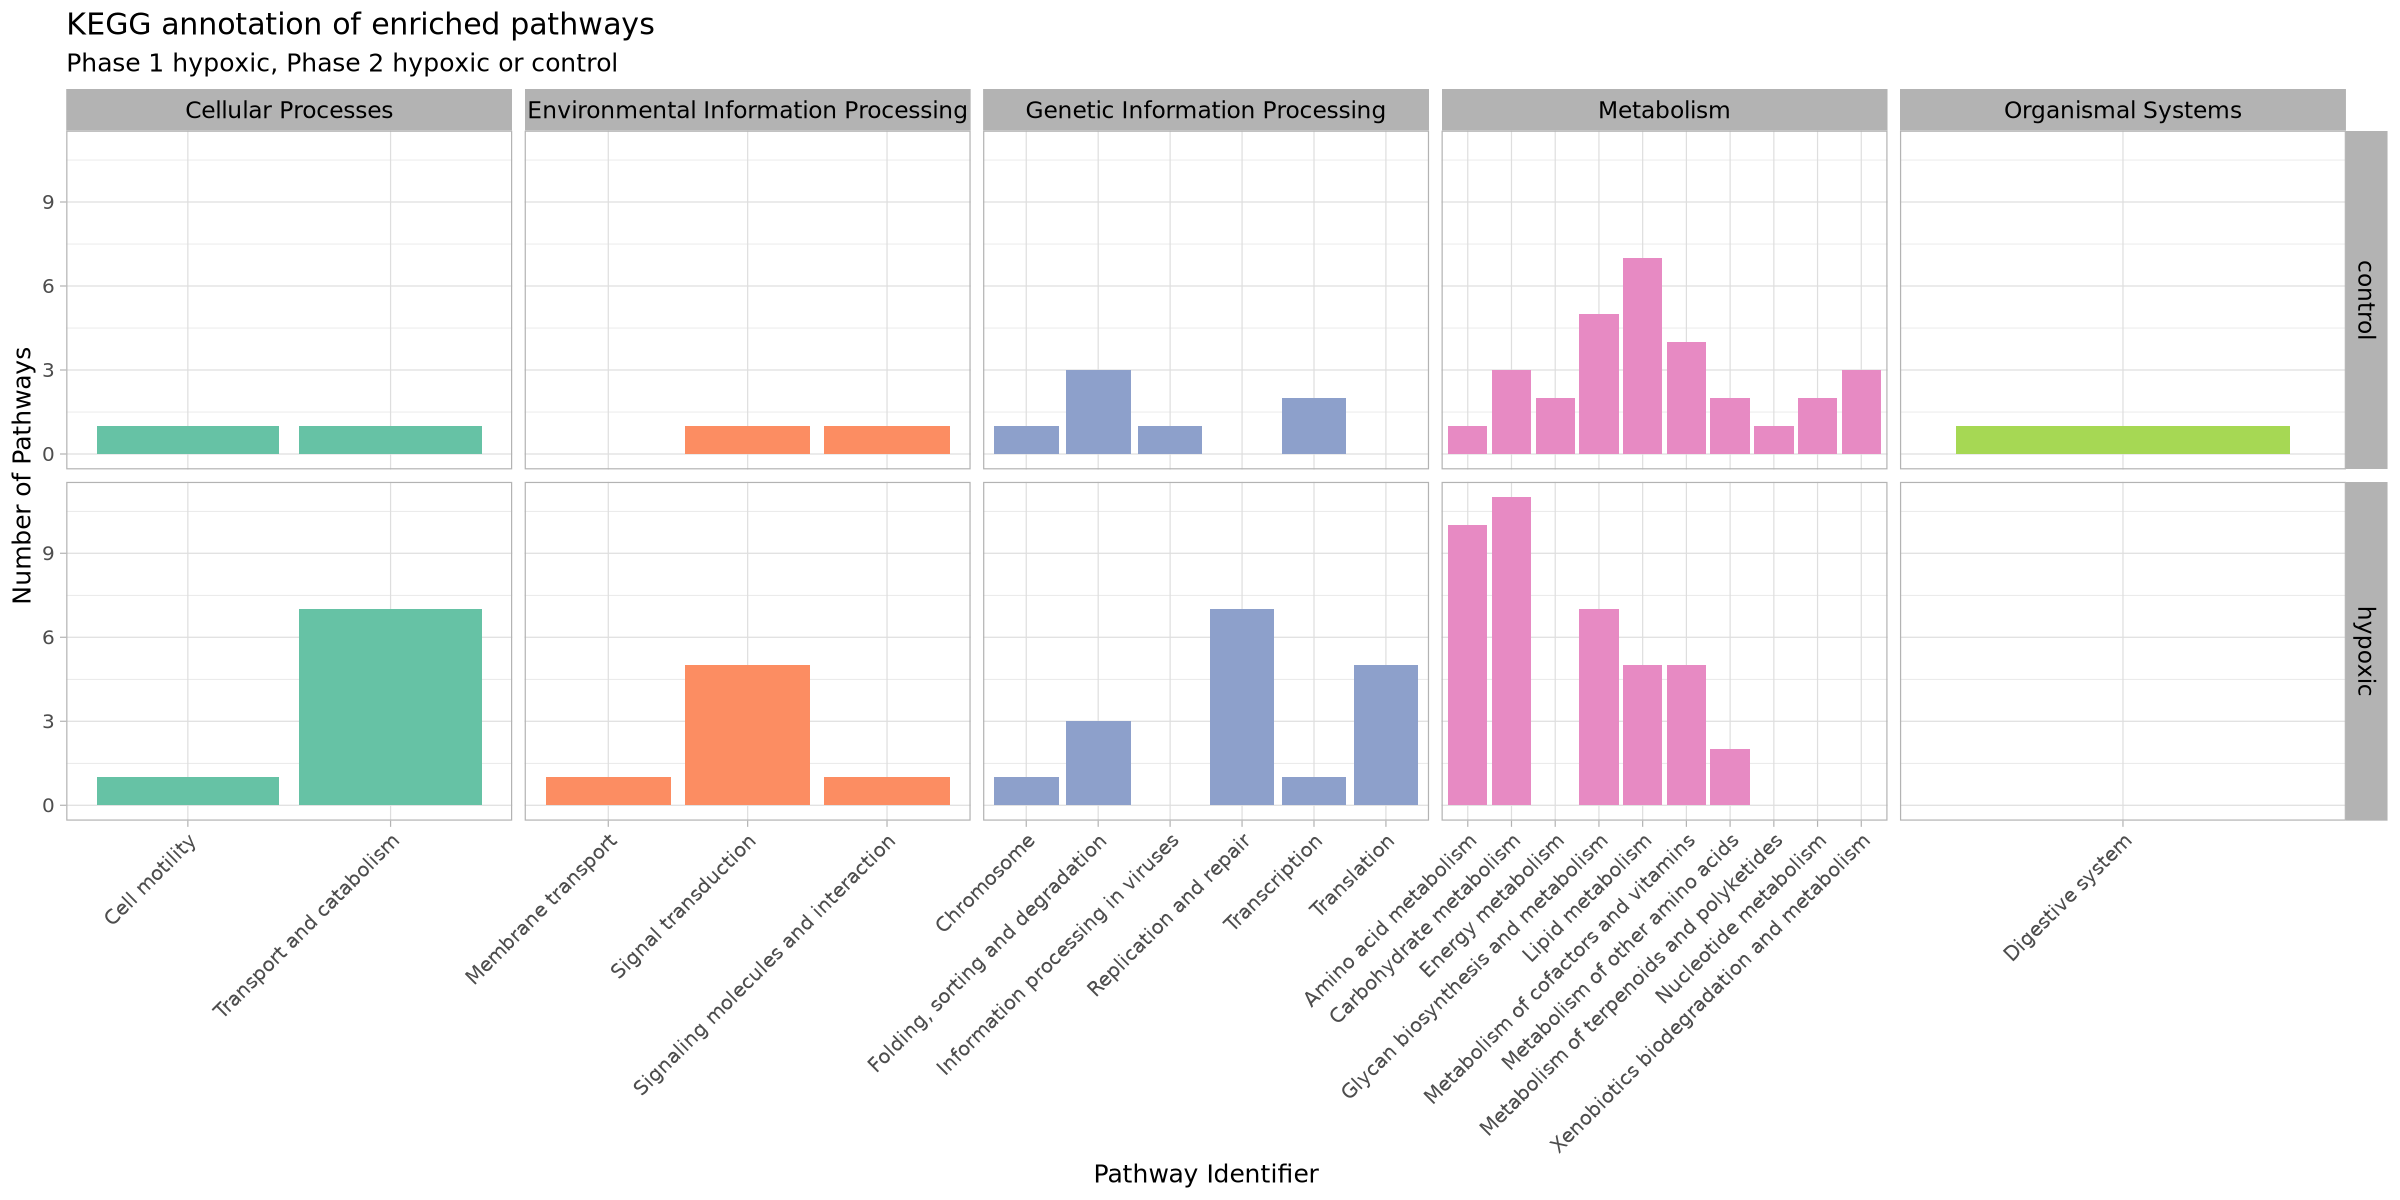

In [35]:
p1h_ce_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=15) + 
theme(strip.text = element_text(size = 14, color = "black")) +
scale_fill_brewer(palette = 'Set2') +
facet_grid(direction~GeneralPathway, scales='free_x') +
theme(axis.text.x = element_text(angle = 45, hjust=1)) +
labs(title = 'KEGG annotation of enriched pathways', subtitle = 'Phase 1 hypoxic, Phase 2 hypoxic or control', y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1h_ce_kegg_plot

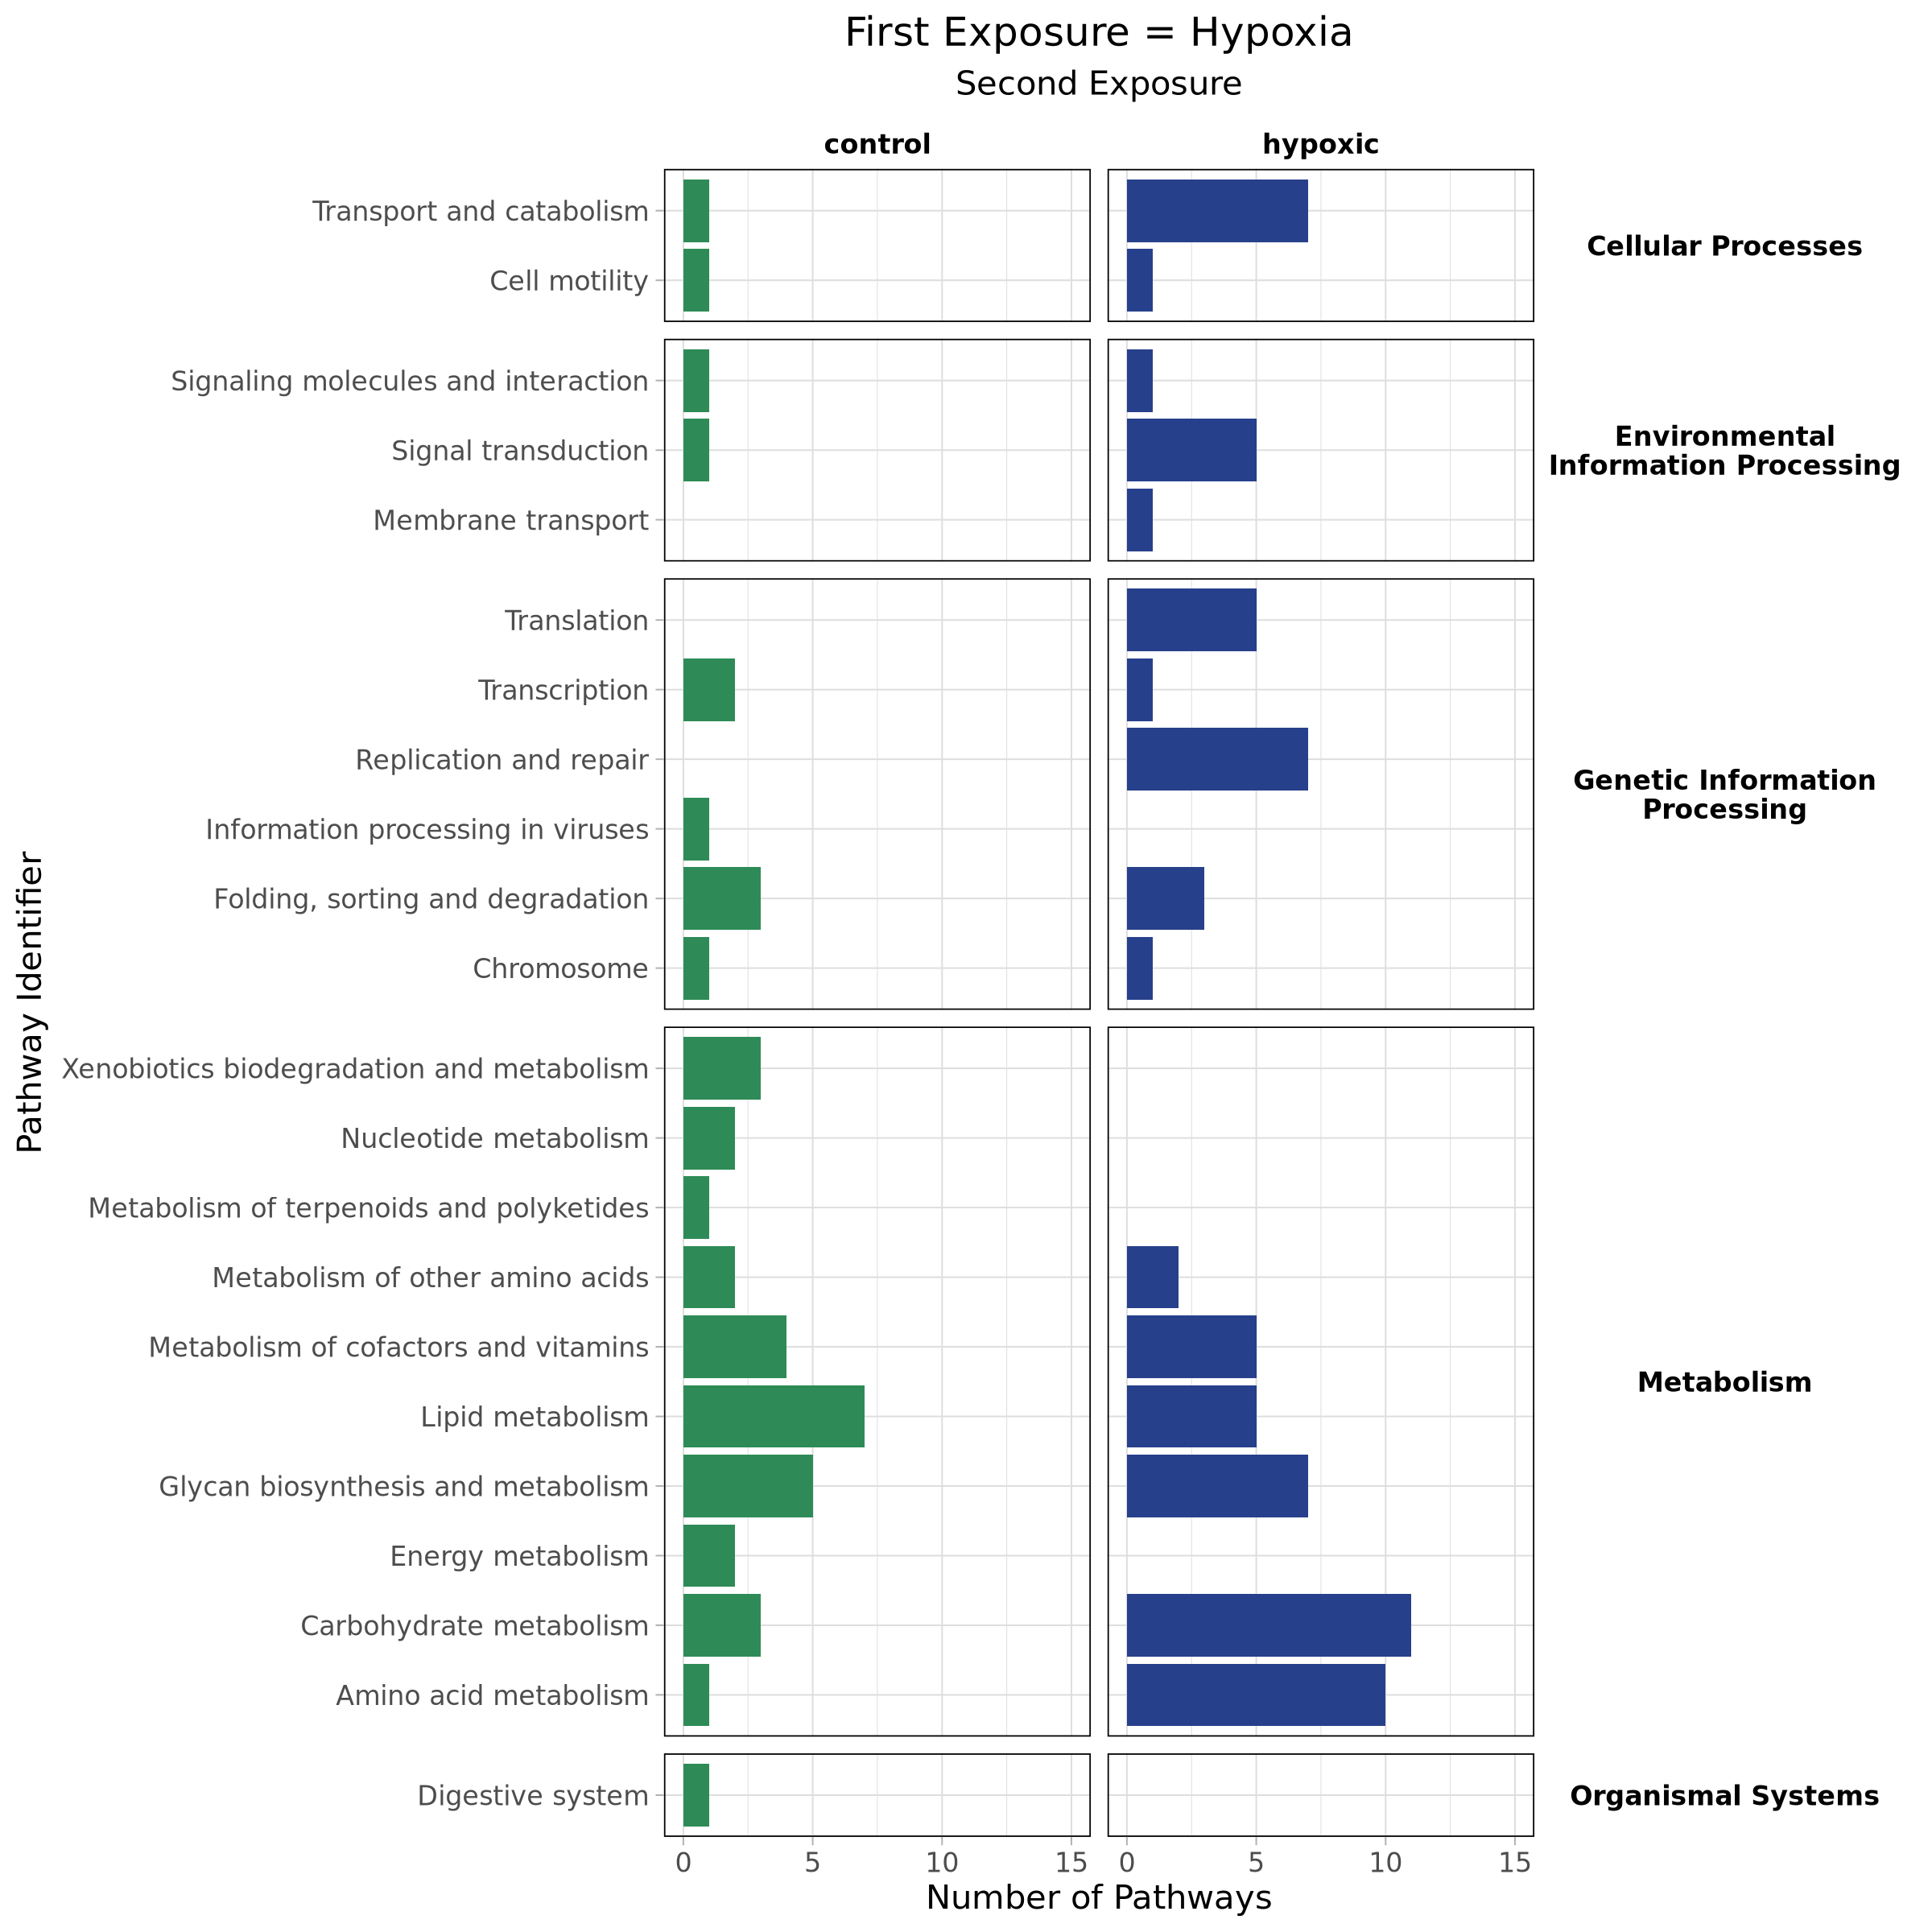

In [36]:
# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=20, repr.plot.height=20)

# changing color scheme

p1h_ce_kegg_plot <- ggplot(data= df2, aes(y = DetailedPathway, fill = direction)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_fill_manual(values = c('seagreen4', 'royalblue4')) + 
theme(strip.text = element_text(size = 14, color = "black")) +
facet_grid(GeneralPathway~direction, 
           scales='free_y', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           labeller = label_wrap_gen(multi_line = TRUE)) +
scale_x_continuous(limits = c(0,15)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(size=20),
      plot.subtitle = element_text(hjust = 0.5),
      plot.title = element_text(hjust=0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
     strip.background = element_rect('transparent')) +
labs(subtitle = 'Second Exposure', x = 'Number of Pathways', title = 'First Exposure = Hypoxia', 
    y = 'Pathway Identifier')

p1h_ce_kegg_plot

In [37]:
strip1 <- strip_themed(background_y = elem_list_rect(fill = c("seagreen4",'royalblue4')), clip='off')

strip2 <- strip_themed(by_layer_x=TRUE, clip='off')

In [38]:
# bc all had a first exposure of hypoxia here
df2$exposure <- 'Second Exposure'
head(df2)

X        ID       Description                             enrichmentScore
1 cvn00270 cvn00270 Cysteine and methionine metabolism       0.5220963     
2 cvn00592 cvn00592 alpha-Linolenic acid metabolism         -0.6794618     
3 cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids -0.5761533     
4 cvn03082 cvn03082 ATP-dependent chromatin remodeling      -0.3769411     
5 cvn04120 cvn04120 Ubiquitin mediated proteolysis           0.3668674     
6 cvn00860 cvn00860 Porphyrin metabolism                     0.5385620     
  GeneralPathway                 DetailedPathway                      direction
1 Metabolism                     Amino acid metabolism                hypoxic  
2 Metabolism                     Lipid metabolism                     control  
3 Metabolism                     Lipid metabolism                     control  
4 Genetic Information Processing Chromosome                           control  
5 Genetic Information Processing Folding, sorting and degradation     hypoxic  
6 Metabolism                     Metabolism of cofactors and vitamins hypoxic  
  exposure       
1 Second Exposure
2 Second Exposure
3 Second Exposure
4 Second Exposure
5 Second Exposure
6 Second Exposure

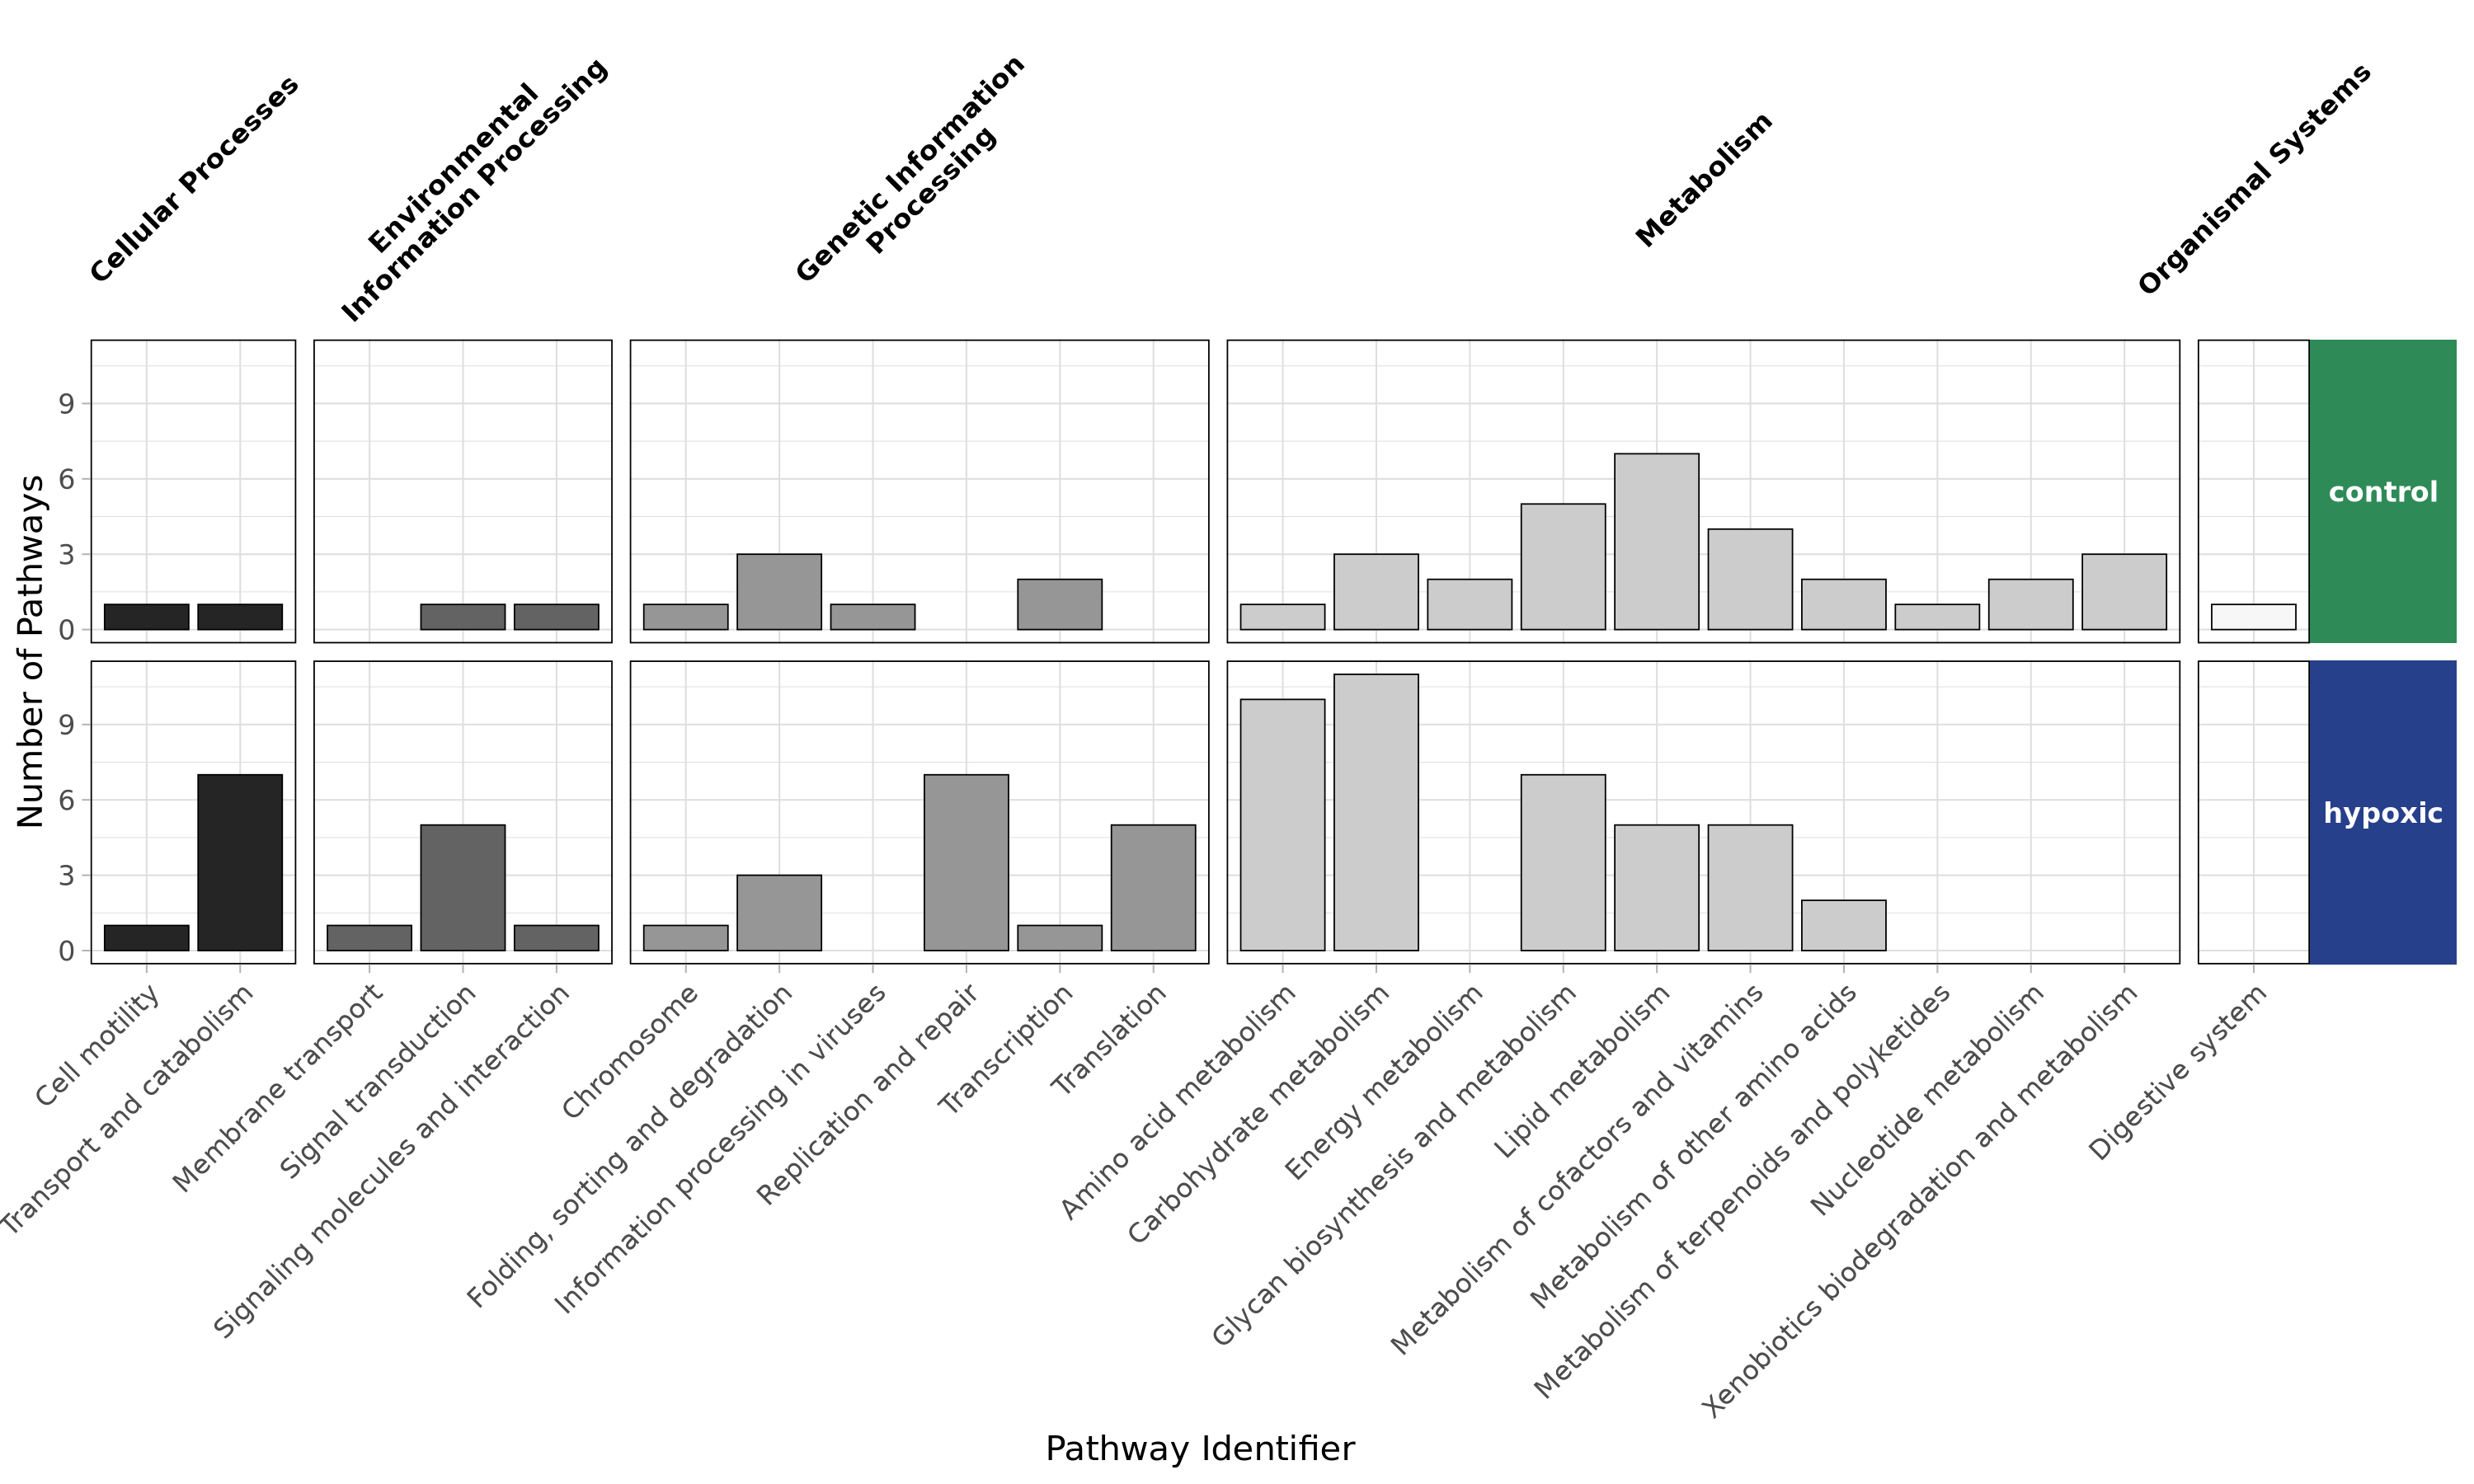

In [43]:
# horizontal, but color with gray scale

# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=25, repr.plot.height=15)

# changing color scheme

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway, col = 'black')) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_color_manual(values = c('black','black','black','black','black')) +
scale_fill_brewer(palette = 'Greys', direction=-1) +
theme(strip.text = element_text(size = 14),
      strip.text.x = element_text(color = 'black'),
     strip.text.y = element_text(color = 'white')) +
facet_grid2(direction~GeneralPathway, 
           scales='free_x', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           strip=strip1,
           labeller = label_wrap_gen(multi_line = TRUE)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      axis.text.x = element_text(angle = 45, hjust = 1),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(angle=45, size=20),
      plot.subtitle = element_text(hjust = 0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      strip.clip = 'off',
     strip.background = element_rect('transparent')) +
labs(y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1_wc_kegg_plot

In [67]:
# saving plot as pdf file

# open pdf file
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures')
pdf('p1h_ce_kegg_pathways.pdf', width=20, height=10)

# open plot
p1h_ce_kegg_plot

# close pdf file
dev.off()

png 
  2

## unfiltered DESeq KEGG analysis - all oysters phase 2 = control
still looking at significantly differentially methylated genes for phase 1 warm vs. control, but now genes get assigned NA for adjusted p-values *only* when the gene has low counts (so this now includes outliers, instead of assigning outliers NA), therefore, different genes will be kept in the analysis for enriched pathways

looking at **phase 1 hypoxic or control, phase 2 control**

In [11]:
# load in data frame
unfiltered_p2c <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/p2c_lfc25_genes.csv')

# select only needed columns
unfilter_df <- select(unfiltered_p2c, X, log2FoldChange, padj)

# KEGG uses entrez IDs, which are my ensembl IDs without the 'LOC' in front of them, so need to convert those
unfilter_df$X <- substr(unfilter_df$X, start = 4, stop = nchar(unfilter_df$X))

# renaming columns
colnames(unfilter_df) <- c('gene', 'lfc', 'padj')

head(unfilter_df)

gene      lfc         padj
1 111120752 -0.04714912 NA  
2 111109452 -0.11801920 NA  
3 111124802  0.08476869  1  
4 111101273 -0.19260342  1  
5 111101250 -0.10155347  1  
6 111101262  0.16866172  1

In [12]:
# creating numeric vector for kegg object
kegg_gene_list <- unfilter_df$lfc
names(kegg_gene_list) <- unfilter_df$gene

# omitting anything with NA in a cell
kegg_gene_list <- na.omit(kegg_gene_list)

# sort list in descending order
kegg_gene_list = sort(kegg_gene_list, decreasing = TRUE)

# checking that things look okay
head(kegg_gene_list)
class(kegg_gene_list)

111130870 111129122 111100699 111130929 111132673 111116941 
 1.930161  1.588239  1.505874  1.431593  1.418782  1.384263

[1] "numeric"

In [13]:
kegg_organism = 'cvn'
kk2 <- gseKEGG(geneList = kegg_gene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH', #Benjamini-Hockberg FDR
               scoreType = 'std', # standard - only change for one-tailed tests
               keyType = 'kegg')

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (4.77% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



In [14]:
kk2_df <- as.data.frame(kk2)
kk2_df$Description <- sub(" -.*", "", kk2_df$Description)
head(kk2_df,15)

ID       Description                             setSize
cvn00592 cvn00592 alpha-Linolenic acid metabolism         11     
cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids 18     
cvn00310 cvn00310 Lysine degradation                      31     
cvn03008 cvn03008 Ribosome biogenesis in eukaryotes       56     
cvn04148 cvn04148 Efferocytosis                           98     
cvn04068 cvn04068 FoxO signaling pathway                  65     
cvn04146 cvn04146 Peroxisome                              77     
cvn04980 cvn04980 Cobalamin transport and metabolism      13     
cvn00591 cvn00591 Linoleic acid metabolism                11     
cvn00514 cvn00514 Other types of O-glycan biosynthesis    28     
cvn03030 cvn03030 DNA replication                         33     
cvn00500 cvn00500 Starch and sucrose metabolism           22     
cvn04150 cvn04150 mTOR signaling pathway                  81     
cvn00100 cvn00100 Steroid biosynthesis                    10     
cvn03082 cvn03082 ATP-dependent chromatin remodeling      69     
         enrichmentScore NES       pvalue       p.adjust   qvalue    rank
cvn00592  0.7812590       1.965731 0.0003842742 0.04649718 0.0461129 1762
cvn01040  0.5424550       1.582749 0.0246391900 0.50432328 0.5001553 1908
cvn00310 -0.4896714      -1.538601 0.0259889723 0.50432328 0.5001553 1842
cvn03008 -0.4223369      -1.475210 0.0197349344 0.50432328 0.5001553 2942
cvn04148 -0.3698939      -1.419869 0.0201014076 0.50432328 0.5001553 2846
cvn04068 -0.3958920      -1.419769 0.0278332376 0.50432328 0.5001553 2846
cvn04146  0.3458777       1.383635 0.0291757268 0.50432328 0.5001553 1908
cvn04980  0.5375633       1.443707 0.0620689655 0.61746150 0.6123585 1324
cvn00591  0.5716292       1.438280 0.0704545455 0.61746150 0.6123585 3429
cvn00514 -0.4698378      -1.436636 0.0618729097 0.61746150 0.6123585 2568
cvn03030 -0.4421061      -1.404314 0.0766721044 0.61746150 0.6123585 3052
cvn00500 -0.4840436      -1.395185 0.0789915966 0.61746150 0.6123585 1722
cvn04150 -0.3624939      -1.353202 0.0523952096 0.61746150 0.6123585 2010
cvn00100 -0.5651419      -1.330343 0.1425992780 0.61746150 0.6123585   28
cvn03082  0.3332425       1.317700 0.0865921788 0.61746150 0.6123585 2571
         leading_edge                  
cvn00592 tags=73%, list=13%, signal=63%
cvn01040 tags=44%, list=14%, signal=38%
cvn00310 tags=32%, list=14%, signal=28%
cvn03008 tags=39%, list=22%, signal=31%
cvn04148 tags=32%, list=21%, signal=25%
cvn04068 tags=38%, list=21%, signal=30%
cvn04146 tags=31%, list=14%, signal=27%
cvn04980 tags=23%, list=10%, signal=21%
cvn00591 tags=55%, list=26%, signal=41%
cvn00514 tags=43%, list=19%, signal=35%
cvn03030 tags=52%, list=23%, signal=40%
cvn00500 tags=41%, list=13%, signal=36%
cvn04150 tags=25%, list=15%, signal=21%
cvn00100 tags=40%, list=0%, signal=40% 
cvn03082 tags=32%, list=19%, signal=26%
         core_enrichment                                                                                                                                                                                                                                                                                                      
cvn00592 111113990/111115744/111127642/111136066/111123661/111107112/111115745/111136438                                                                                                                                                                                                                                      
cvn01040 111113990/111115744/111129730/111136066/111107112/111115745/111136438/111131209                                                                                                                                                                                                                                      
cvn00310 111115614/111109254/111130627/111121380/111130119/111107127/111125659/111110608/111112920/111128625                                                                

In [15]:
# removes extra info on description column
kk2@result$Description <- gsub(pattern = " - Crassostrea virginica (eastern oyster)", 
                                 replacement = "", kk2@result$Description, fixed = T)
head(kk2)

ID       Description                             setSize
cvn00592 cvn00592 alpha-Linolenic acid metabolism         11     
cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids 18     
cvn00310 cvn00310 Lysine degradation                      31     
cvn03008 cvn03008 Ribosome biogenesis in eukaryotes       56     
cvn04148 cvn04148 Efferocytosis                           98     
cvn04068 cvn04068 FoxO signaling pathway                  65     
         enrichmentScore NES       pvalue       p.adjust   qvalue    rank
cvn00592  0.7812590       1.965731 0.0003842742 0.04649718 0.0461129 1762
cvn01040  0.5424550       1.582749 0.0246391900 0.50432328 0.5001553 1908
cvn00310 -0.4896714      -1.538601 0.0259889723 0.50432328 0.5001553 1842
cvn03008 -0.4223369      -1.475210 0.0197349344 0.50432328 0.5001553 2942
cvn04148 -0.3698939      -1.419869 0.0201014076 0.50432328 0.5001553 2846
cvn04068 -0.3958920      -1.419769 0.0278332376 0.50432328 0.5001553 2846
         leading_edge                  
cvn00592 tags=73%, list=13%, signal=63%
cvn01040 tags=44%, list=14%, signal=38%
cvn00310 tags=32%, list=14%, signal=28%
cvn03008 tags=39%, list=22%, signal=31%
cvn04148 tags=32%, list=21%, signal=25%
cvn04068 tags=38%, list=21%, signal=30%
         core_enrichment                                                                                                                                                                                                                                                                                                      
cvn00592 111113990/111115744/111127642/111136066/111123661/111107112/111115745/111136438                                                                                                                                                                                                                                      
cvn01040 111113990/111115744/111129730/111136066/111107112/111115745/111136438/111131209                                                                                                                                                                                                                                      
cvn00310 111115614/111109254/111130627/111121380/111130119/111107127/111125659/111110608/111112920/111128625                                                                                                                                                                                                                  
cvn03008 111104038/111122686/111123620/111128896/111134591/111103436/111102803/111105066/111119396/111123381/111112561/111110086/111119458/111125104/111128153/111132055/111119695/111121480/111128265/111128132/111120056/111133163                                                                                          
cvn04148 111128693/111124840/111112952/111134431/111120235/111135946/111113319/111135761/111133023/111125427/111124014/111127575/111122108/111123664/111107163/111100224/111107779/111126115/111117732/111123084/111136548/111137094/111125144/111110874/111115463/111122163/111128744/111131845/111109809/111104335/111123492
cvn04068 111128693/111121135/111125223/111121739/111131500/111118834/111112841/111103474/111126185/111134642/111119108/111107163/111105462/111130138/111120632/111121839/111113171/111121740/111119905/111112940/111134713/111120947/111102390/111128744/111104196

In [16]:
# saving enriched pathways info into csv file to further investigate 
write.csv(kk2, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/enriched_pathways/p2cont_p1ch_pathways.csv')

## Connecting KEGG ID to Pathway Info
From gseKEGG and in the kk2 dataframe, we can these KEGG IDs cvn##### - these correspond to the specific KEGG pathway. KEGG has hierarchel pathways, and it's useful to know what broader pathway our pathway might belong too (metabolism? organismal systems? etc...) so from help with ChatGPT, you can have R go to the URL link with info from the KEGG ID, read the line with 'CLASS' and interpret that to form new columns including our general pathway and more detailed pathway.

I've turned the code below into markdown text - runs for a long time, so after first run you should save the data frame as a csv to be able to call it when you run this again.

**function to get pathway meta data from URL link:**


In [58]:

# generated with help of ChatGPT
# Function to get pathway names
get_pathway_names <- function(kegg_id) {
  url <- paste0("http://rest.kegg.jp/get/", kegg_id)
  response <- GET(url)
  
  if (status_code(response) == 200) {
    pathway_info <- content(response, "text", encoding = "UTF-8")
    general_pathway <- NA
    detailed_pathway <- NA
    
    # Extracting general and detailed pathways from the pathway info
    lines <- strsplit(pathway_info, "\n")[[1]]
    for (line in lines) {
      if (grepl("^CLASS", line)) {
        paths <- unlist(strsplit(line, ";"))
        general_pathway <- trimws(paths[1])
        detailed_pathway <- ifelse(length(paths) > 1, trimws(paths[2]), NA)
        break
      }
    }
    
    return(list(General_Pathway = general_pathway, Detailed_Pathway = detailed_pathway))
  } else {
    cat("Failed to retrieve information for pathway:", kegg_id, "\n")
    return(NULL)
  }
}


**adding pathway meta data to data frame**

In [59]:

# generated with help of ChatGPT
# Sample dataframe with KEGG IDs
gseKEGG_df <- select(kk2_df, ID, Description, enrichmentScore)

# Function to apply to each KEGG ID in the dataframe
pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)

# Combine pathway info into a dataframe
pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')

# Combine pathway info with original dataframe
gseKEGG_df <- cbind(gseKEGG_df, pathway_df)

# Rename columns for clarity
#colnames(gseKEGG_df) <- c("KEGG_ID", "General_Pathway", "Detailed_Pathway")

# Print the dataframe
head(as.data.frame(gseKEGG_df))


ID       Description                             enrichmentScore
cvn00592 cvn00592 alpha-Linolenic acid metabolism          0.7812590     
cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids  0.5424550     
cvn00310 cvn00310 Lysine degradation                      -0.4896714     
cvn03008 cvn03008 Ribosome biogenesis in eukaryotes       -0.4223369     
cvn04146 cvn04146 Peroxisome                               0.3458777     
cvn04068 cvn04068 FoxO signaling pathway                  -0.3958920     
         GeneralPathway DetailedPathway
cvn00592 CLASS   ....   Lipid me....   
cvn01040 CLASS   ....   Lipid me....   
cvn00310 CLASS   ....   Amino ac....   
cvn03008 CLASS   ....    Translation   
cvn04146 CLASS   ....   Transpor....   
cvn04068 CLASS   ....   Signal t....

now need to **clean up data frame**

In [60]:

df <- as.data.frame(gseKEGG_df)
# cleaning up GeneralPathway column to only include the pathway name and not CLASS
column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column

# also changing DetailedPathway into character instead of list to be able to write csv
df$DetailedPathway <- as.character(df$DetailedPathway)

head(df)


ID       Description                             enrichmentScore
cvn00592 cvn00592 alpha-Linolenic acid metabolism          0.7812590     
cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids  0.5424550     
cvn00310 cvn00310 Lysine degradation                      -0.4896714     
cvn03008 cvn03008 Ribosome biogenesis in eukaryotes       -0.4223369     
cvn04146 cvn04146 Peroxisome                               0.3458777     
cvn04068 cvn04068 FoxO signaling pathway                  -0.3958920     
         GeneralPathway                       DetailedPathway         
cvn00592 Metabolism                           Lipid metabolism        
cvn01040 Metabolism                           Lipid metabolism        
cvn00310 Metabolism                           Amino acid metabolism   
cvn03008 Genetic Information Processing       Translation             
cvn04146 Cellular Processes                   Transport and catabolism
cvn04068 Environmental Information Processing Signal transduction

In [61]:

# write csv file
write.csv(df, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/lfc_kegg_pathways/p2c_ce_kegg_pathway.csv')


In [45]:
# after running above code once, can just call df from csv file
df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/enriched_pathways/p2c_ce_kegg_pathway.csv')

### ggplot of pathways
With this information/meta data on the pathways, I want to do some analysis and try to generate some barplots/histograms

In [46]:
# taking out NAs
df2 <- filter(df, df$GeneralPathway!='NA')

In [47]:
options(repr.plot.width=20, repr.plot.height=10)

just plotting the data to check it out first

want to get the same general pathway bars next to each other 

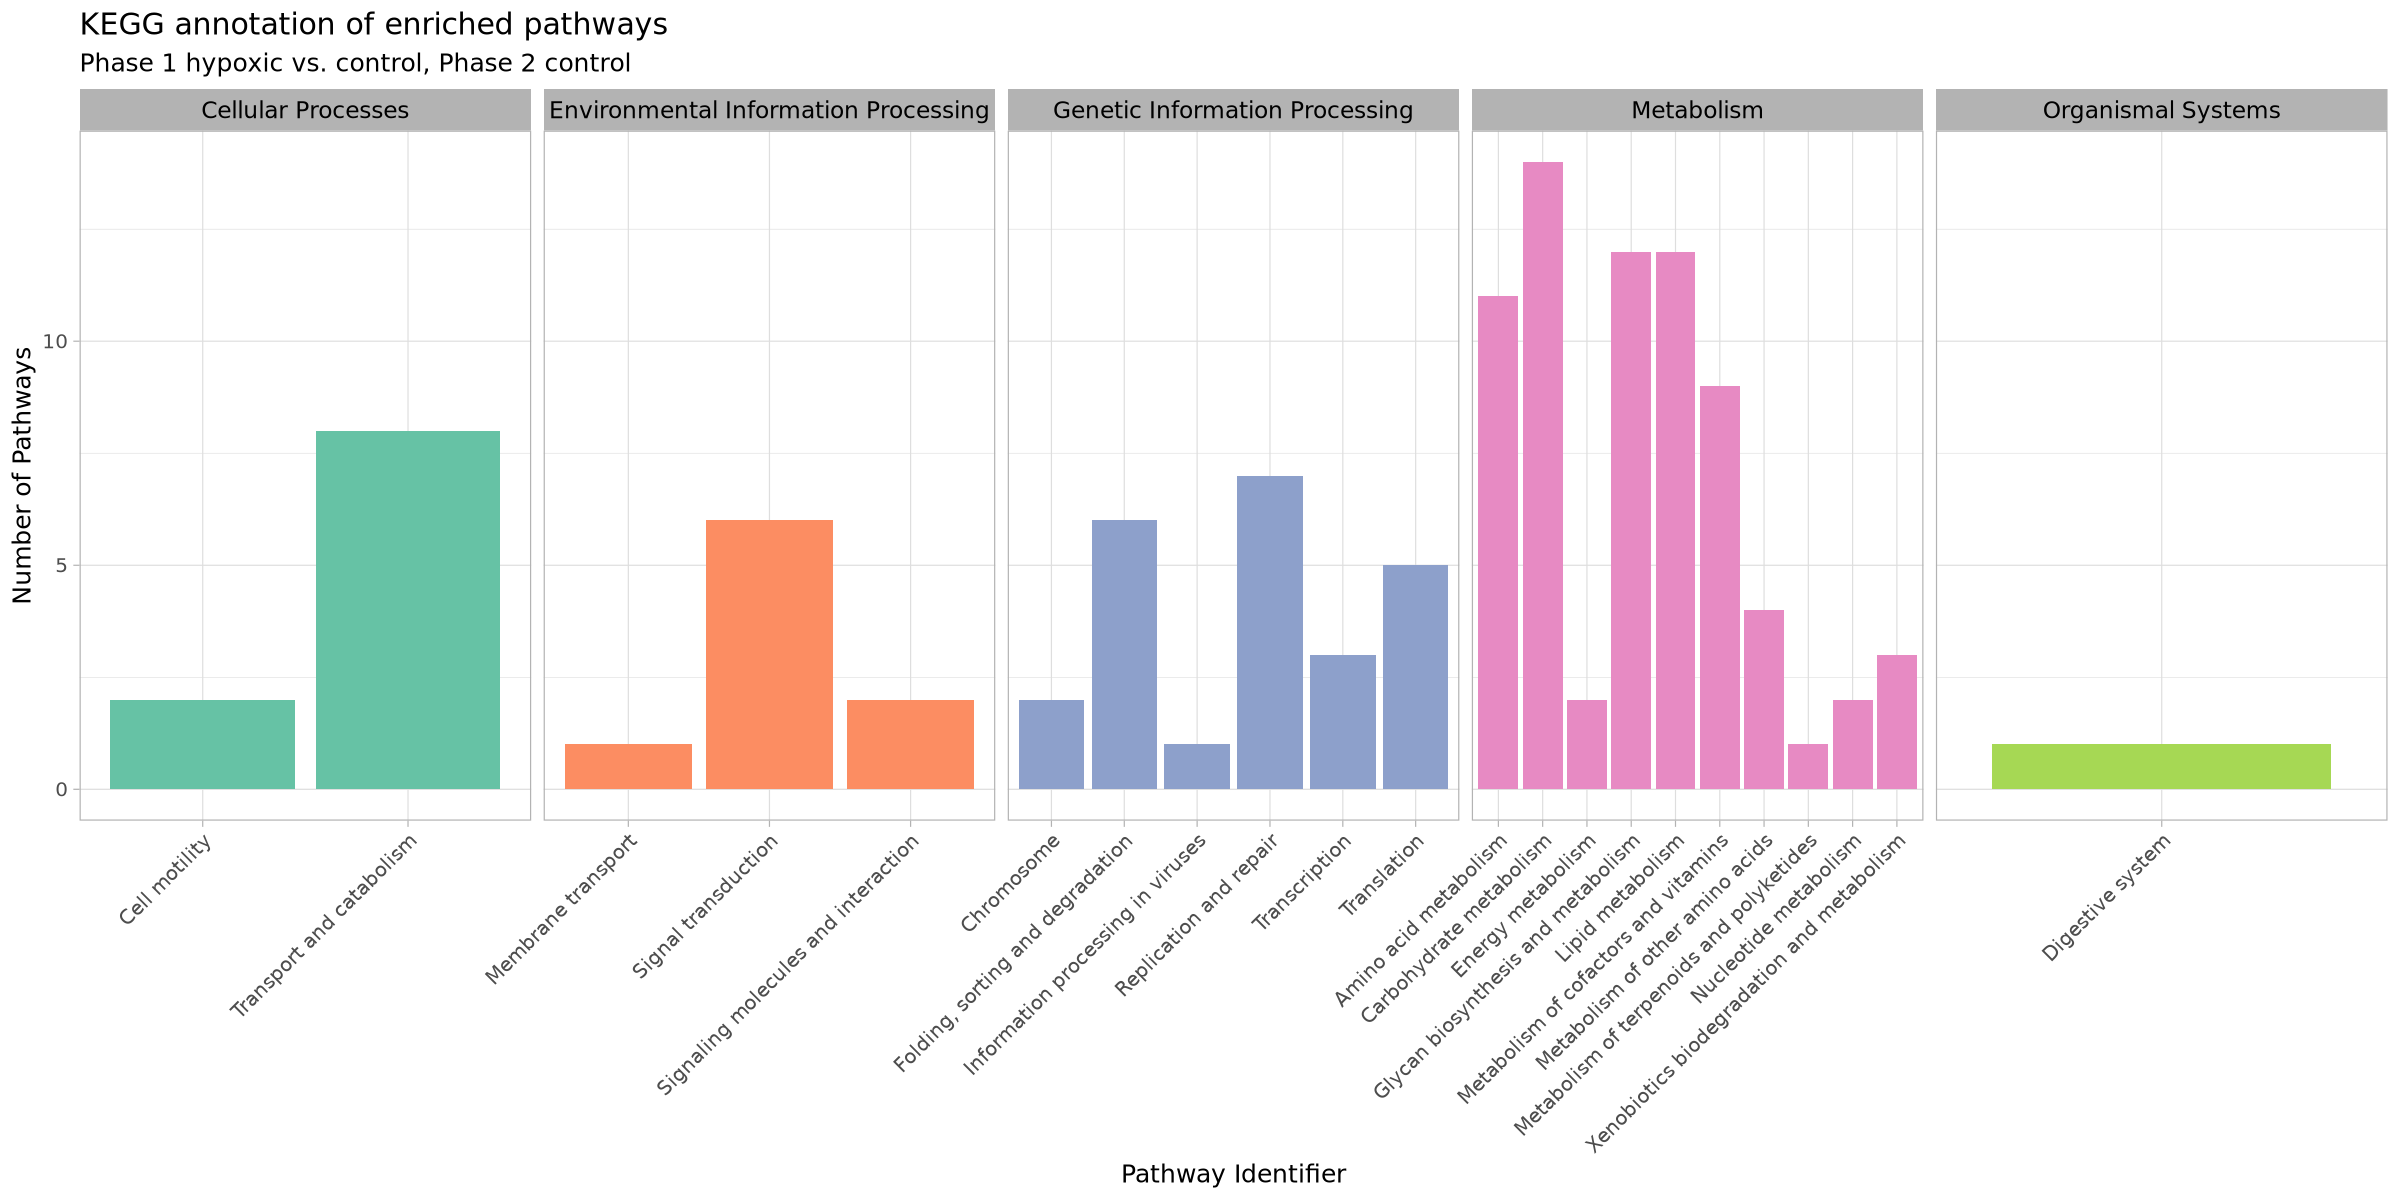

In [48]:
ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=15) + 
theme(strip.text = element_text(size = 14, color = "black")) +
scale_fill_brewer(palette = 'Set2') +
facet_grid(~GeneralPathway, scales='free') +
theme(axis.text.x = element_text(angle = 45, hjust=1)) +
labs(title = 'KEGG annotation of enriched pathways', subtitle = 'Phase 1 hypoxic vs. control, Phase 2 control', y = 'Number of Pathways', 
    x = 'Pathway Identifier')

now want to add directionality... the above plot has both warm and control pathways put together, so want to separate those out

In [49]:
# making sure R see enrichment score as a number
df2$enrichmentScore <- as.numeric(df2$enrichmentScore)

# assigning the enriched pathway to a phase based on the enrichment score
df2$direction <- ifelse(df2$enrichmentScore<0, "control", #neg ES = pathway for control
        ifelse(df2$enrichmentScore>0, "hypoxic", # pos ES = pathway for warm
        "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(df2)

X        ID       Description                             enrichmentScore
1 cvn00592 cvn00592 alpha-Linolenic acid metabolism          0.7812590     
2 cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids  0.5424550     
3 cvn00310 cvn00310 Lysine degradation                      -0.4896714     
4 cvn03008 cvn03008 Ribosome biogenesis in eukaryotes       -0.4223369     
5 cvn04146 cvn04146 Peroxisome                               0.3458777     
6 cvn04068 cvn04068 FoxO signaling pathway                  -0.3958920     
  GeneralPathway                       DetailedPathway          direction
1 Metabolism                           Lipid metabolism         hypoxic  
2 Metabolism                           Lipid metabolism         hypoxic  
3 Metabolism                           Amino acid metabolism    control  
4 Genetic Information Processing       Translation              control  
5 Cellular Processes                   Transport and catabolism hypoxic  
6 Environmental Information Processing Signal transduction      control

creating another ggplot, but this time adding phase variable to the facet grid so we can see what pathways were methylated for each phase

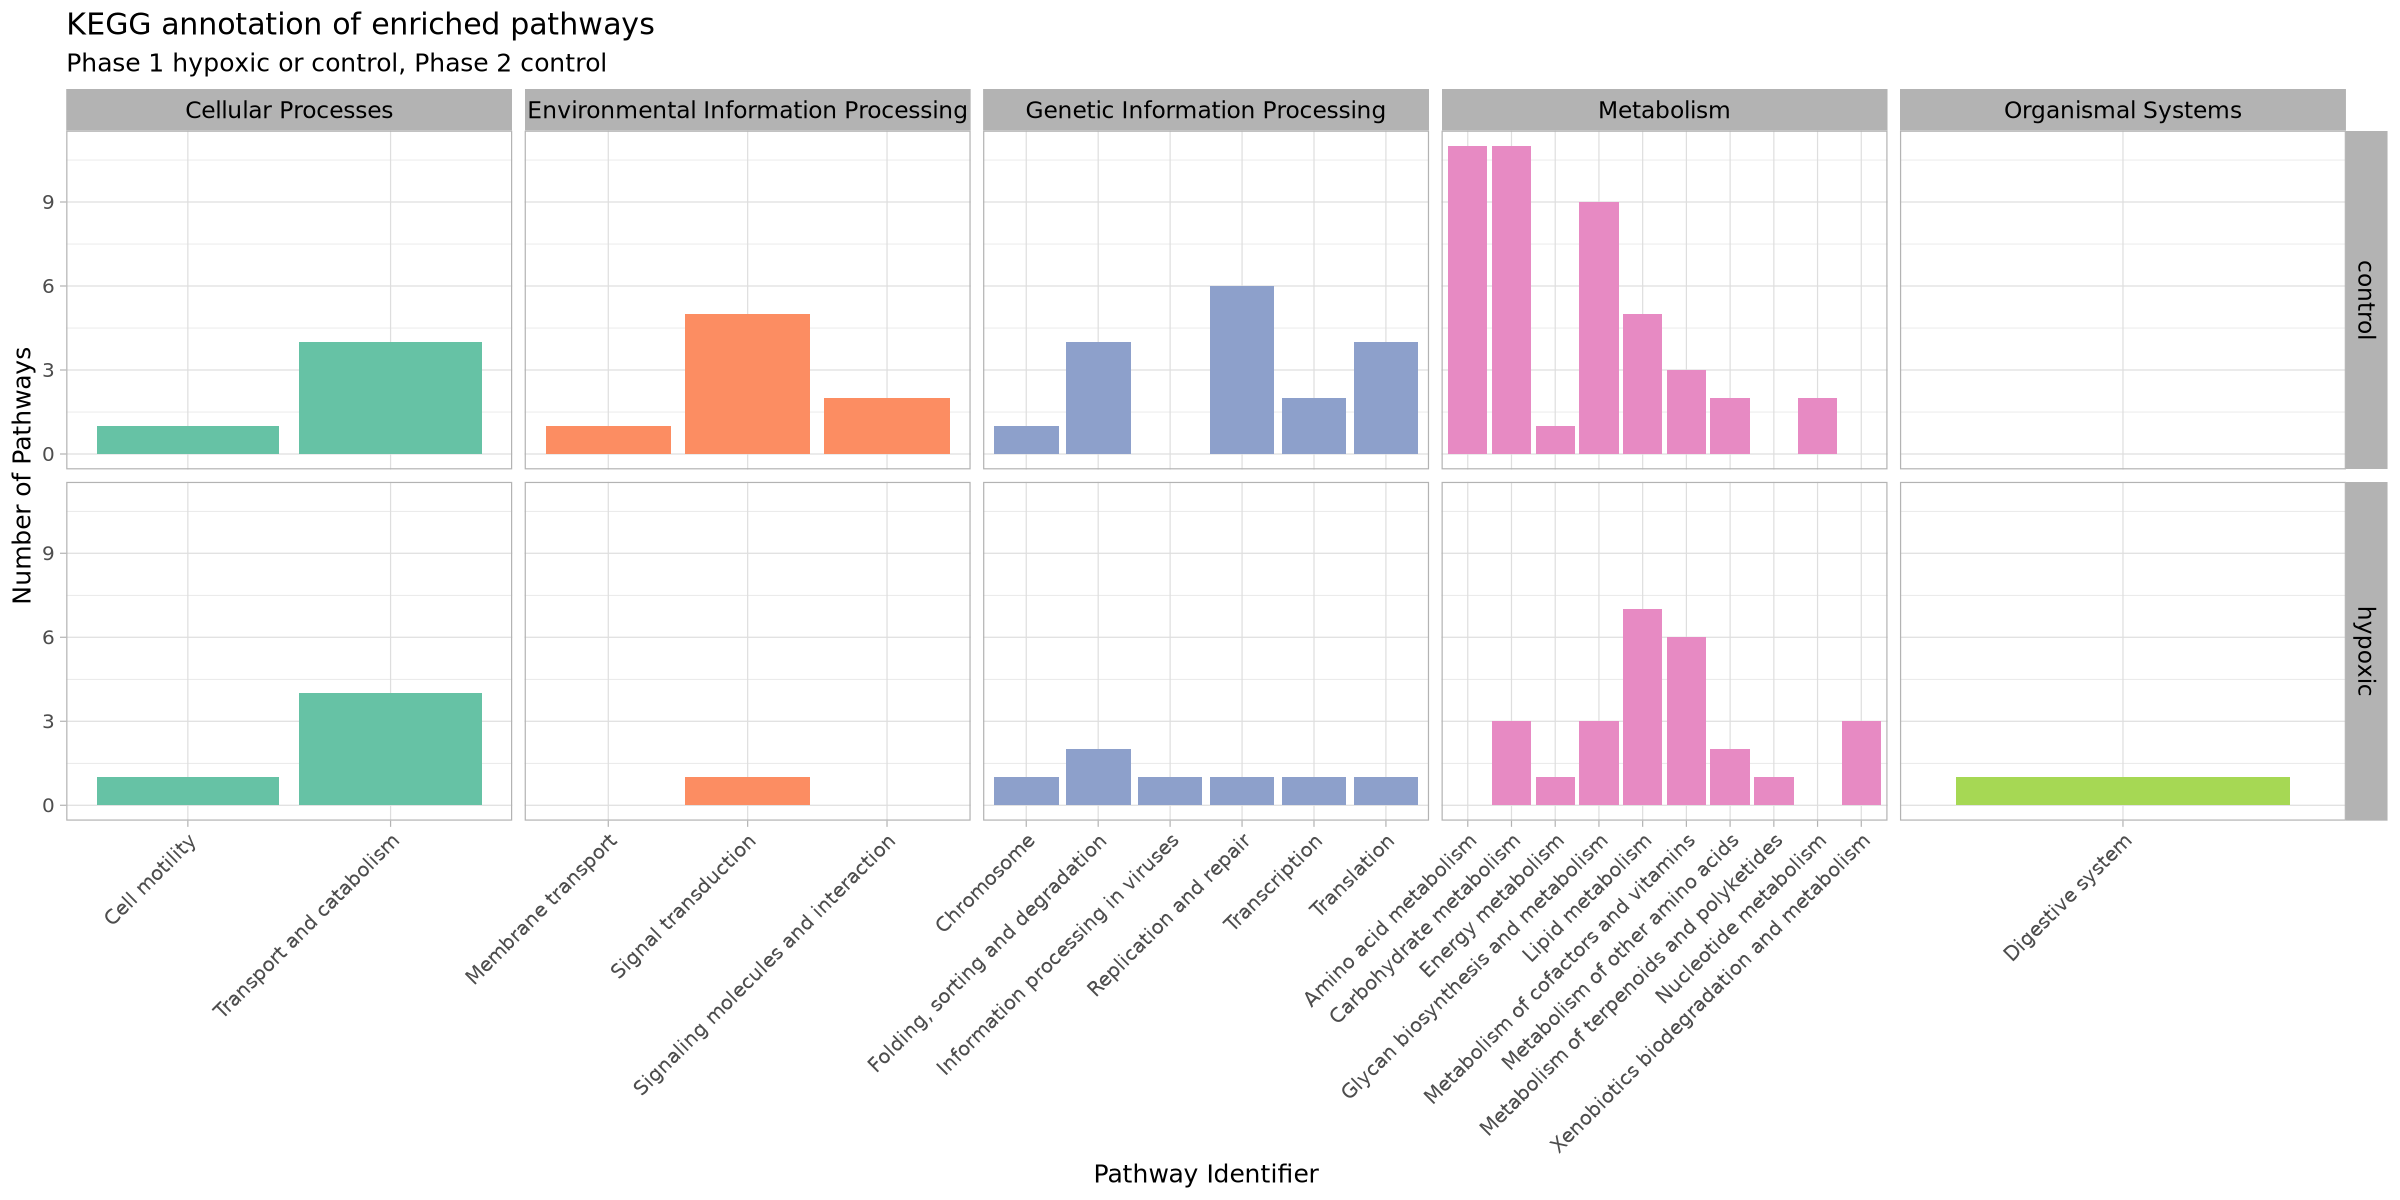

In [88]:
p2c_ce_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=15) + 
theme(strip.text = element_text(size = 14, color = "black")) +
scale_fill_brewer(palette = 'Set2') +
facet_grid(direction~GeneralPathway, scales='free_x') +
theme(axis.text.x = element_text(angle = 45, hjust=1)) +
labs(title = 'KEGG annotation of enriched pathways', subtitle = 'Phase 1 hypoxic or control, Phase 2 control', y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p2c_ce_kegg_plot

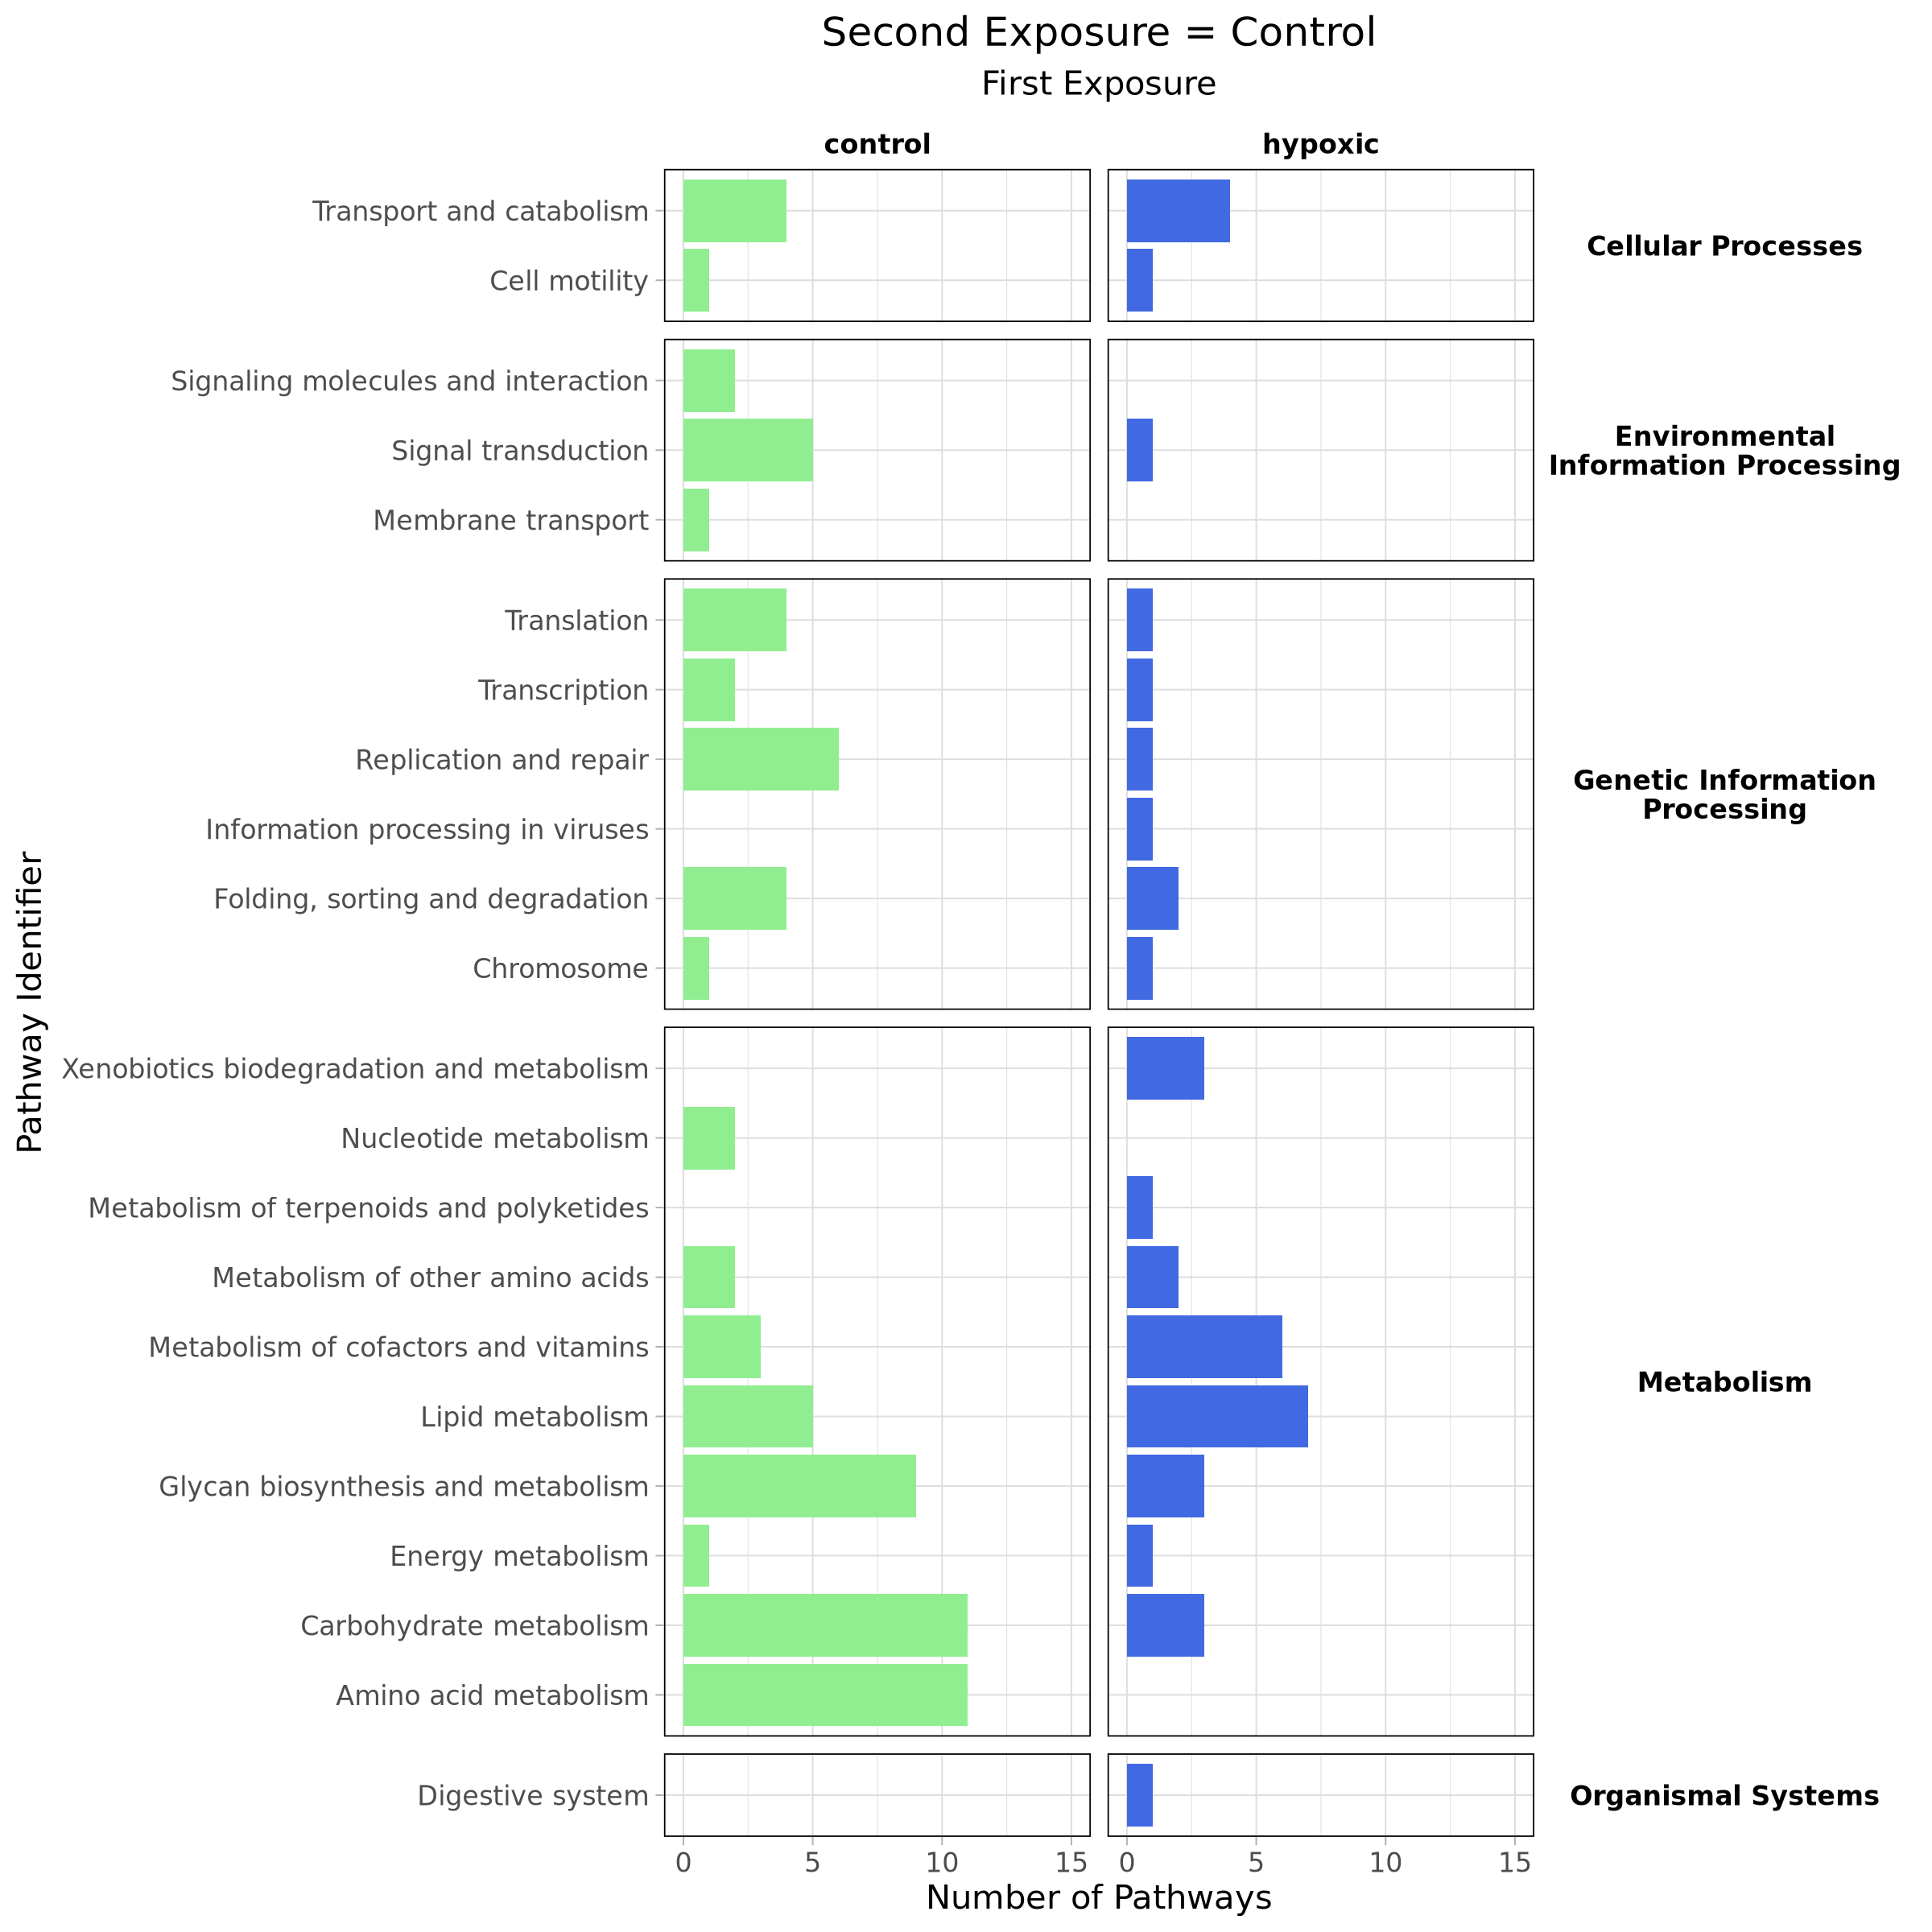

In [50]:
# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=20, repr.plot.height=20)

# changing color scheme

p2c_ce_kegg_plot <- ggplot(data= df2, aes(y = DetailedPathway, fill = direction)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_fill_manual(values = c('lightgreen', 'royalblue')) + 
theme(strip.text = element_text(size = 14, color = "black")) +
facet_grid(GeneralPathway~direction, 
           scales='free_y', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           labeller = label_wrap_gen(multi_line = TRUE)) +
scale_x_continuous(limits = c(0,15)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(size=20),
      plot.subtitle = element_text(hjust = 0.5),
      plot.title = element_text(hjust=0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
     strip.background = element_rect('transparent')) +
labs(subtitle = 'First Exposure', x = 'Number of Pathways', title = 'Second Exposure = Control', 
    y = 'Pathway Identifier')

p2c_ce_kegg_plot

In [51]:
strip1 <- strip_themed(background_y = elem_list_rect(fill = c("lightgreen",'royalblue')), clip='off')

strip2 <- strip_themed(by_layer_x=TRUE, clip='off')

In [52]:
# bc all had a first exposure of hypoxia here
df2$exposure <- 'First Exposure'
head(df2)

X        ID       Description                             enrichmentScore
1 cvn00592 cvn00592 alpha-Linolenic acid metabolism          0.7812590     
2 cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids  0.5424550     
3 cvn00310 cvn00310 Lysine degradation                      -0.4896714     
4 cvn03008 cvn03008 Ribosome biogenesis in eukaryotes       -0.4223369     
5 cvn04146 cvn04146 Peroxisome                               0.3458777     
6 cvn04068 cvn04068 FoxO signaling pathway                  -0.3958920     
  GeneralPathway                       DetailedPathway          direction
1 Metabolism                           Lipid metabolism         hypoxic  
2 Metabolism                           Lipid metabolism         hypoxic  
3 Metabolism                           Amino acid metabolism    control  
4 Genetic Information Processing       Translation              control  
5 Cellular Processes                   Transport and catabolism hypoxic  
6 Environmental Information Processing Signal transduction      control  
  exposure      
1 First Exposure
2 First Exposure
3 First Exposure
4 First Exposure
5 First Exposure
6 First Exposure

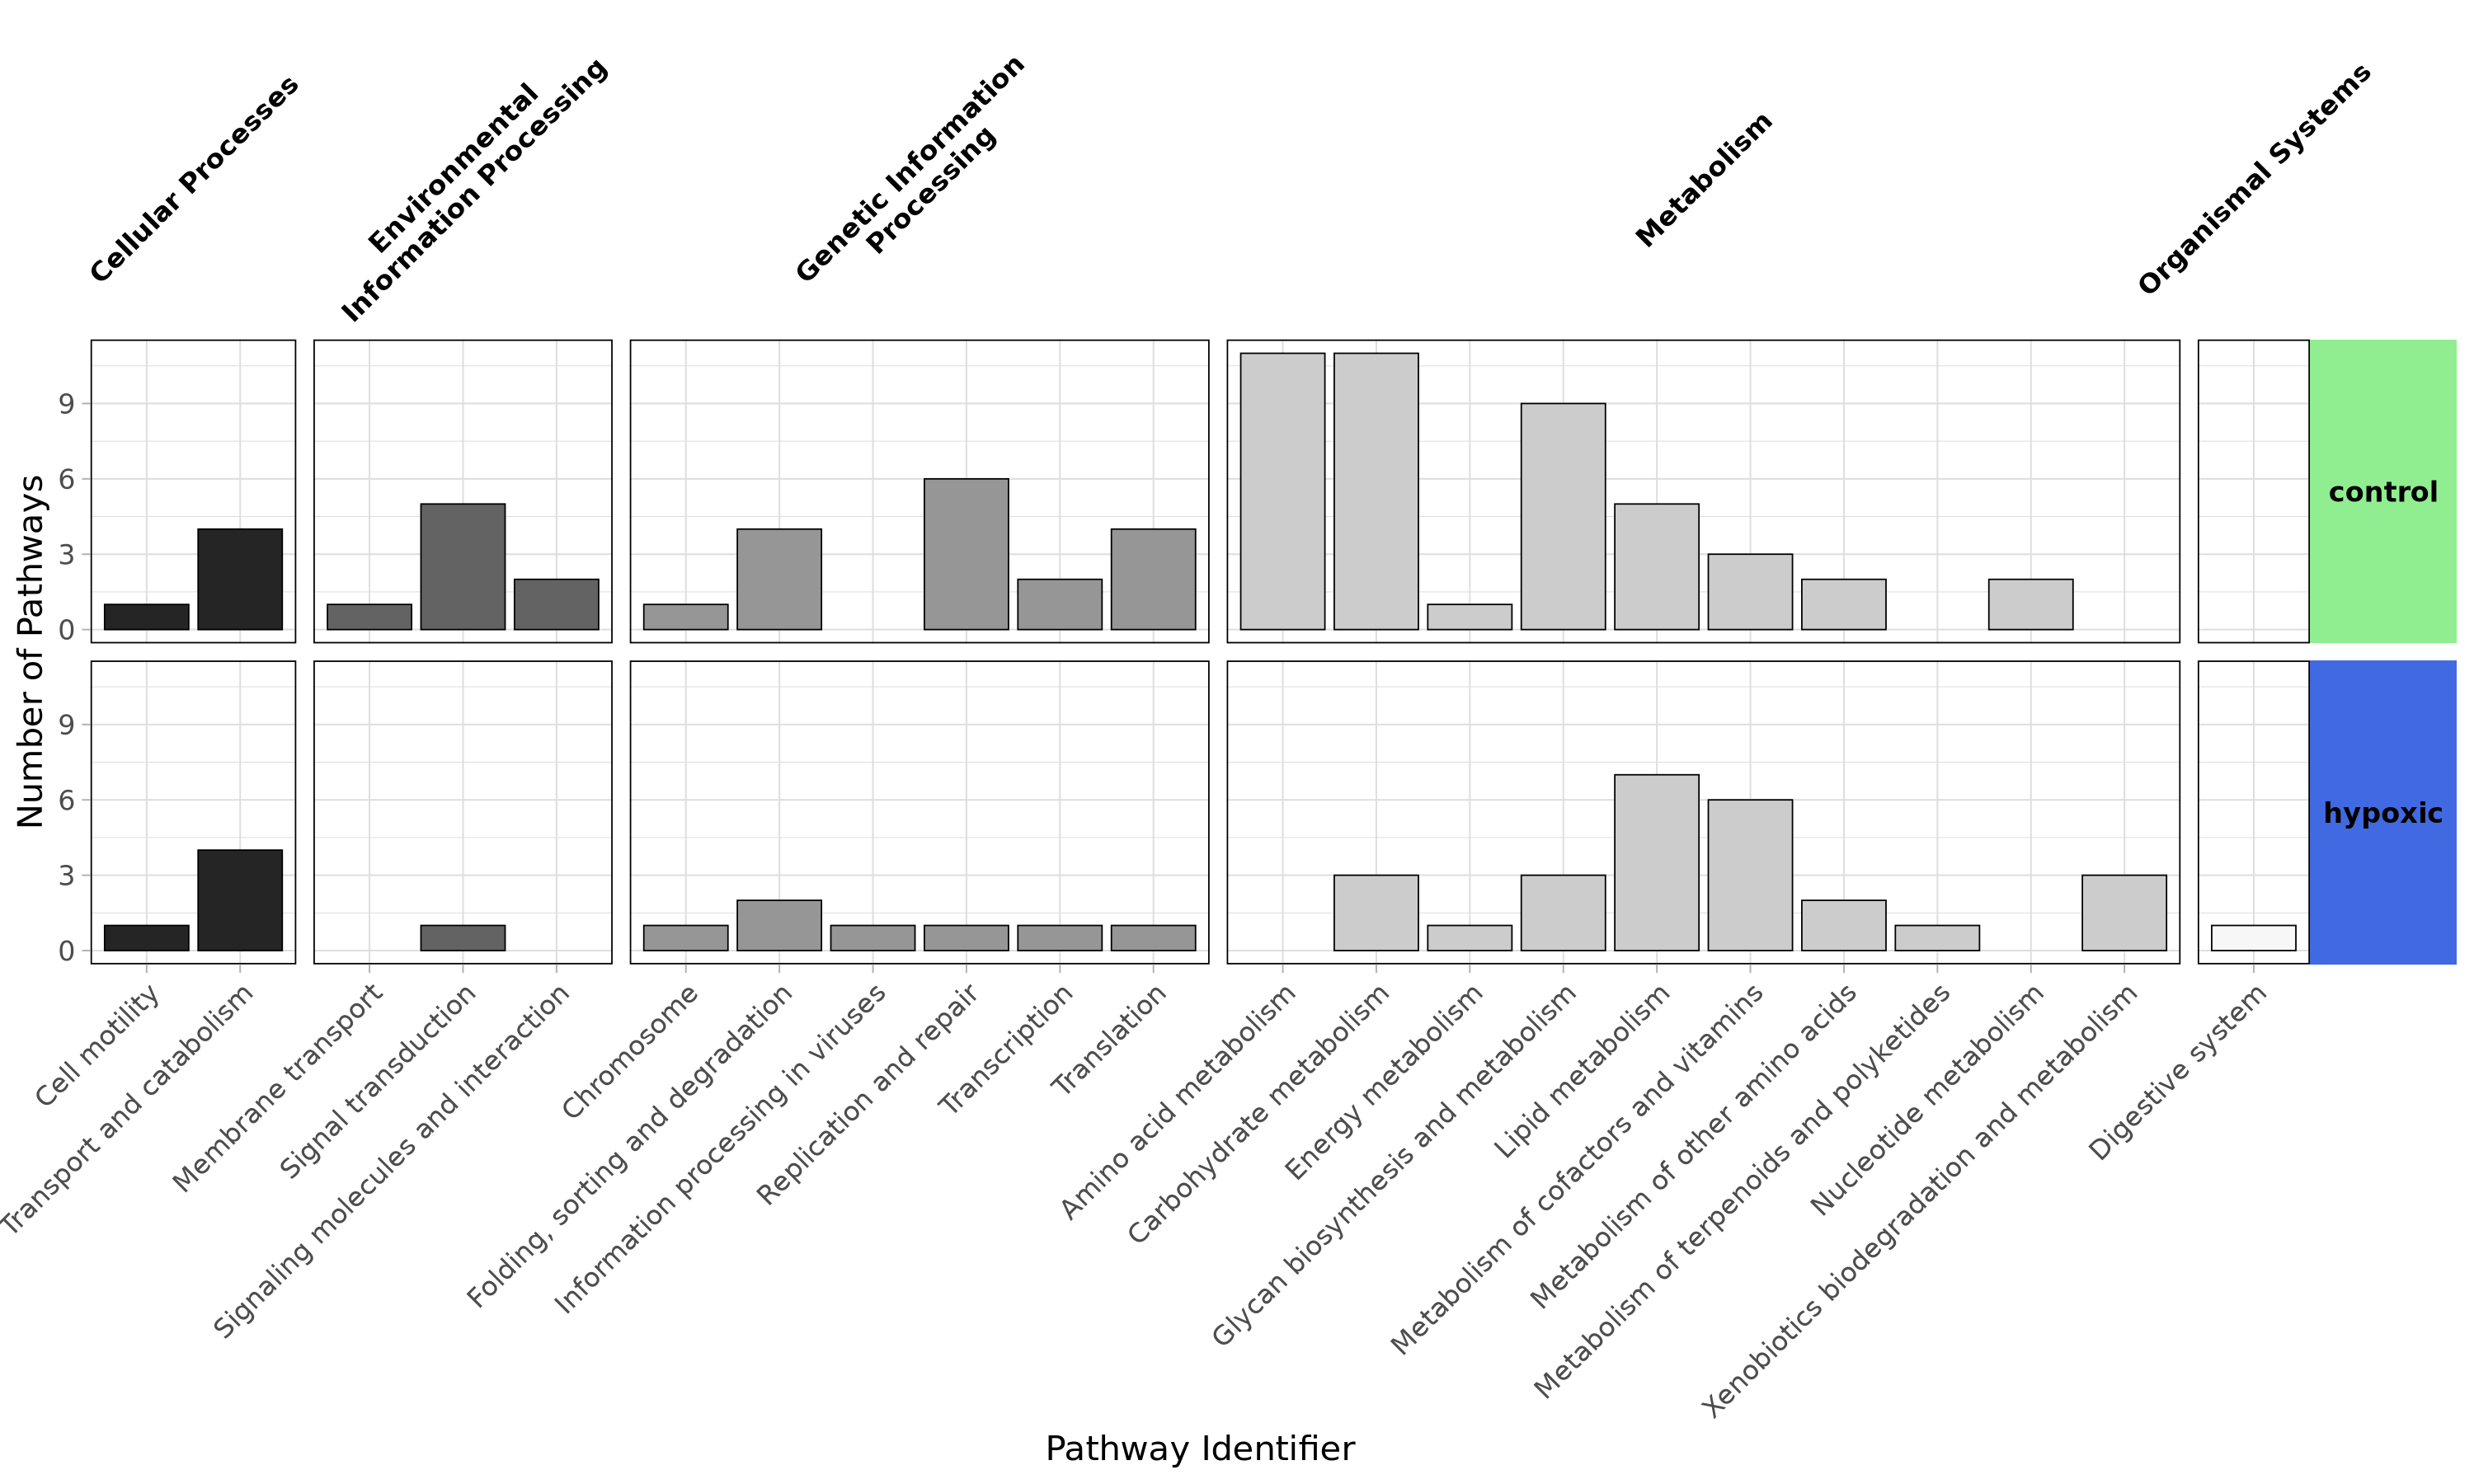

In [54]:
# horizontal, but color with gray scale

# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=25, repr.plot.height=15)

# changing color scheme

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway, col = 'black')) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_color_manual(values = c('black','black','black','black','black')) +
scale_fill_brewer(palette = 'Greys', direction=-1) +
theme(strip.text = element_text(size = 14),
      strip.text.x = element_text(color = 'black'),
     strip.text.y = element_text(color = 'black')) +
facet_grid2(direction~GeneralPathway, 
           scales='free_x', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           strip=strip1,
           labeller = label_wrap_gen(multi_line = TRUE)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      axis.text.x = element_text(angle = 45, hjust = 1),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(angle=45, size=20),
      plot.subtitle = element_text(hjust = 0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      strip.clip = 'off',
     strip.background = element_rect('transparent')) +
labs(y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1_wc_kegg_plot

not sure what to make of this... (but also remember these weren't filtered for lfc)

In [89]:
# saving plot as pdf file

# open pdf file
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures')
pdf('p2c_ce_kegg_pathways.pdf', width=20, height=10)

# open plot
p2c_ce_kegg_plot

# close pdf file
dev.off()

png 
  2

## all oysters phase 1 = control
looking at the methylated pathways of second exposure to hypoxia

none of these genes are statistically differentially methylated, but interested in what pathways are being methylated

In [3]:
# load in data frame
p1c <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/volcano_data/p1control_p2hc_genes.csv')

# select only needed columns
unfilter_df <- select(p1c, X, log2FoldChange, padj)

# KEGG uses entrez IDs, which are my ensembl IDs without the 'LOC' in front of them, so need to convert those
unfilter_df$X <- substr(unfilter_df$X, start = 4, stop = nchar(unfilter_df$X))

# renaming columns
colnames(unfilter_df) <- c('gene', 'lfc', 'padj')

head(unfilter_df)

gene      lfc         padj
1 111120752 -0.01831450 1   
2 111109452 -0.06431818 1   
3 111124802  0.01425287 1   
4 111101273 -0.25915086 1   
5 111101250  0.06661223 1   
6 111101262  0.15981376 1

In [4]:
# creating numeric vector for kegg object
kegg_gene_list <- unfilter_df$lfc
names(kegg_gene_list) <- unfilter_df$gene

# omitting anything with NA in a cell
kegg_gene_list <- na.omit(kegg_gene_list)

# sort list in descending order
kegg_gene_list = sort(kegg_gene_list, decreasing = TRUE)

# checking that things look okay
head(kegg_gene_list)
class(kegg_gene_list)

111122519 111100699 111125396 111115520 111131790 111120655 
 1.784993  1.433547  1.389775  1.271898  1.130784  1.119546

[1] "numeric"

In [5]:
kegg_organism = 'cvn'
kk2 <- gseKEGG(geneList = kegg_gene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH', #Benjamini-Hockberg FDR
               scoreType = 'std', # standard - only change for one-tailed tests
               keyType = 'kegg')

Reading KEGG annotation online: "https://rest.kegg.jp/link/cvn/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/cvn"...

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (7.56% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



In [6]:
kk2_df <- as.data.frame(kk2)
kk2_df$Description <- sub(" -.*", "", kk2_df$Description)
head(kk2_df,15)

ID       Description                                 setSize
cvn00450 cvn00450 Selenocompound metabolism                    12    
cvn00330 cvn00330 Arginine and proline metabolism              48    
cvn04141 cvn04141 Protein processing in endoplasmic reticulum 106    
cvn00860 cvn00860 Porphyrin metabolism                         18    
cvn00670 cvn00670 One carbon pool by folate                    19    
cvn00071 cvn00071 Fatty acid degradation                       38    
cvn01240 cvn01240 Biosynthesis of cofactors                   101    
cvn03450 cvn03450 Non-homologous end-joining                   13    
cvn00592 cvn00592 alpha-Linolenic acid metabolism              11    
cvn00360 cvn00360 Phenylalanine metabolism                     10    
cvn00531 cvn00531 Glycosaminoglycan degradation                13    
cvn00280 cvn00280 Valine, leucine and isoleucine degradation   50    
cvn00510 cvn00510 N-Glycan biosynthesis                        32    
cvn00760 cvn00760 Nicotinate and nicotinamide metabolism       24    
cvn00010 cvn00010 Glycolysis / Gluconeogenesis                 44    
         enrichmentScore NES       pvalue      p.adjust  qvalue    rank
cvn00450  0.7524241       1.838878 0.001975540 0.2370648 0.2308263  588
cvn00330  0.4573855       1.568591 0.009249061 0.3699625 0.3602266 1253
cvn04141 -0.3860944      -1.510506 0.008090934 0.3699625 0.3602266 1835
cvn00860 -0.5793762      -1.606476 0.028533328 0.4891428 0.4762706  671
cvn00670  0.5617174       1.559481 0.027837201 0.4891428 0.4762706 2081
cvn00071  0.4572585       1.485961 0.027107047 0.4891428 0.4762706 1253
cvn01240 -0.3629369      -1.416066 0.022273018 0.4891428 0.4762706 1272
cvn03450  0.6120675       1.556196 0.055464677 0.5555556 0.5409357 1191
cvn00592  0.6437934       1.524597 0.041186864 0.5555556 0.5409357 1369
cvn00360  0.6438392       1.499323 0.044105257 0.5555556 0.5409357  763
cvn00531 -0.5917956      -1.483885 0.055555556 0.5555556 0.5409357 3368
cvn00280  0.3957235       1.365969 0.054108216 0.5555556 0.5409357 1721
cvn00510 -0.4461612      -1.415699 0.064327485 0.5937922 0.5781661 2336
cvn00760  0.4741048       1.392339 0.083820663 0.6286550 0.6121114 2477
cvn00010 -0.3975516      -1.329654 0.080645161 0.6286550 0.6121114 3077
         leading_edge                  
cvn00450 tags=42%, list=4%, signal=40% 
cvn00330 tags=23%, list=9%, signal=21% 
cvn04141 tags=31%, list=14%, signal=27%
cvn00860 tags=44%, list=5%, signal=42% 
cvn00670 tags=37%, list=16%, signal=31%
cvn00071 tags=29%, list=9%, signal=26% 
cvn01240 tags=19%, list=10%, signal=17%
cvn03450 tags=46%, list=9%, signal=42% 
cvn00592 tags=36%, list=10%, signal=33%
cvn00360 tags=30%, list=6%, signal=28% 
cvn00531 tags=62%, list=25%, signal=46%
cvn00280 tags=32%, list=13%, signal=28%
cvn00510 tags=41%, list=18%, signal=34%
cvn00760 tags=33%, list=19%, signal=27%
cvn00010 tags=50%, list=23%, signal=39%
         core_enrichment                                                                                                                                                                                                                                                                                                                          
cvn00450 111119950/111130865/111119949/111099623/111122141                                                                                                                                                                                                                                                                                        
cvn00330 111125396/111136221/111134810/111132780/111132445/111119088/111137596/111122529/111099180/111131063/111130726                                                                                                                                                                                                                            
cvn04141 111126865/111135880/111138488/111099471/111118731/111109659/111136571/1

In [7]:
# removes extra info on description column
kk2@result$Description <- gsub(pattern = " - Crassostrea virginica (eastern oyster)", 
                                 replacement = "", kk2@result$Description, fixed = T)
head(kk2)

ID       Description                                 setSize
cvn00450 cvn00450 Selenocompound metabolism                    12    
cvn00330 cvn00330 Arginine and proline metabolism              48    
cvn04141 cvn04141 Protein processing in endoplasmic reticulum 106    
cvn00860 cvn00860 Porphyrin metabolism                         18    
cvn00670 cvn00670 One carbon pool by folate                    19    
cvn00071 cvn00071 Fatty acid degradation                       38    
         enrichmentScore NES       pvalue      p.adjust  qvalue    rank
cvn00450  0.7524241       1.838878 0.001975540 0.2370648 0.2308263  588
cvn00330  0.4573855       1.568591 0.009249061 0.3699625 0.3602266 1253
cvn04141 -0.3860944      -1.510506 0.008090934 0.3699625 0.3602266 1835
cvn00860 -0.5793762      -1.606476 0.028533328 0.4891428 0.4762706  671
cvn00670  0.5617174       1.559481 0.027837201 0.4891428 0.4762706 2081
cvn00071  0.4572585       1.485961 0.027107047 0.4891428 0.4762706 1253
         leading_edge                  
cvn00450 tags=42%, list=4%, signal=40% 
cvn00330 tags=23%, list=9%, signal=21% 
cvn04141 tags=31%, list=14%, signal=27%
cvn00860 tags=44%, list=5%, signal=42% 
cvn00670 tags=37%, list=16%, signal=31%
cvn00071 tags=29%, list=9%, signal=26% 
         core_enrichment                                                                                                                                                                                                                                                                                                                          
cvn00450 111119950/111130865/111119949/111099623/111122141                                                                                                                                                                                                                                                                                        
cvn00330 111125396/111136221/111134810/111132780/111132445/111119088/111137596/111122529/111099180/111131063/111130726                                                                                                                                                                                                                            
cvn04141 111126865/111135880/111138488/111099471/111118731/111109659/111136571/111135701/111128114/111125459/111122190/111121035/111106364/111130192/111127324/111120719/111113194/111100861/111129680/111115433/111120048/111125576/111121134/111100575/111133262/111121740/111131501/111108423/111125296/111115975/111128926/111137033/111120710
cvn00860 111126157/111137219/111115437/111130240/111135080/111132054/111102767/111130105                                                                                                                                                                                                                                                          
cvn00670 111130865/111099502/111115204/111109454/111114690/111128337/111104244                                                                                                                                                                                                                                                                    
cvn00071 111115744/111113990/111127947/111103956/111109503/111116989/111115883/111115745/111121538/111131063/111130726

In [8]:
# saving enriched pathways info into csv file to further investigate 
write.csv(kk2, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/enriched_pathways/p1control_p2hc_pathways.csv')

In [9]:
options(repr.plot.width=10, repr.plot.height=10)

I've turned the code below into markdown text - runs for a long time, so after first run you should save the data frame as a csv to be able to call it when you run this again.

**function to get pathway meta data from URL link:**


In [10]:

# generated with help of ChatGPT
# Function to get pathway names
get_pathway_names <- function(kegg_id) {
  url <- paste0("http://rest.kegg.jp/get/", kegg_id)
  response <- GET(url)
  
  if (status_code(response) == 200) {
    pathway_info <- content(response, "text", encoding = "UTF-8")
    general_pathway <- NA
    detailed_pathway <- NA
    
    # Extracting general and detailed pathways from the pathway info
    lines <- strsplit(pathway_info, "\n")[[1]]
    for (line in lines) {
      if (grepl("^CLASS", line)) {
        paths <- unlist(strsplit(line, ";"))
        general_pathway <- trimws(paths[1])
        detailed_pathway <- ifelse(length(paths) > 1, trimws(paths[2]), NA)
        break
      }
    }
    
    return(list(General_Pathway = general_pathway, Detailed_Pathway = detailed_pathway))
  } else {
    cat("Failed to retrieve information for pathway:", kegg_id, "\n")
    return(NULL)
  }
}


**adding pathway meta data to data frame**

In [11]:

# generated with help of ChatGPT
# Sample dataframe with KEGG IDs
gseKEGG_df <- select(kk2_df, ID, Description, enrichmentScore)

# Function to apply to each KEGG ID in the dataframe
pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)

# Combine pathway info into a dataframe
pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')

# Combine pathway info with original dataframe
gseKEGG_df <- cbind(gseKEGG_df, pathway_df)

# Rename columns for clarity
#colnames(gseKEGG_df) <- c("KEGG_ID", "General_Pathway", "Detailed_Pathway")

# Print the dataframe
head(as.data.frame(gseKEGG_df))


ID       Description                                 enrichmentScore
cvn00450 cvn00450 Selenocompound metabolism                    0.7524241     
cvn00330 cvn00330 Arginine and proline metabolism              0.4573855     
cvn04141 cvn04141 Protein processing in endoplasmic reticulum -0.3860944     
cvn00860 cvn00860 Porphyrin metabolism                        -0.5793762     
cvn00670 cvn00670 One carbon pool by folate                    0.5617174     
cvn00071 cvn00071 Fatty acid degradation                       0.4572585     
         GeneralPathway DetailedPathway
cvn00450 CLASS   ....   Metaboli....   
cvn00330 CLASS   ....   Amino ac....   
cvn04141 CLASS   ....   Folding,....   
cvn00860 CLASS   ....   Metaboli....   
cvn00670 CLASS   ....   Metaboli....   
cvn00071 CLASS   ....   Lipid me....

now need to **clean up data frame**

In [12]:

df <- as.data.frame(gseKEGG_df)
# cleaning up GeneralPathway column to only include the pathway name and not CLASS
column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column

# also changing DetailedPathway into character instead of list to be able to write csv
df$DetailedPathway <- as.character(df$DetailedPathway)

head(df)


ID       Description                                 enrichmentScore
cvn00450 cvn00450 Selenocompound metabolism                    0.7524241     
cvn00330 cvn00330 Arginine and proline metabolism              0.4573855     
cvn04141 cvn04141 Protein processing in endoplasmic reticulum -0.3860944     
cvn00860 cvn00860 Porphyrin metabolism                        -0.5793762     
cvn00670 cvn00670 One carbon pool by folate                    0.5617174     
cvn00071 cvn00071 Fatty acid degradation                       0.4572585     
         GeneralPathway                 DetailedPathway                     
cvn00450 Metabolism                     Metabolism of other amino acids     
cvn00330 Metabolism                     Amino acid metabolism               
cvn04141 Genetic Information Processing Folding, sorting and degradation    
cvn00860 Metabolism                     Metabolism of cofactors and vitamins
cvn00670 Metabolism                     Metabolism of cofactors and vitamins
cvn00071 Metabolism                     Lipid metabolism

In [13]:

# write csv file
write.csv(df, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/enriched_pathways/p1control_p2hc_pathways.csv')


In [62]:
# after running above code once, can just call df from csv file
df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/lfc_kegg_pathways/p2c_ce_kegg_pathway.csv')

### ggplot of pathways
With this information/meta data on the pathways, I want to do some analysis and try to generate some barplots/histograms

In [14]:
# taking out NAs
df2 <- filter(df, df$GeneralPathway!='NA')

In [15]:
options(repr.plot.width=20, repr.plot.height=10)

just plotting the data to check it out first

want to get the same general pathway bars next to each other 

now want to add directionality... the above plot has both warm and control pathways put together, so want to separate those out

In [17]:
# making sure R see enrichment score as a number
df2$enrichmentScore <- as.numeric(df2$enrichmentScore)

# assigning the enriched pathway to a phase based on the enrichment score
df2$direction <- ifelse(df2$enrichmentScore<0, "control", #neg ES = pathway for control
        ifelse(df2$enrichmentScore>0, "hypoxic", # pos ES = pathway for warm
        "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(df2)

ID       Description                                 enrichmentScore
cvn00450 cvn00450 Selenocompound metabolism                    0.7524241     
cvn00330 cvn00330 Arginine and proline metabolism              0.4573855     
cvn04141 cvn04141 Protein processing in endoplasmic reticulum -0.3860944     
cvn00860 cvn00860 Porphyrin metabolism                        -0.5793762     
cvn00670 cvn00670 One carbon pool by folate                    0.5617174     
cvn00071 cvn00071 Fatty acid degradation                       0.4572585     
         GeneralPathway                 DetailedPathway                     
cvn00450 Metabolism                     Metabolism of other amino acids     
cvn00330 Metabolism                     Amino acid metabolism               
cvn04141 Genetic Information Processing Folding, sorting and degradation    
cvn00860 Metabolism                     Metabolism of cofactors and vitamins
cvn00670 Metabolism                     Metabolism of cofactors and vitamins
cvn00071 Metabolism                     Lipid metabolism                    
         direction
cvn00450 hypoxic  
cvn00330 hypoxic  
cvn04141 control  
cvn00860 control  
cvn00670 hypoxic  
cvn00071 hypoxic

creating another ggplot, but this time adding phase variable to the facet grid so we can see what pathways were methylated for each phase

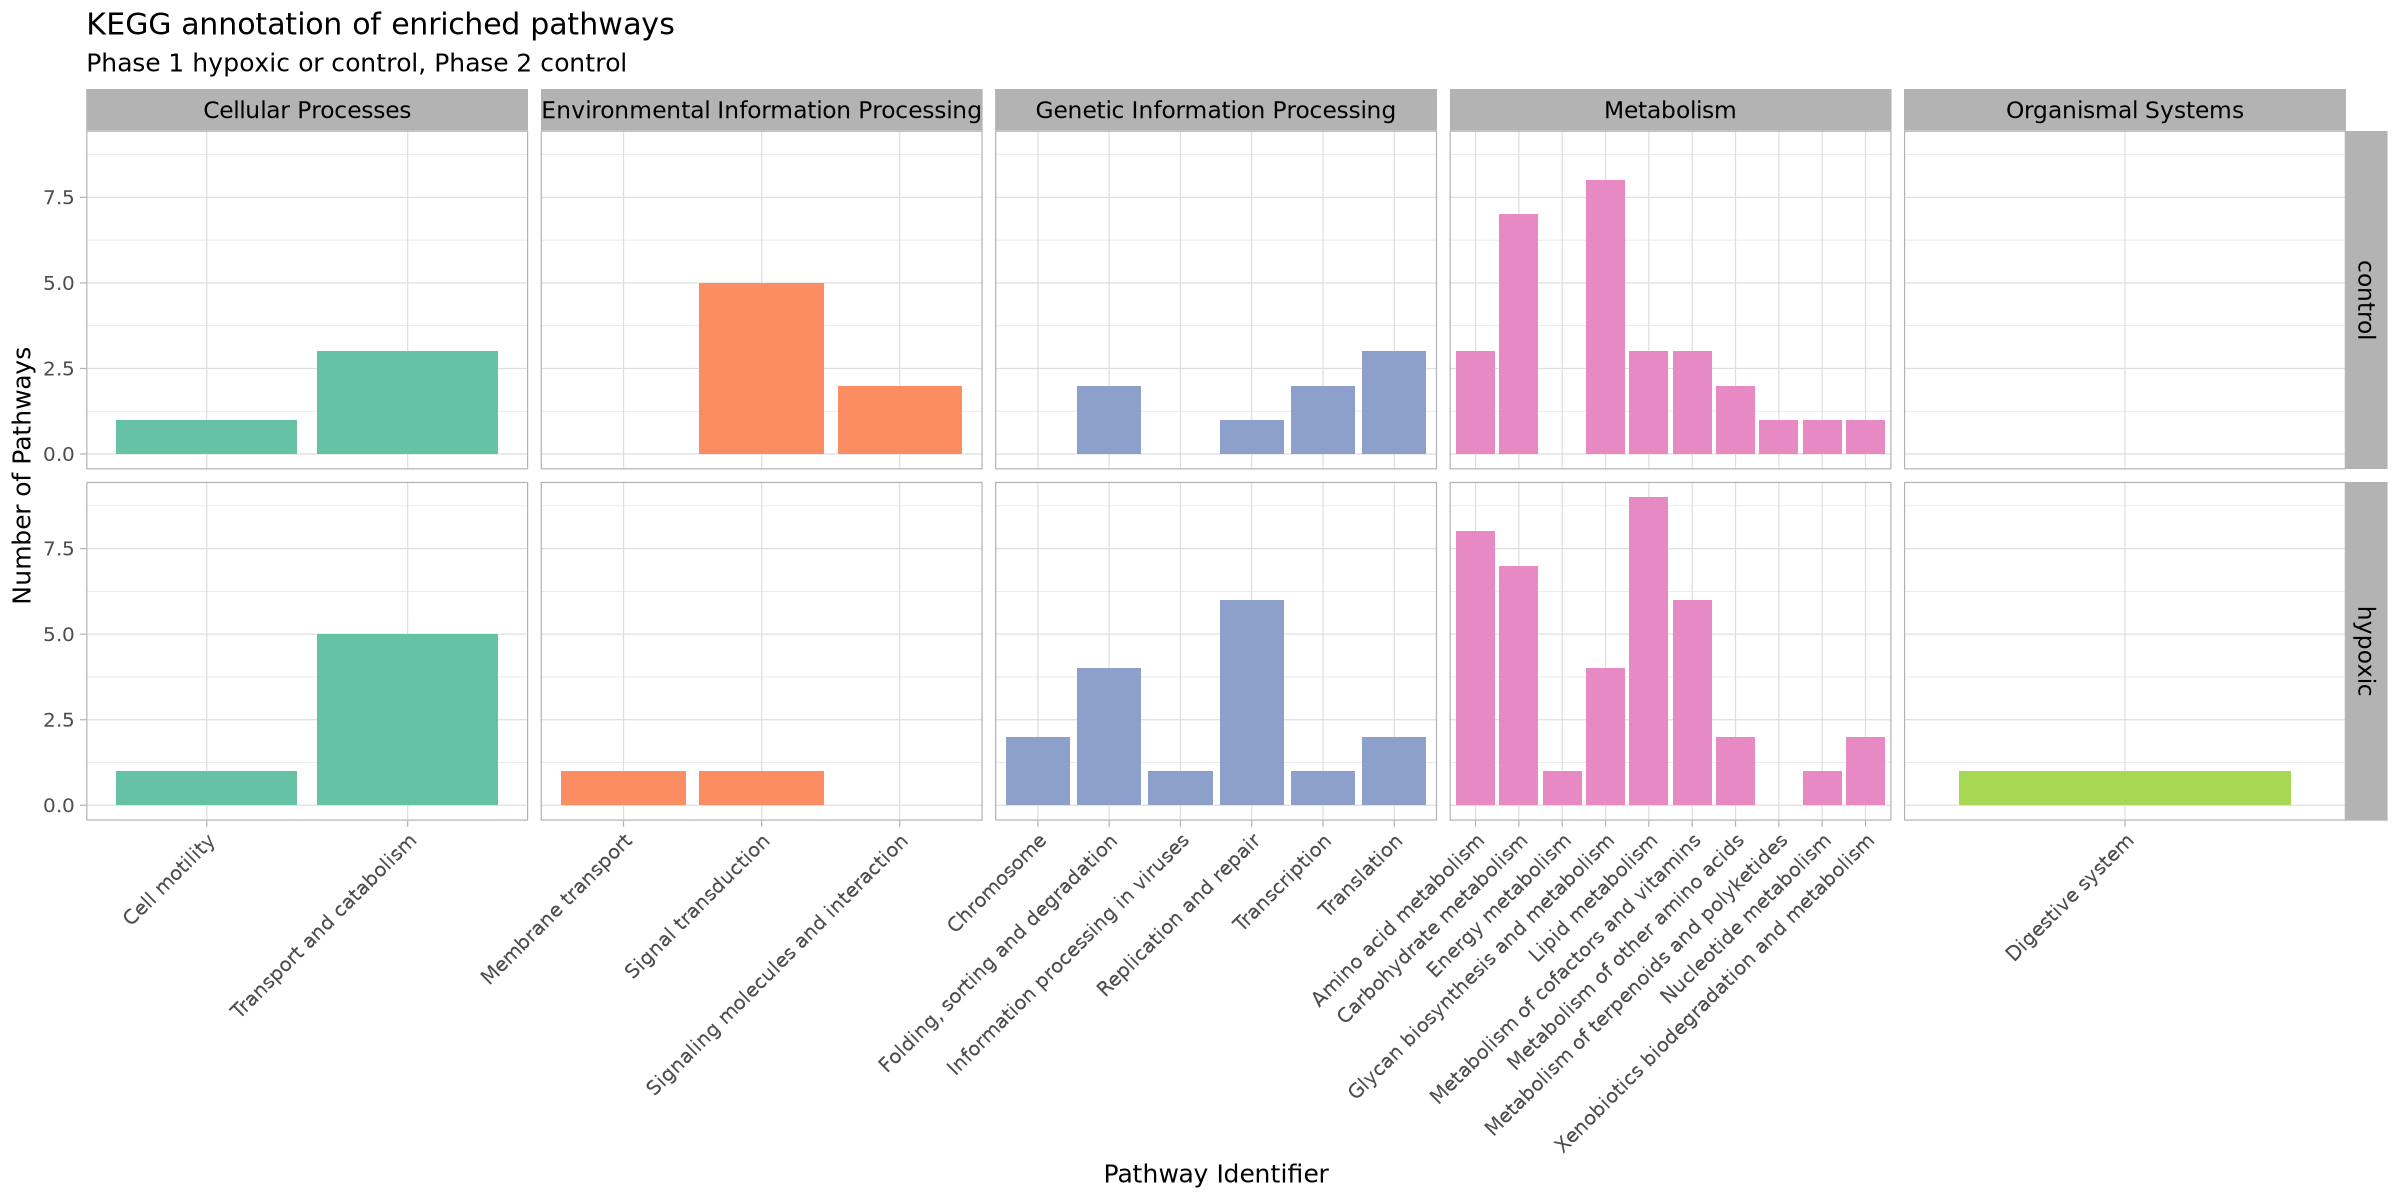

In [18]:
p2c_ce_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=15) + 
theme(strip.text = element_text(size = 14, color = "black")) +
scale_fill_brewer(palette = 'Set2') +
facet_grid(direction~GeneralPathway, scales='free_x') +
theme(axis.text.x = element_text(angle = 45, hjust=1)) +
labs(title = 'KEGG annotation of enriched pathways', subtitle = 'Phase 1 hypoxic or control, Phase 2 control', y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p2c_ce_kegg_plot

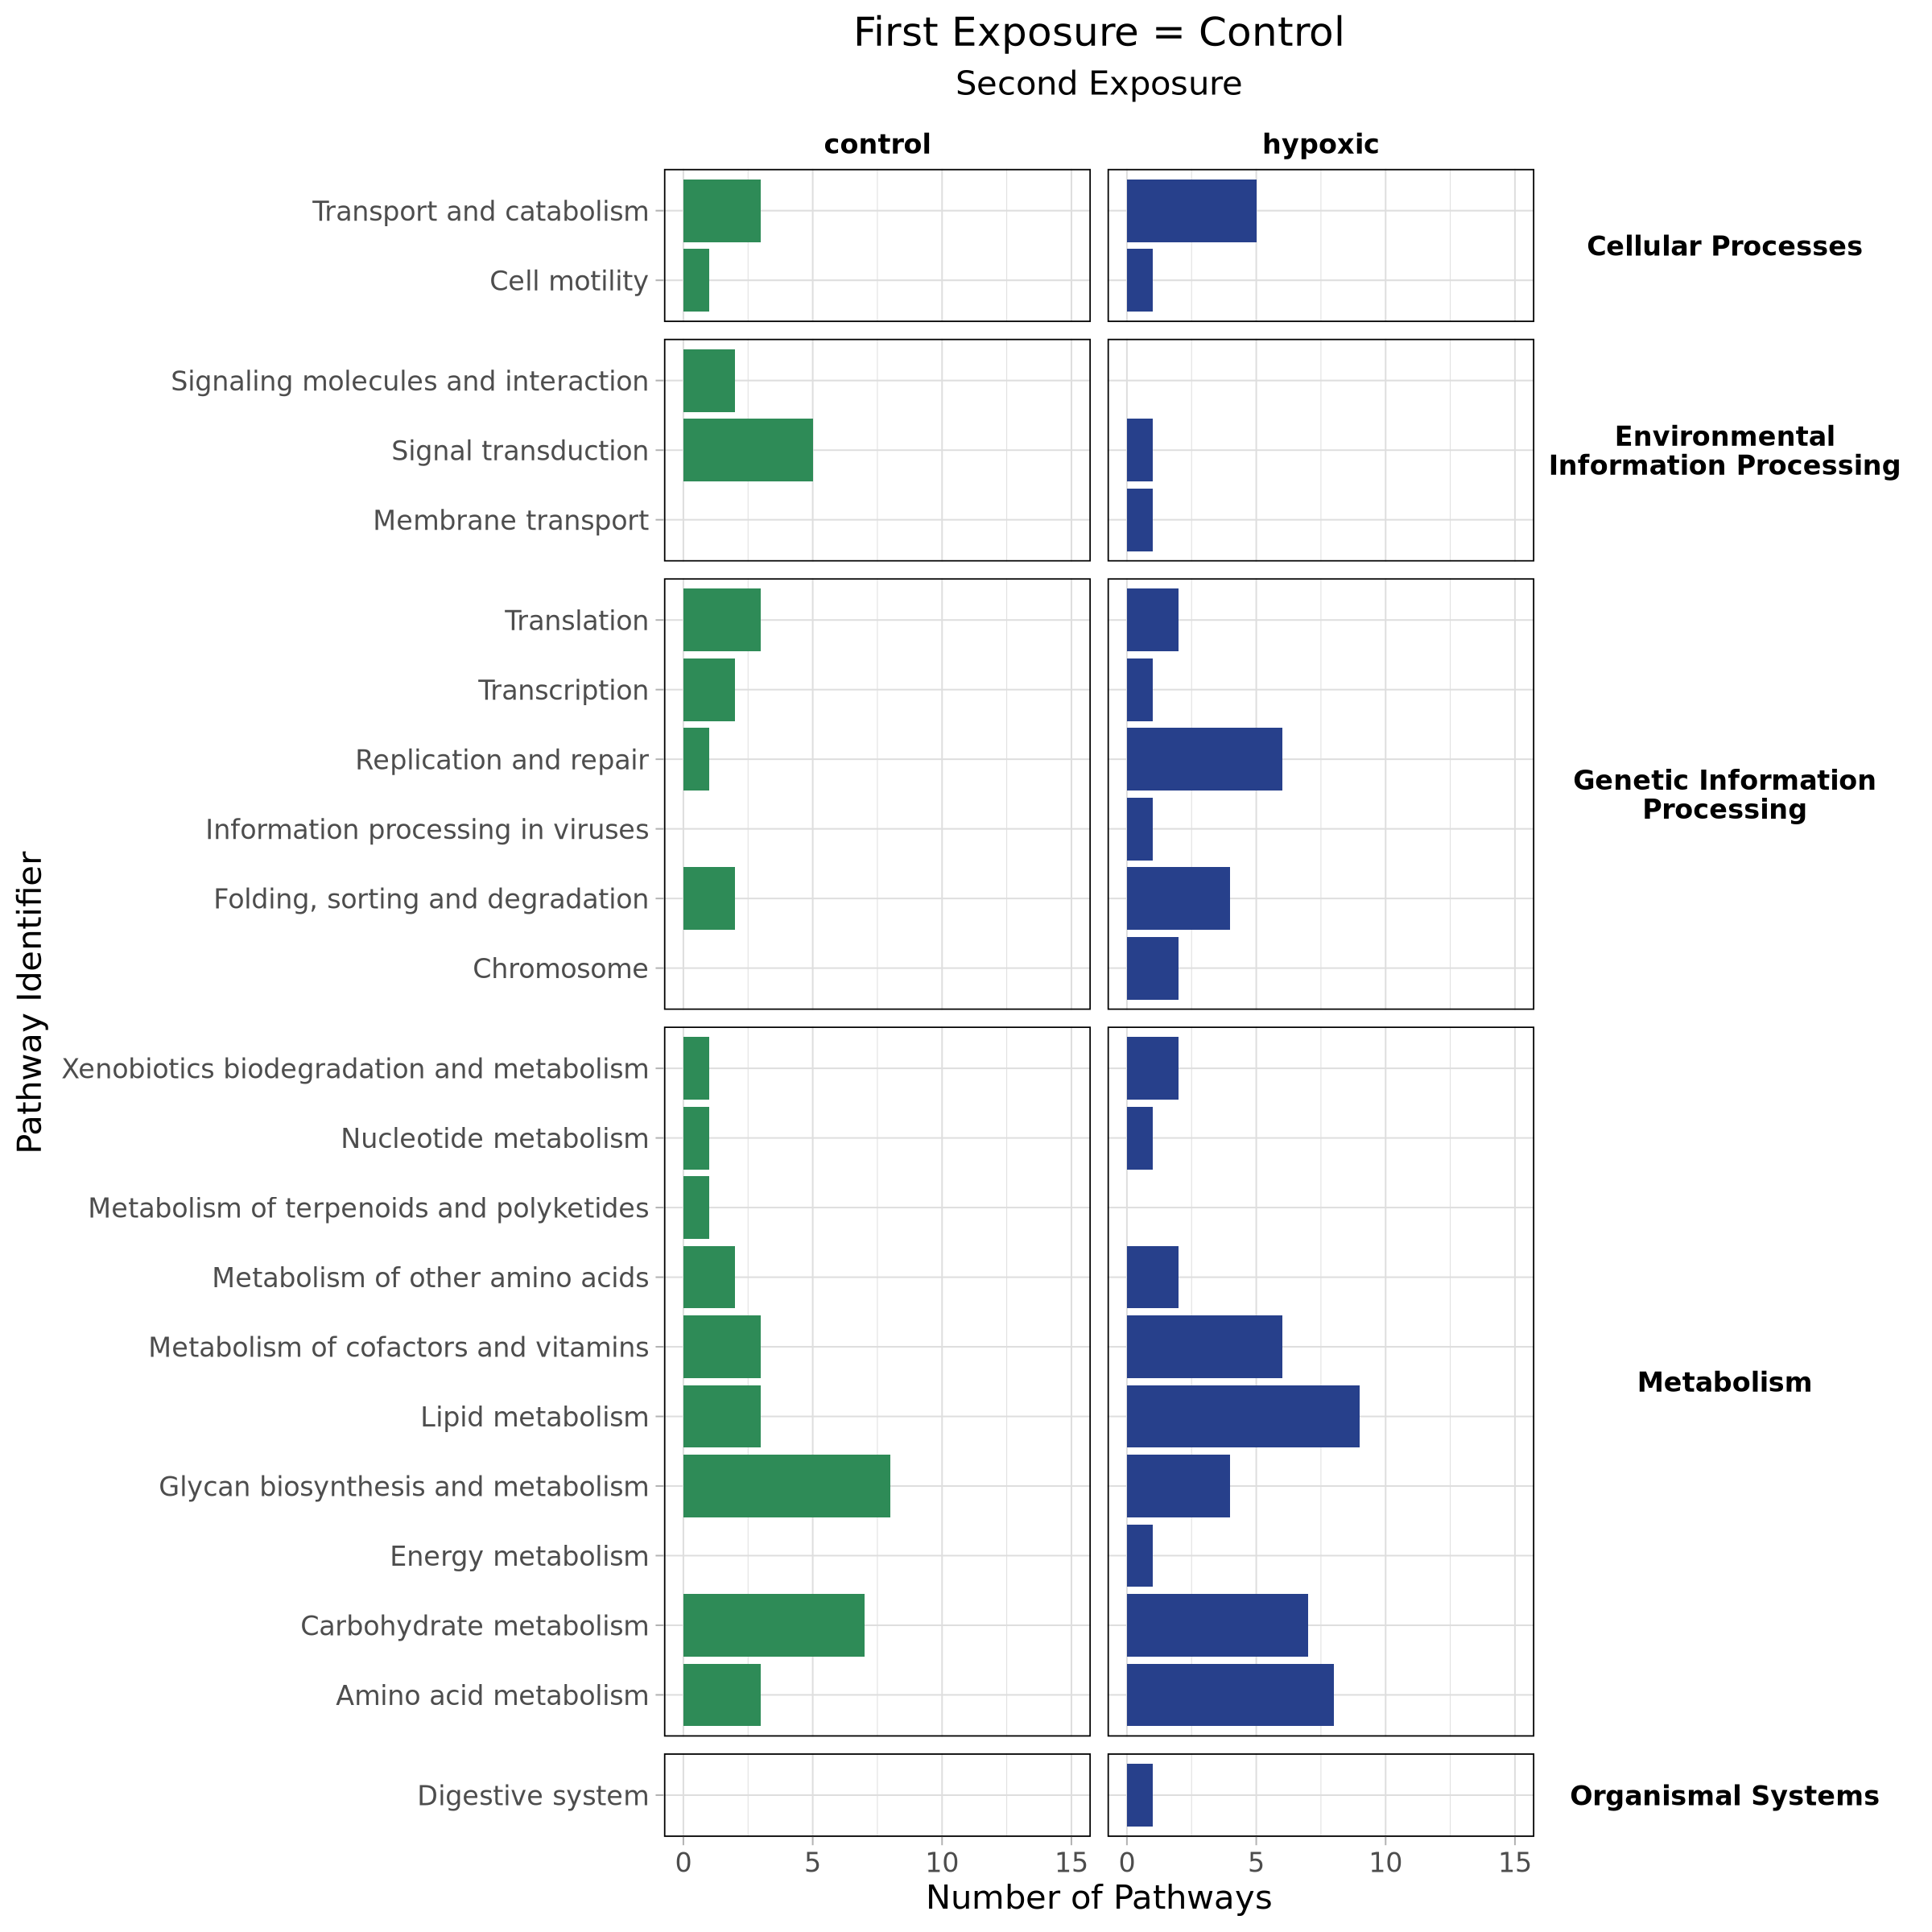

In [20]:
# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=20, repr.plot.height=20)

# changing color scheme

p2c_ce_kegg_plot <- ggplot(data= df2, aes(y = DetailedPathway, fill = direction)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_fill_manual(values = c('seagreen4', 'royalblue4')) + 
theme(strip.text = element_text(size = 14, color = "black")) +
facet_grid(GeneralPathway~direction, 
           scales='free_y', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           labeller = label_wrap_gen(multi_line = TRUE)) +
scale_x_continuous(limits = c(0,15)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(size=20),
      plot.subtitle = element_text(hjust = 0.5),
      plot.title = element_text(hjust=0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
     strip.background = element_rect('transparent')) +
labs(subtitle = 'Second Exposure', x = 'Number of Pathways', title = 'First Exposure = Control', 
    y = 'Pathway Identifier')

p2c_ce_kegg_plot

not sure what to make of this... (but also remember these weren't filtered for lfc)

In [89]:
# saving plot as pdf file

# open pdf file
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures')
pdf('p2c_ce_kegg_pathways.pdf', width=20, height=10)

# open plot
p2c_ce_kegg_plot

# close pdf file
dev.off()

png 
  2